In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from difflib import SequenceMatcher

In [12]:
def calculate_null_percentage(dataframe):
    total_cells = dataframe.shape[0]
    null_cells = dataframe.isnull().sum()
    null_percentage = round((null_cells / total_cells) * 100, 2)
    null_summary = pd.DataFrame({
        'Total Null Values': null_cells,
        'Percentage Null': null_percentage
    })
    return null_summary

## Data Aggregration

In [3]:
# Specify the folder containing CSV files
folder_path = 'weather_data'

# Initialize an empty list to store DataFrames
data_frames = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame
        current_data = pd.read_csv(file_path)
        
        print(file_path)
        #print(current_data.shape)
        
        # Append the DataFrame to the list
        data_frames.append(current_data)

# Concatenate all DataFrames in the list along the rows
aggregate_data = pd.concat(data_frames, ignore_index=True)


weather_data\2002_april_sept.csv
weather_data\2002_oct.csv
weather_data\2003_april_sept.csv
weather_data\2003_oct.csv
weather_data\2004_april_sept.csv
weather_data\2004_oct.csv
weather_data\2005_april_sept.csv
weather_data\2005_oct.csv
weather_data\2006_april_sept.csv
weather_data\2006_oct.csv
weather_data\2007_april_sept.csv
weather_data\2007_oct.csv
weather_data\2008_april_sept.csv
weather_data\2008_oct.csv
weather_data\2009_april_sept.csv
weather_data\2009_oct.csv
weather_data\2010_april_sept.csv
weather_data\2010_oct.csv
weather_data\2011_april_sept.csv
weather_data\2011_oct.csv
weather_data\2012_april_sept.csv
weather_data\2012_oct.csv
weather_data\2013_april_sept.csv
weather_data\2013_oct.csv
weather_data\2014_april_sept.csv
weather_data\2014_oct.csv
weather_data\2015_april_sept.csv
weather_data\2015_oct.csv
weather_data\2016_april_sept.csv
weather_data\2016_oct.csv
weather_data\2017_april_sept.csv
weather_data\2017_oct.csv
weather_data\2018_apriL_sept.csv
weather_data\2018_oct.c

In [4]:
aggregate_data.shape   

# 58710 rows and 146 columns

(56208, 146)

In [5]:
aggregate_data.head()

STATION                 NAME  LATITUDE  LONGITUDE  ELEVATION     DATE  \
0  USC00122184  DEPUTY 1 WNW, IN US   38.7997   -85.6724      193.5  2002-04   
1  USC00122184  DEPUTY 1 WNW, IN US   38.7997   -85.6724      193.5  2002-05   
2  USC00122184  DEPUTY 1 WNW, IN US   38.7997   -85.6724      193.5  2002-06   
3  USC00122184  DEPUTY 1 WNW, IN US   38.7997   -85.6724      193.5  2002-07   
4  USC00122184  DEPUTY 1 WNW, IN US   38.7997   -85.6724      193.5  2002-08   

   AWND AWND_ATTRIBUTES  CDSD CDSD_ATTRIBUTES  ...  WDF2 WDF2_ATTRIBUTES  \
0   NaN             NaN   NaN             NaN  ...   NaN             NaN   
1   NaN             NaN   NaN             NaN  ...   NaN             NaN   
2   NaN             NaN   NaN             NaN  ...   NaN             NaN   
3   NaN             NaN   NaN             NaN  ...   NaN             NaN   
4   NaN             NaN   NaN             NaN  ...   NaN             NaN   

   WDF5 WDF5_ATTRIBUTES  WDMV WDMV_ATTRIBUTES  WSF2 WSF2_ATTRIBUTES  WSF5  \
0   NaN             NaN   NaN             NaN   NaN             NaN   NaN   
1   NaN             NaN   NaN             NaN   NaN             NaN   NaN   
2   NaN             NaN   NaN             NaN   NaN             NaN   NaN   
3   NaN             NaN   NaN             NaN   NaN             NaN   NaN   
4   NaN             NaN   NaN             NaN   NaN             NaN   NaN   

  WSF5_ATTRIBUTES  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 146 columns]

In [6]:
specified_features = ['DATE', 'LONGITUDE', 'LATITUDE', 'AWND', 'DP01', 'DP10', 'DSNW', 'DT00', 'DT32', 'DX32', 'DX70', 'DX90', 'EMNT', 'EMSD', 'EMSN', 'EMXP', 'EMXT', 'EVAP', 'MNPN', 'MXPN', 'PRCP', 'PSUN', 'SNOW', 'TAVG', 'TMAX', 'TMIN', 'TSUN']

selected_features_df = aggregate_data.loc[:, specified_features]


In [7]:
len(specified_features)

27

In [8]:
selected_features_df.dtypes

DATE          object
LONGITUDE    float64
LATITUDE     float64
AWND         float64
DP01         float64
DP10         float64
DSNW         float64
DT00         float64
DT32         float64
DX32         float64
DX70         float64
DX90         float64
EMNT         float64
EMSD         float64
EMSN         float64
EMXP         float64
EMXT         float64
EVAP         float64
MNPN         float64
MXPN         float64
PRCP         float64
PSUN         float64
SNOW         float64
TAVG         float64
TMAX         float64
TMIN         float64
TSUN         float64
dtype: object

In [9]:
selected_features_df.isna().sum()

DATE             0
LONGITUDE        0
LATITUDE         0
AWND         54450
DP01          3483
DP10          3483
DSNW         32204
DT00         42727
DT32         42727
DX32         42622
DX70         42622
DX90         42622
EMNT         42727
EMSD         37606
EMSN         32204
EMXP          3483
EMXT         42622
EVAP         55588
MNPN         55708
MXPN         55711
PRCP           872
PSUN         56208
SNOW         32204
TAVG         42754
TMAX         42622
TMIN         42727
TSUN         56150
dtype: int64

In [10]:
summary = selected_features_df.describe()
summary

LONGITUDE      LATITUDE         AWND          DP01          DP10  \
count  56208.000000  56208.000000  1758.000000  52725.000000  52725.000000   
mean     -86.304763     40.127145     3.137144     10.564950      6.864467   
std        0.755349      1.116068     0.819214      3.789224      2.793630   
min      -87.993000     37.795200     1.400000      0.000000      0.000000   
25%      -86.955000     39.248000     2.500000      8.000000      5.000000   
50%      -86.295830     40.111376     3.000000     10.000000      7.000000   
75%      -85.761100     41.197700     3.700000     13.000000      9.000000   
max      -84.816667     41.760507     5.700000     26.000000     18.000000   

               DSNW     DT00          DT32          DX32          DX70  ...  \
count  24004.000000  13481.0  13481.000000  13586.000000  13586.000000  ...   
mean       0.021955      0.0      1.434686      0.008538     22.342559  ...   
std        0.162449      0.0      3.001962      0.115431      8.751414  ...   
min        0.000000      0.0      0.000000      0.000000      0.000000  ...   
25%        0.000000      0.0      0.000000      0.000000     15.000000  ...   
50%        0.000000      0.0      0.000000      0.000000     26.000000  ...   
75%        0.000000      0.0      1.000000      0.000000     30.000000  ...   
max        4.000000      0.0     22.000000      4.000000     31.000000  ...   

             EVAP       MNPN        MXPN          PRCP  PSUN          SNOW  \
count  620.000000  500.00000  497.000000  55336.000000   0.0  24004.000000   
mean   152.969355   14.77900   27.323742    105.314425   NaN      1.476837   
std     40.185081    4.72206    5.173354     58.579956   NaN     10.259391   
min     47.000000    2.80000   12.700000      0.000000   NaN      0.000000   
25%    126.000000   11.87500   24.300000     63.200000   NaN      0.000000   
50%    154.000000   16.00000   28.800000     96.000000   NaN      0.000000   
75%    180.000000   18.10000   31.300000    137.800000   NaN      0.000000   
max    298.000000   30.00000   37.100000    516.800000   NaN    229.000000   

               TAVG          TMAX          TMIN  TSUN  
count  13454.000000  13586.000000  13481.000000  58.0  
mean      18.395488     24.449971     12.350338   0.0  
std        4.967119      4.934944      5.106423   0.0  
min        4.000000      8.800000     -2.600000   0.0  
25%       14.100000     20.300000      8.000000   0.0  
50%       19.700000     25.900000     13.400000   0.0  
75%       22.400000     28.400000     16.600000   0.0  
max       29.600000     37.100000     24.500000   0.0  

[8 rows x 26 columns]

In [11]:
print(len(selected_features_df.columns))


27


In [12]:

correlation_matrix = selected_features_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '2002-04'

## Soil Features

In [13]:
for col in aggregate_data.columns:
    print(col)

STATION
NAME
LATITUDE
LONGITUDE
ELEVATION
DATE
AWND
AWND_ATTRIBUTES
CDSD
CDSD_ATTRIBUTES
CLDD
CLDD_ATTRIBUTES
DP01
DP01_ATTRIBUTES
DP10
DP10_ATTRIBUTES
DSND
DSND_ATTRIBUTES
DSNW
DSNW_ATTRIBUTES
DT00
DT00_ATTRIBUTES
DT32
DT32_ATTRIBUTES
DX32
DX32_ATTRIBUTES
DX70
DX70_ATTRIBUTES
DX90
DX90_ATTRIBUTES
EMNT
EMNT_ATTRIBUTES
EMSD
EMSD_ATTRIBUTES
EMSN
EMSN_ATTRIBUTES
EMXP
EMXP_ATTRIBUTES
EMXT
EMXT_ATTRIBUTES
EVAP
EVAP_ATTRIBUTES
HDSD
HDSD_ATTRIBUTES
HN01
HN01_ATTRIBUTES
HN02
HN02_ATTRIBUTES
HN03
HN03_ATTRIBUTES
HN04
HN04_ATTRIBUTES
HN05
HN05_ATTRIBUTES
HN06
HN06_ATTRIBUTES
HTDD
HTDD_ATTRIBUTES
HX01
HX01_ATTRIBUTES
HX02
HX02_ATTRIBUTES
HX03
HX03_ATTRIBUTES
HX04
HX04_ATTRIBUTES
HX05
HX05_ATTRIBUTES
HX06
HX06_ATTRIBUTES
LN01
LN01_ATTRIBUTES
LN02
LN02_ATTRIBUTES
LN03
LN03_ATTRIBUTES
LN04
LN04_ATTRIBUTES
LN05
LN05_ATTRIBUTES
LN06
LN06_ATTRIBUTES
LX01
LX01_ATTRIBUTES
LX02
LX02_ATTRIBUTES
LX03
LX03_ATTRIBUTES
LX04
LX04_ATTRIBUTES
LX05
LX05_ATTRIBUTES
LX06
LX06_ATTRIBUTES
MN01
MN01_ATTRIBUTES
MN02
MN0

In [14]:
# HN0z - Highest minimum soil temp
# HX0z - Highest maximum soil temp
# LN0z - lowest minimum soil temp
# LX0z - lowest maximum soil temp
# MN0z -  Monthly Mean of daily minimum soil temperature





'''
z
1- 2 inches
2 - 4
3 - 6
and so on....
'''



soil_features = ["HN01", "HN02", "HN03", "HN04", "HN05", "HN06", "HX01",
                 "HX02", "HX03", "HX04", "HX05", "HX06", "LN01", "LN02", "LN03",
                 "LN04", "LN05", "LN06", "LX01", "LX02", "LX03", "LX04", "LX05", "LX06",
                 "MN01", "MN02", "MN03", "MN04", "MN05", "MN06",
                 "MX01", "MX02", "MX03", "MX04", "MX05", "MX06"]


soil_features_df = aggregate_data.loc[:, soil_features]

In [15]:
def calculate_null_percentage(dataframe):
    total_cells = dataframe.shape[0]
    null_cells = dataframe.isnull().sum()
    null_percentage = round((null_cells / total_cells) * 100, 2)
    null_summary = pd.DataFrame({
        'Total Null Values': null_cells,
        'Percentage Null': null_percentage
    })
    return null_summary

In [16]:
soil_null_summary_features = calculate_null_percentage(soil_features_df)

In [17]:
soil_null_summary_features

Total Null Values  Percentage Null
HN01              54837            97.56
HN02              54998            97.85
HN03              55754            99.19
HN04              55984            99.60
HN05              56162            99.92
HN06              56163            99.92
HX01              54836            97.56
HX02              54996            97.84
HX03              55756            99.20
HX04              55986            99.61
HX05              56162            99.92
HX06              56162            99.92
LN01              54837            97.56
LN02              54998            97.85
LN03              55754            99.19
LN04              55984            99.60
LN05              56162            99.92
LN06              56163            99.92
LX01              54836            97.56
LX02              54996            97.84
LX03              55756            99.20
LX04              55986            99.61
LX05              56162            99.92
LX06              56162            99.92
MN01              54837            97.56
MN02              54998            97.85
MN03              55754            99.19
MN04              55984            99.60
MN05              56162            99.92
MN06              56163            99.92
MX01              54836            97.56
MX02              54996            97.84
MX03              55756            99.20
MX04              55986            99.61
MX05              56162            99.92
MX06              56162            99.92

## Compare missing columns

In [29]:
first_csv = pd.read_csv("weather_data\\2003_oct.csv")
last_csv = pd.read_csv("weather_data\\2022_oct.csv")

print(first_csv.shape) # 146 columns
print(last_csv.shape)  # 106 columns 

(967, 146)
(520, 106)


In [30]:
# Find columns that exist in first_csv but not in last_csv
columns_not_in_df2 = set(first_csv.columns) - set(last_csv.columns)

# Find columns that exist in last_csv but not in first_csv
columns_not_in_df1 = set(last_csv.columns) - set(first_csv.columns)

print(f'Columns not in df2: {columns_not_in_df2}')
print(f'Columns not in df1: {columns_not_in_df1}')

Columns not in df2: {'LN04_ATTRIBUTES', 'MX04', 'HX04_ATTRIBUTES', 'MX06', 'HN04_ATTRIBUTES', 'LN06_ATTRIBUTES', 'MX05', 'TSUN_ATTRIBUTES', 'HN06_ATTRIBUTES', 'MN04', 'LX06_ATTRIBUTES', 'MN06', 'LN05', 'HX05', 'HX06_ATTRIBUTES', 'LN04', 'HN06', 'LX04', 'MX04_ATTRIBUTES', 'MX05_ATTRIBUTES', 'TSUN', 'MN06_ATTRIBUTES', 'MX06_ATTRIBUTES', 'MN05', 'HN05_ATTRIBUTES', 'LN06', 'HN04', 'LX05', 'LX06', 'MN04_ATTRIBUTES', 'HN05', 'LX05_ATTRIBUTES', 'PSUN_ATTRIBUTES', 'LX04_ATTRIBUTES', 'HX04', 'HX06', 'LN05_ATTRIBUTES', 'MN05_ATTRIBUTES', 'HX05_ATTRIBUTES', 'PSUN'}
Columns not in df1: set()


In [31]:
for i in columns_not_in_df2:
    print(i)

LN04_ATTRIBUTES
MX04
HX04_ATTRIBUTES
MX06
HN04_ATTRIBUTES
LN06_ATTRIBUTES
MX05
TSUN_ATTRIBUTES
HN06_ATTRIBUTES
MN04
LX06_ATTRIBUTES
MN06
LN05
HX05
HX06_ATTRIBUTES
LN04
HN06
LX04
MX04_ATTRIBUTES
MX05_ATTRIBUTES
TSUN
MN06_ATTRIBUTES
MX06_ATTRIBUTES
MN05
HN05_ATTRIBUTES
LN06
HN04
LX05
LX06
MN04_ATTRIBUTES
HN05
LX05_ATTRIBUTES
PSUN_ATTRIBUTES
LX04_ATTRIBUTES
HX04
HX06
LN05_ATTRIBUTES
MN05_ATTRIBUTES
HX05_ATTRIBUTES
PSUN


In [20]:
# Extract columns ending with "_attributes"
attributes_columns = [col for col in aggregate_data.columns if col.endswith("_ATTRIBUTES")]

# Create a new DataFrame with only the selected columns
df_attributes = aggregate_data[attributes_columns]


In [21]:
df_attributes.shape

(56208, 70)

In [22]:
df_attributes.isna().sum()

AWND_ATTRIBUTES    54450
CDSD_ATTRIBUTES    44768
CLDD_ATTRIBUTES    42778
DP01_ATTRIBUTES     3483
DP10_ATTRIBUTES     3483
                   ...  
WDF2_ATTRIBUTES    54452
WDF5_ATTRIBUTES    54454
WDMV_ATTRIBUTES    55667
WSF2_ATTRIBUTES    54452
WSF5_ATTRIBUTES    54454
Length: 70, dtype: int64

In [10]:
def calculate_null_percentage(dataframe):
    total_cells = dataframe.shape[0]
    null_cells = dataframe.isnull().sum()
    null_percentage = round((null_cells / total_cells) * 100, 2)
    null_summary = pd.DataFrame({
        'Total Null Values': null_cells,
        'Percentage Null': null_percentage
    })
    return null_summary



# Call the function with your DataFrame
null_summary_features = calculate_null_percentage(selected_features_df)


NameError: name 'selected_features_df' is not defined

In [24]:
null_summary_features

Total Null Values  Percentage Null
DATE                       0             0.00
LONGITUDE                  0             0.00
LATITUDE                   0             0.00
AWND                   54450            96.87
DP01                    3483             6.20
DP10                    3483             6.20
DSNW                   32204            57.29
DT00                   42727            76.02
DT32                   42727            76.02
DX32                   42622            75.83
DX70                   42622            75.83
DX90                   42622            75.83
EMNT                   42727            76.02
EMSD                   37606            66.91
EMSN                   32204            57.29
EMXP                    3483             6.20
EMXT                   42622            75.83
EVAP                   55588            98.90
MNPN                   55708            99.11
MXPN                   55711            99.12
PRCP                     872             1.55
PSUN                   56208           100.00
SNOW                   32204            57.29
TAVG                   42754            76.06
TMAX                   42622            75.83
TMIN                   42727            76.02
TSUN                   56150            99.90

In [25]:
null_summary_features.to_csv("C:\\Users\\hp\\Desktop\\Indiana-Corn-Yield-main\\null_summary.csv")

## "Attributes" Columns in GSOM Data

Within the GSOM (Global Summary of the Month) data records, columns labeled with names ending in "_attributes" play a crucial role by furnishing additional metadata and insights related to specific climate or weather measurements. Each of these columns encapsulates a string of characters, representing diverse attributes associated with the primary measurement columns.

However, it's noteworthy that a significant portion of values in these columns is populated with "NaN," rendering them devoid of meaningful insights for our predictive analysis. The prevalence of missing values contributes to high dimensionality, hindering the interpretability of the analysis. In light of this, we have decided to drop these columns to streamline the model and enhance its simplicity. This strategic simplification aims to improve the model's performance and make it more efficient for our specific analytical objectives.

In [26]:
aggregate_data_v2 = aggregate_data.drop(columns=attributes_columns)


In [27]:
aggregate_data_v2.shape

(56208, 76)

## Reverse Search County

In [28]:
from geopy.geocoders import Nominatim


geolocator = Nominatim(user_agent="my_app")


lat = 40.4259
lon = -86.9081


location = geolocator.reverse((lat, lon))


print(location.address)


components = location.raw["address"]


print(components["county"])

220, Northwestern Avenue, West Lafayette, Tippecanoe County, Indiana, 47906, United States
Tippecanoe County


In [33]:
def reverse_county(lat, long):
    
    location = geolocator.reverse((lat, long))
    
    return location.raw["address"]["county"]

In [39]:
geo_df = aggregate_data.loc[:, ["NAME", "LATITUDE", "LONGITUDE"]]
geo_df

NAME   LATITUDE  LONGITUDE
0                           DEPUTY 1 WNW, IN US  38.799700 -85.672400
1                           DEPUTY 1 WNW, IN US  38.799700 -85.672400
2                           DEPUTY 1 WNW, IN US  38.799700 -85.672400
3                           DEPUTY 1 WNW, IN US  38.799700 -85.672400
4                           DEPUTY 1 WNW, IN US  38.799700 -85.672400
...                                         ...        ...        ...
56203                  ROCKVILLE 3.6 ENE, IN US  39.789080 -87.169660
56204  LAKES OF THE FOUR SEASONS 0.5 ESE, IN US  41.406200 -87.213500
56205                 TRAIL CREEK 3.0 SE, IN US  41.670979 -86.810199
56206                        LOWELL WWTP, IN US  41.264330 -87.417480
56207                     SCIPIO 2.2 NNW, IN US  39.104424 -85.743563

[56208 rows x 3 columns]

In [40]:
u = geo_df["NAME"].unique()

print(len(u))

1554


In [70]:
dict_geo = {}

for index, row in geo_df.iterrows():
    location = row["NAME"]
  
    if location not in dict_geo:
        dict_geo[location] = (row["LATITUDE"],  row["LONGITUDE"])
    

In [53]:
print(len(dict_geo))

1554


In [60]:
location_county = {}

for loc, corr in dict_geo.items():
    
    county = reverse_county(corr[0], corr[1])
    location_county[loc] = county
   
    

In [68]:
for key, value in location_county.items():
    first_word = value.split()[0]
    
    # Capitalize the first word
    capitalized_word = first_word.upper()
    
    # Update the value in the dictionary
    location_county[key] = capitalized_word


In [72]:
print(location_county)

{'DEPUTY 1 WNW, IN US': 'JEFFERSON', 'STENDAL, IN US': 'PIKE', 'MUNCIE, IN US': 'DELAWARE', 'LIGONIER 2 S, IN US': 'NOBLE', 'KNIGHTSTOWN 2 ENE, IN US': 'HENRY', 'TERRE HAUTE INDIANA STATE, IN US': 'VIGO', 'SALEM, IN US': 'WASHINGTON', 'INDIANA DUNES NATIONAL PARK, IN US': 'PORTER', 'SCOTTSBURG, IN US': 'SCOTT', 'WABASH, IN US': 'WABASH', 'ANGOLA, IN US': 'STEUBEN', 'CANNELTON, IN US': 'PERRY', 'MARION 2 N, IN US': 'GRANT', 'J.T. MYERS LOCKS AND DAM, IN US': 'POSEY', 'INDIANAPOLIS EAGLE CREEK 4 NNE, IN US': 'MARION', 'MIDDLETOWN 2 W, IN US': 'MADISON', 'SHELBYVILLE SEWAGE PLANT, IN US': 'SHELBY', 'KENTLAND, IN US': 'NEWTON', 'PAOLI, IN US': 'ORANGE', 'CHALMERS 5 W, IN US': 'WHITE', 'CORYDON, IN US': 'HARRISON', 'SPENCER, IN US': 'OWEN', 'SOUTH BEND AIRPORT, IN US': 'SAINT', 'POSEYVILLE, IN US': 'POSEY', 'ROCHESTER, IN US': 'FULTON', 'PRINCETON 1 W, IN US': 'GIBSON', 'TELL CITY, IN US': 'PERRY', 'JASPER, IN US': 'DUBOIS', 'RUSHVILLE, IN US': 'RUSH', 'NORTH VERNON 2 ESE, IN US': 'JENNINGS

In [73]:
location = geo_df["NAME"].tolist()
county = []

for loc in location:
    county.append(location_county[loc])

In [76]:
print(county)

['JEFFERSON', 'JEFFERSON', 'JEFFERSON', 'JEFFERSON', 'JEFFERSON', 'JEFFERSON', 'PIKE', 'PIKE', 'PIKE', 'PIKE', 'PIKE', 'PIKE', 'DELAWARE', 'DELAWARE', 'DELAWARE', 'DELAWARE', 'DELAWARE', 'DELAWARE', 'NOBLE', 'NOBLE', 'NOBLE', 'NOBLE', 'NOBLE', 'NOBLE', 'HENRY', 'HENRY', 'HENRY', 'HENRY', 'HENRY', 'HENRY', 'VIGO', 'VIGO', 'VIGO', 'VIGO', 'VIGO', 'VIGO', 'WASHINGTON', 'WASHINGTON', 'WASHINGTON', 'WASHINGTON', 'WASHINGTON', 'WASHINGTON', 'PORTER', 'PORTER', 'PORTER', 'PORTER', 'PORTER', 'PORTER', 'SCOTT', 'SCOTT', 'SCOTT', 'SCOTT', 'WABASH', 'WABASH', 'WABASH', 'WABASH', 'WABASH', 'WABASH', 'STEUBEN', 'STEUBEN', 'STEUBEN', 'STEUBEN', 'STEUBEN', 'STEUBEN', 'PERRY', 'PERRY', 'PERRY', 'PERRY', 'PERRY', 'PERRY', 'GRANT', 'GRANT', 'GRANT', 'GRANT', 'GRANT', 'GRANT', 'POSEY', 'POSEY', 'POSEY', 'POSEY', 'POSEY', 'POSEY', 'MARION', 'MARION', 'MARION', 'MARION', 'MARION', 'MARION', 'MADISON', 'MADISON', 'MADISON', 'MADISON', 'MADISON', 'SHELBY', 'SHELBY', 'SHELBY', 'SHELBY', 'SHELBY', 'SHELBY', 'N

In [77]:
geo_df["County"] = county
geo_df.to_csv("geo_county/geo_df.csv")

In [78]:
geo_df_read = pd.read_csv("geo_county/geo_df.csv")

In [79]:
yield_table = pd.read_csv("yield_data/yield.csv")

In [80]:
yield_counties = yield_table["County"].unique()
geo_df_counties = geo_df_read["County"].unique()

In [82]:
print(len(yield_counties))
print(len(geo_df_counties))

94
92


In [108]:
def find_all_matches(list1, list2):
    matches = {}
    
    mismatched = []
    new_county = []

    for str1 in list1:
        matches[str1] = []
        for str2 in list2:
            match_ratio = SequenceMatcher(None, str1, str2).ratio()
            if match_ratio > 0.8 and match_ratio < 1.0:  # Adjust the threshold as needed
                matches[str1].append((str1, str2, match_ratio))  # modify here
                #new_county.append(str1)
                  

    return matches

In [111]:
matched  = find_all_matches(yield_counties, geo_df_counties)
matched

{'OTHER COUNTIES': [],
 'BARTHOLOMEW': [],
 'BOONE': [],
 'CLINTON': [],
 'DECATUR': [],
 'GRANT': [],
 'HAMILTON': [],
 'HANCOCK': [],
 'HENDRICKS': [],
 'HOWARD': [],
 'JOHNSON': [],
 'MADISON': [],
 'MORGAN': [],
 'RUSH': [],
 'SHELBY': [],
 'TIPTON': [],
 'BLACKFORD': [],
 'DELAWARE': [],
 'FAYETTE': [],
 'HENRY': [],
 'JAY': [],
 'RANDOLPH': [],
 'UNION': [],
 'WAYNE': [],
 'CARROLL': [],
 'CASS': [],
 'ELKHART': [],
 'KOSCIUSKO': [],
 'MARSHALL': [],
 'MIAMI': [],
 'ST. JOSEPH': [],
 'WABASH': [],
 'ADAMS': [],
 'ALLEN': [],
 'DE KALB': [('DE KALB', 'DEKALB', 0.9230769230769231)],
 'HUNTINGTON': [],
 'LAGRANGE': [],
 'NOBLE': [],
 'STEUBEN': [],
 'WELLS': [],
 'WHITLEY': [('WHITLEY', 'WHITE', 0.8333333333333334)],
 'BENTON': [],
 'JASPER': [],
 'LA PORTE': [('LA PORTE', 'LAPORTE', 0.9333333333333333)],
 'LAKE': [],
 'NEWTON': [],
 'PORTER': [],
 'PULASKI': [],
 'STARKE': [],
 'WHITE': [('WHITE', 'WHITLEY', 0.8333333333333334)],
 'HARRISON': [],
 'JACKSON': [],
 'LAWRENCE': [],
 '

In [105]:
print(len(matched))

94


In [114]:
'''
'DE KALB', 'DEKALB'
'LA PORTE', 'LAPORTE'
'''

geo_df_read["County"] = geo_df_read["County"].replace("DEKALB", "DE KALB")
geo_df_read["County"] = geo_df_read["County"].replace("LAPORTE", "LA PORTE")


In [117]:
print(len(geo_df_read["County"]))

56208


In [119]:
selected_features_df["County"] = geo_df_read["County"].tolist()

In [120]:
selected_features_df.shape

(56208, 28)

In [121]:
# soil_features_df = aggregate_data.loc[:, soil_features]

soil_features_df

HN01  HN02  HN03  HN04  HN05  HN06  HX01  HX02  HX03  HX04  ...  MN03  \
0       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
2       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
56203   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
56204   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
56205   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
56206   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
56207   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

       MN04  MN05  MN06  MX01  MX02  MX03  MX04  MX05  MX06  
0       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
56203   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
56204   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
56205   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
56206   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
56207   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[56208 rows x 36 columns]

In [179]:
selected_features_df

DATE  LONGITUDE   LATITUDE  AWND  DP01  DP10  DSNW  DT00  DT32  \
0      2002-04 -85.672400  38.799700   NaN   9.0   8.0   0.0   NaN   NaN   
1      2002-05 -85.672400  38.799700   NaN  11.0   9.0   0.0   NaN   NaN   
2      2002-06 -85.672400  38.799700   NaN   8.0   6.0   0.0   NaN   NaN   
3      2002-07 -85.672400  38.799700   NaN   5.0   5.0   0.0   NaN   NaN   
4      2002-08 -85.672400  38.799700   NaN   4.0   4.0   0.0   NaN   NaN   
...        ...        ...        ...   ...   ...   ...   ...   ...   ...   
56203  2022-10 -87.169660  39.789080   NaN   6.0   3.0   NaN   NaN   NaN   
56204  2022-10 -87.213500  41.406200   NaN   NaN   NaN   NaN   NaN   NaN   
56205  2022-10 -86.810199  41.670979   NaN  10.0   7.0   NaN   NaN   NaN   
56206  2022-10 -87.417480  41.264330   NaN   7.0   5.0   0.0   0.0   8.0   
56207  2022-10 -85.743563  39.104424   NaN   6.0   2.0   NaN   NaN   NaN   

       DX32  ...  MNPN  MXPN   PRCP  PSUN  SNOW  TAVG  TMAX  TMIN  TSUN  \
0       NaN  ...   NaN   NaN  179.1   NaN   0.0   NaN   NaN   NaN   NaN   
1       NaN  ...   NaN   NaN  212.9   NaN   0.0   NaN   NaN   NaN   NaN   
2       NaN  ...   NaN   NaN  104.0   NaN   0.0   NaN   NaN   NaN   NaN   
3       NaN  ...   NaN   NaN   66.6   NaN   0.0   NaN   NaN   NaN   NaN   
4       NaN  ...   NaN   NaN   59.1   NaN   0.0   NaN   NaN   NaN   NaN   
...     ...  ...   ...   ...    ...   ...   ...   ...   ...   ...   ...   
56203   NaN  ...   NaN   NaN   36.3   NaN   NaN   NaN   NaN   NaN   NaN   
56204   NaN  ...   NaN   NaN  104.6   NaN   NaN   NaN   NaN   NaN   NaN   
56205   NaN  ...   NaN   NaN  116.1   NaN   NaN   NaN   NaN   NaN   NaN   
56206   0.0  ...   NaN   NaN   78.8   NaN   0.0  10.8  18.2   3.5   NaN   
56207   NaN  ...   NaN   NaN   35.1   NaN   NaN   NaN   NaN   NaN   NaN   

          County  
0      JEFFERSON  
1      JEFFERSON  
2      JEFFERSON  
3      JEFFERSON  
4      JEFFERSON  
...          ...  
56203      PARKE  
56204     PORTER  
56205   LA PORTE  
56206       LAKE  
56207   JENNINGS  

[56208 rows x 28 columns]

In [122]:
revelant_df = pd.concat([soil_features_df, selected_features_df], axis=1)

In [123]:
revelant_df.shape

(56208, 64)

In [124]:
revelant_df.to_csv("weather_selected_features/revelant_df.csv")

## Group by County

In [13]:
relevant = pd.read_csv("weather_selected_features/revelant_df.csv")
grouped = relevant.groupby(['DATE', 'County'], as_index=False).mean()

In [14]:
print(relevant.columns)

Index(['Unnamed: 0', 'HN01', 'HN02', 'HN03', 'HN04', 'HN05', 'HN06', 'HX01',
       'HX02', 'HX03', 'HX04', 'HX05', 'HX06', 'LN01', 'LN02', 'LN03', 'LN04',
       'LN05', 'LN06', 'LX01', 'LX02', 'LX03', 'LX04', 'LX05', 'LX06', 'MN01',
       'MN02', 'MN03', 'MN04', 'MN05', 'MN06', 'MX01', 'MX02', 'MX03', 'MX04',
       'MX05', 'MX06', 'DATE', 'LONGITUDE', 'LATITUDE', 'AWND', 'DP01', 'DP10',
       'DSNW', 'DT00', 'DT32', 'DX32', 'DX70', 'DX90', 'EMNT', 'EMSD', 'EMSN',
       'EMXP', 'EMXT', 'EVAP', 'MNPN', 'MXPN', 'PRCP', 'PSUN', 'SNOW', 'TAVG',
       'TMAX', 'TMIN', 'TSUN', 'County'],
      dtype='object')


In [15]:
print(relevant.shape)
print(grouped.shape)

(56208, 65)
(12778, 65)


In [16]:
for column, count in grouped.isnull().sum().items():
    print(f"Column '{column}' has {count} null values.")

Column 'DATE' has 0 null values.
Column 'County' has 0 null values.
Column 'Unnamed: 0' has 0 null values.
Column 'HN01' has 11407 null values.
Column 'HN02' has 11568 null values.
Column 'HN03' has 12324 null values.
Column 'HN04' has 12554 null values.
Column 'HN05' has 12732 null values.
Column 'HN06' has 12733 null values.
Column 'HX01' has 11406 null values.
Column 'HX02' has 11566 null values.
Column 'HX03' has 12326 null values.
Column 'HX04' has 12556 null values.
Column 'HX05' has 12732 null values.
Column 'HX06' has 12732 null values.
Column 'LN01' has 11407 null values.
Column 'LN02' has 11568 null values.
Column 'LN03' has 12324 null values.
Column 'LN04' has 12554 null values.
Column 'LN05' has 12732 null values.
Column 'LN06' has 12733 null values.
Column 'LX01' has 11406 null values.
Column 'LX02' has 11566 null values.
Column 'LX03' has 12326 null values.
Column 'LX04' has 12556 null values.
Column 'LX05' has 12732 null values.
Column 'LX06' has 12732 null values.
Colum

In [17]:
grouped

DATE       County    Unnamed: 0  HN01  HN02  HN03  HN04  HN05  HN06  \
0      2002-04        ADAMS    651.000000   NaN   NaN   NaN   NaN   NaN   NaN   
1      2002-04        ALLEN    850.000000   NaN   NaN   NaN   NaN   NaN   NaN   
2      2002-04  BARTHOLOMEW    672.000000   NaN   NaN   NaN   NaN   NaN   NaN   
3      2002-04       BENTON    257.000000   NaN   NaN   NaN   NaN   NaN   NaN   
4      2002-04    BLACKFORD    814.000000   NaN   NaN   NaN   NaN   NaN   NaN   
...        ...          ...           ...   ...   ...   ...   ...   ...   ...   
12773  2022-10   WASHINGTON  56186.666667   NaN   NaN   NaN   NaN   NaN   NaN   
12774  2022-10        WAYNE  56113.000000   NaN   NaN   NaN   NaN   NaN   NaN   
12775  2022-10        WELLS  56039.750000   NaN   NaN   NaN   NaN   NaN   NaN   
12776  2022-10        WHITE  55851.000000   NaN   NaN   NaN   NaN   NaN   NaN   
12777  2022-10      WHITLEY  55979.285714  14.4  12.2   NaN   NaN   NaN   NaN   

       HX01  ...  EVAP  MNPN  MXPN        PRCP  PSUN  SNOW  TAVG  TMAX  TMIN  \
0       NaN  ...   NaN   NaN   NaN   83.250000   NaN   0.0  12.1  17.9   6.4   
1       NaN  ...   NaN   NaN   NaN   94.000000   NaN   0.0  11.2  16.7   5.7   
2       NaN  ...   NaN   NaN   NaN  232.000000   NaN   0.0  13.0  19.0   7.0   
3       NaN  ...   NaN   NaN   NaN   96.800000   NaN   0.0  10.0  16.2   3.9   
4       NaN  ...   NaN   NaN   NaN  119.700000   NaN  41.0  11.9  17.3   6.5   
...     ...  ...   ...   ...   ...         ...   ...   ...   ...   ...   ...   
12773   NaN  ...   NaN   NaN   NaN   35.300000   NaN   0.0   NaN   NaN   NaN   
12774   NaN  ...   NaN   NaN   NaN    9.300000   NaN   NaN  10.8  18.1   3.6   
12775   NaN  ...   NaN   NaN   NaN   40.050000   NaN   0.0   NaN   NaN   NaN   
12776   NaN  ...   NaN   NaN   NaN   47.066667   NaN   0.0  11.3  18.4   4.3   
12777  17.8  ...   NaN   NaN   NaN   64.085714   NaN  60.0  10.5  17.6   3.4   

       TSUN  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
12773   NaN  
12774   NaN  
12775   NaN  
12776   NaN  
12777   NaN  

[12778 rows x 65 columns]

In [18]:
calculation = calculate_null_percentage(grouped)

In [19]:
index = calculation.index.tolist()
count = calculation["Total Null Values"].tolist()
percentage = calculation["Percentage Null"].tolist()


for i in range(len(index)):
    print(index[i] + ": " + str(count[i]) + " " + str(percentage[i]) + "%")

DATE: 0 0.0%
County: 0 0.0%
Unnamed: 0: 0 0.0%
HN01: 11407 89.27%
HN02: 11568 90.53%
HN03: 12324 96.45%
HN04: 12554 98.25%
HN05: 12732 99.64%
HN06: 12733 99.65%
HX01: 11406 89.26%
HX02: 11566 90.51%
HX03: 12326 96.46%
HX04: 12556 98.26%
HX05: 12732 99.64%
HX06: 12732 99.64%
LN01: 11407 89.27%
LN02: 11568 90.53%
LN03: 12324 96.45%
LN04: 12554 98.25%
LN05: 12732 99.64%
LN06: 12733 99.65%
LX01: 11406 89.26%
LX02: 11566 90.51%
LX03: 12326 96.46%
LX04: 12556 98.26%
LX05: 12732 99.64%
LX06: 12732 99.64%
MN01: 11407 89.27%
MN02: 11568 90.53%
MN03: 12324 96.45%
MN04: 12554 98.25%
MN05: 12732 99.64%
MN06: 12733 99.65%
MX01: 11406 89.26%
MX02: 11566 90.51%
MX03: 12326 96.46%
MX04: 12556 98.26%
MX05: 12732 99.64%
MX06: 12732 99.64%
LONGITUDE: 0 0.0%
LATITUDE: 0 0.0%
AWND: 11167 87.39%
DP01: 124 0.97%
DP10: 124 0.97%
DSNW: 1790 14.01%
DT00: 2979 23.31%
DT32: 2979 23.31%
DX32: 2910 22.77%
DX70: 2910 22.77%
DX90: 2910 22.77%
EMNT: 2979 23.31%
EMSD: 2066 16.17%
EMSN: 1790 14.01%
EMXP: 124 0.97%
EMXT:

## Drop the feature with over 50% missing value

In [20]:
selected_calculation = calculation[calculation["Percentage Null"] <= 50]
print(selected_calculation.index.tolist())

['DATE', 'County', 'Unnamed: 0', 'LONGITUDE', 'LATITUDE', 'DP01', 'DP10', 'DSNW', 'DT00', 'DT32', 'DX32', 'DX70', 'DX90', 'EMNT', 'EMSD', 'EMSN', 'EMXP', 'EMXT', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN']


In [21]:
selected_calculation_v2 = selected_calculation.drop("Unnamed: 0")

In [22]:
features_to_keep = selected_calculation_v2.index.tolist()

In [23]:
group_selected = grouped.filter(features_to_keep, axis=1)

In [24]:
group_selected.columns

Index(['DATE', 'County', 'LONGITUDE', 'LATITUDE', 'DP01', 'DP10', 'DSNW',
       'DT00', 'DT32', 'DX32', 'DX70', 'DX90', 'EMNT', 'EMSD', 'EMSN', 'EMXP',
       'EMXT', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN'],
      dtype='object')

In [25]:
group_selected.dtypes

DATE          object
County        object
LONGITUDE    float64
LATITUDE     float64
DP01         float64
DP10         float64
DSNW         float64
DT00         float64
DT32         float64
DX32         float64
DX70         float64
DX90         float64
EMNT         float64
EMSD         float64
EMSN         float64
EMXP         float64
EMXT         float64
PRCP         float64
SNOW         float64
TAVG         float64
TMAX         float64
TMIN         float64
dtype: object

In [26]:
group_selected

DATE       County  LONGITUDE   LATITUDE       DP01       DP10  DSNW  \
0      2002-04        ADAMS -84.929950  40.758300  11.000000   7.000000   0.0   
1      2002-04        ALLEN -85.206360  40.972480  13.000000   7.000000   0.0   
2      2002-04  BARTHOLOMEW -85.922700  39.166000  13.000000  11.000000   0.0   
3      2002-04       BENTON -87.453100  40.535000   9.000000   7.000000   0.0   
4      2002-04    BLACKFORD -85.289100  40.435500  12.000000   9.000000   1.0   
...        ...          ...        ...        ...        ...        ...   ...   
12773  2022-10   WASHINGTON -86.083930  38.614347   3.000000   1.666667   0.0   
12774  2022-10        WAYNE -84.877900  39.854400   6.000000   2.000000   NaN   
12775  2022-10        WELLS -85.196761  40.822421   9.250000   5.250000   0.0   
12776  2022-10        WHITE -86.753201  40.772900   6.000000   3.333333   0.0   
12777  2022-10      WHITLEY -85.487987  41.187660   8.571429   5.285714   1.0   

       DT00  DT32  DX32  ...  EMNT  EMSD  EMSN       EMXP  EMXT        PRCP  \
0       0.0   6.0   0.0  ...  -5.6   0.0   0.0  27.050000  30.0   83.250000   
1       0.0   8.0   0.0  ...  -3.9   0.0   0.0  23.600000  30.6   94.000000   
2       0.0   5.0   0.0  ...  -1.7   0.0   0.0  52.300000  29.4  232.000000   
3       0.0  11.0   0.0  ...  -7.2   0.0   0.0  38.100000  30.0   96.800000   
4       0.0   6.0   0.0  ...  -5.6  25.0  41.0  45.700000  29.4  119.700000   
...     ...   ...   ...  ...   ...   ...   ...        ...   ...         ...   
12773   NaN   NaN   NaN  ...   NaN   0.0   0.0  23.000000   NaN   35.300000   
12774   0.0   7.0   0.0  ...  -2.8   NaN   NaN   5.100000  24.4    9.300000   
12775   NaN   NaN   NaN  ...   NaN   0.0   0.0  13.975000   NaN   40.050000   
12776   0.0   5.0   0.0  ...  -2.8   0.0   0.0  33.966667  26.1   47.066667   
12777   0.0   8.0   0.0  ...  -1.7  67.0  60.0  22.957143  25.0   64.085714   

       SNOW  TAVG  TMAX  TMIN  
0       0.0  12.1  17.9   6.4  
1       0.0  11.2  16.7   5.7  
2       0.0  13.0  19.0   7.0  
3       0.0  10.0  16.2   3.9  
4      41.0  11.9  17.3   6.5  
...     ...   ...   ...   ...  
12773   0.0   NaN   NaN   NaN  
12774   NaN  10.8  18.1   3.6  
12775   0.0   NaN   NaN   NaN  
12776   0.0  11.3  18.4   4.3  
12777  60.0  10.5  17.6   3.4  

[12778 rows x 22 columns]

In [27]:
type(group_selected)

pandas.core.frame.DataFrame

In [28]:
group_selected.columns

Index(['DATE', 'County', 'LONGITUDE', 'LATITUDE', 'DP01', 'DP10', 'DSNW',
       'DT00', 'DT32', 'DX32', 'DX70', 'DX90', 'EMNT', 'EMSD', 'EMSN', 'EMXP',
       'EMXT', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN'],
      dtype='object')

In [29]:
group_selected_corr = group_selected.drop(['DATE', 'County'], axis=1)

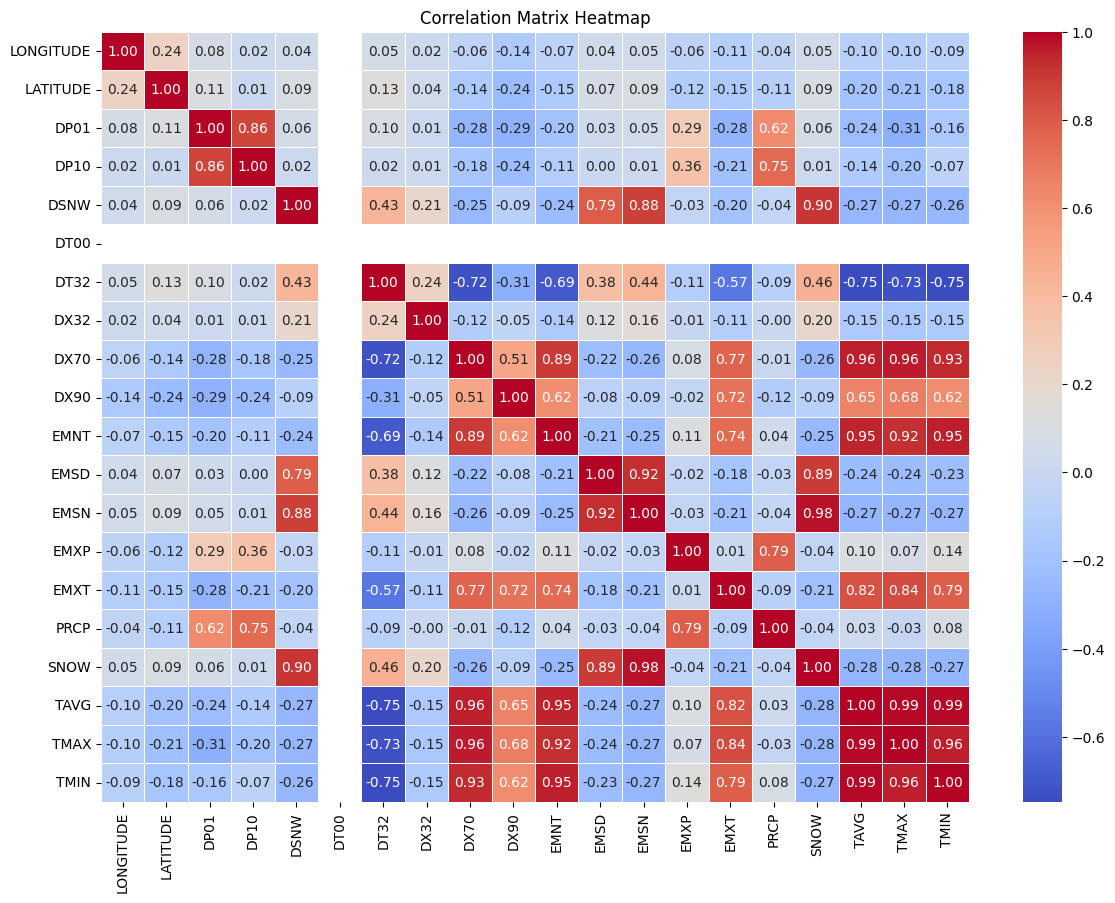

In [30]:
#group_selected_drop = group_selected.drop("DATE")


# Calculate the correlation matrix
correlation_matrix = group_selected_corr.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


The features with high correlation score are temperature related.

## Pivot

In [31]:
# group_selected

grouped_copy = group_selected.drop(["LONGITUDE", "LATITUDE"], axis=1).copy()

grouped_copy["DATE"] = pd.to_datetime(grouped_copy["DATE"])

grouped_copy["Year"] = grouped_copy["DATE"].dt.year
grouped_copy['Month'] = grouped_copy['DATE'].dt.month


In [32]:
grouped_copy

DATE       County       DP01       DP10  DSNW  DT00  DT32  DX32  \
0     2002-04-01        ADAMS  11.000000   7.000000   0.0   0.0   6.0   0.0   
1     2002-04-01        ALLEN  13.000000   7.000000   0.0   0.0   8.0   0.0   
2     2002-04-01  BARTHOLOMEW  13.000000  11.000000   0.0   0.0   5.0   0.0   
3     2002-04-01       BENTON   9.000000   7.000000   0.0   0.0  11.0   0.0   
4     2002-04-01    BLACKFORD  12.000000   9.000000   1.0   0.0   6.0   0.0   
...          ...          ...        ...        ...   ...   ...   ...   ...   
12773 2022-10-01   WASHINGTON   3.000000   1.666667   0.0   NaN   NaN   NaN   
12774 2022-10-01        WAYNE   6.000000   2.000000   NaN   0.0   7.0   0.0   
12775 2022-10-01        WELLS   9.250000   5.250000   0.0   NaN   NaN   NaN   
12776 2022-10-01        WHITE   6.000000   3.333333   0.0   0.0   5.0   0.0   
12777 2022-10-01      WHITLEY   8.571429   5.285714   1.0   0.0   8.0   0.0   

       DX70  DX90  ...  EMSN       EMXP  EMXT        PRCP  SNOW  TAVG  TMAX  \
0      10.0   0.0  ...   0.0  27.050000  30.0   83.250000   0.0  12.1  17.9   
1       9.0   0.0  ...   0.0  23.600000  30.6   94.000000   0.0  11.2  16.7   
2      13.0   0.0  ...   0.0  52.300000  29.4  232.000000   0.0  13.0  19.0   
3       9.0   0.0  ...   0.0  38.100000  30.0   96.800000   0.0  10.0  16.2   
4      10.0   0.0  ...  41.0  45.700000  29.4  119.700000  41.0  11.9  17.3   
...     ...   ...  ...   ...        ...   ...         ...   ...   ...   ...   
12773   NaN   NaN  ...   0.0  23.000000   NaN   35.300000   0.0   NaN   NaN   
12774  12.0   0.0  ...   NaN   5.100000  24.4    9.300000   NaN  10.8  18.1   
12775   NaN   NaN  ...   0.0  13.975000   NaN   40.050000   0.0   NaN   NaN   
12776  12.0   0.0  ...   0.0  33.966667  26.1   47.066667   0.0  11.3  18.4   
12777  12.0   0.0  ...  60.0  22.957143  25.0   64.085714  60.0  10.5  17.6   

       TMIN  Year  Month  
0       6.4  2002      4  
1       5.7  2002      4  
2       7.0  2002      4  
3       3.9  2002      4  
4       6.5  2002      4  
...     ...   ...    ...  
12773   NaN  2022     10  
12774   3.6  2022     10  
12775   NaN  2022     10  
12776   4.3  2022     10  
12777   3.4  2022     10  

[12778 rows x 22 columns]

In [33]:
# Define a function for transformation
def transform_data(df_grouped):
    
    features = ['DP01', 'DP10', 'DSNW',
       'DT00', 'DT32', 'DX32', 'DX70', 'DX90', 'EMNT', 'EMSD', 'EMSN', 'EMXP',
       'EMXT', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN']
    
    df_pivoted = df_grouped.pivot_table(index=['Year', 'County'], columns='Month', values=features, aggfunc='mean').reset_index()
    df_pivoted.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in df_pivoted.columns]
    return df_pivoted



In [34]:
result_df = grouped_copy.groupby(['Year', 'County']).apply(lambda x: transform_data(x)).reset_index(drop=True)

In [35]:
result_df

Year       County     DP01_4     DP01_5     DP01_6  DP01_7  DP01_8  \
0     2002        ADAMS  11.000000  13.500000   8.500000    6.00   6.500   
1     2002        ALLEN  13.000000  14.000000  11.000000    6.00   8.000   
2     2002  BARTHOLOMEW  13.000000  13.000000  10.000000    6.00   9.000   
3     2002       BENTON   9.000000  15.000000   9.000000    8.00   9.000   
4     2002    BLACKFORD  12.000000  13.000000   8.000000    5.00   9.000   
...    ...          ...        ...        ...        ...     ...     ...   
1842  2022   WASHINGTON  14.666667  12.666667   6.333333   13.00   9.000   
1843  2022        WAYNE  16.000000  12.000000   8.000000    7.00  11.000   
1844  2022        WELLS  18.000000  13.333333   5.500000   11.25   8.250   
1845  2022        WHITE  14.000000  13.750000   6.500000   11.00   9.000   
1846  2022      WHITLEY  16.000000  12.875000   5.428571   10.75   8.875   

         DP01_9    DP01_10     DP10_4  ...  TMAX_8  TMAX_9  TMAX_10  TMIN_4  \
0      5.000000   6.000000   7.000000  ...    29.9    27.9     16.3     6.4   
1      6.000000   8.000000   7.000000  ...    28.1    26.6     15.1     5.7   
2      6.000000  10.000000  11.000000  ...    30.7    28.9     17.5     7.0   
3      9.000000   6.000000   7.000000  ...    27.9    26.2     16.5     3.9   
4      7.000000   5.000000   9.000000  ...    28.5    26.4     16.1     6.5   
...         ...        ...        ...  ...     ...     ...      ...     ...   
1842   9.000000   3.000000   7.666667  ...     NaN     NaN      NaN     NaN   
1843   6.000000   6.000000   6.000000  ...    27.6    24.3     18.1     3.7   
1844   9.000000   9.250000   7.000000  ...     NaN     NaN      NaN     NaN   
1845   6.666667   6.000000   7.000000  ...    28.1    25.1     18.4     2.8   
1846  12.571429   8.571429   6.142857  ...    27.2    23.9     17.6     0.4   

      TMIN_5  TMIN_6  TMIN_7  TMIN_8  TMIN_9  TMIN_10  
0        9.0    17.3    19.6    18.1    14.5      6.1  
1        7.7    15.6    18.4    17.0    12.8      4.5  
2        9.5    18.2    19.9    19.0    14.6      7.0  
3        7.4    15.8    17.6    16.2    10.9      3.6  
4        9.0    16.9    18.7    17.9    13.6      6.4  
...      ...     ...     ...     ...     ...      ...  
1842     NaN     NaN     NaN     NaN     NaN      NaN  
1843    12.0    14.4    18.1    16.3    12.7      3.6  
1844     NaN     NaN     NaN     NaN     NaN      NaN  
1845    11.7    15.3    16.7    16.3    12.2      4.3  
1846    11.3    13.4    16.4    15.4    11.0      3.4  

[1847 rows x 128 columns]

In [36]:
list(result_df.columns)

['Year',
 'County',
 'DP01_4',
 'DP01_5',
 'DP01_6',
 'DP01_7',
 'DP01_8',
 'DP01_9',
 'DP01_10',
 'DP10_4',
 'DP10_5',
 'DP10_6',
 'DP10_7',
 'DP10_8',
 'DP10_9',
 'DP10_10',
 'DSNW_4',
 'DSNW_5',
 'DSNW_6',
 'DSNW_7',
 'DSNW_8',
 'DSNW_9',
 'DSNW_10',
 'DT00_4',
 'DT00_5',
 'DT00_6',
 'DT00_7',
 'DT00_8',
 'DT00_9',
 'DT00_10',
 'DT32_4',
 'DT32_5',
 'DT32_6',
 'DT32_7',
 'DT32_8',
 'DT32_9',
 'DT32_10',
 'DX32_4',
 'DX32_5',
 'DX32_6',
 'DX32_7',
 'DX32_8',
 'DX32_9',
 'DX32_10',
 'DX70_4',
 'DX70_5',
 'DX70_6',
 'DX70_7',
 'DX70_8',
 'DX70_9',
 'DX70_10',
 'DX90_4',
 'DX90_5',
 'DX90_6',
 'DX90_7',
 'DX90_8',
 'DX90_9',
 'DX90_10',
 'EMNT_4',
 'EMNT_5',
 'EMNT_6',
 'EMNT_7',
 'EMNT_8',
 'EMNT_9',
 'EMNT_10',
 'EMSD_4',
 'EMSD_5',
 'EMSD_6',
 'EMSD_7',
 'EMSD_8',
 'EMSD_9',
 'EMSD_10',
 'EMSN_4',
 'EMSN_5',
 'EMSN_6',
 'EMSN_7',
 'EMSN_8',
 'EMSN_9',
 'EMSN_10',
 'EMXP_4',
 'EMXP_5',
 'EMXP_6',
 'EMXP_7',
 'EMXP_8',
 'EMXP_9',
 'EMXP_10',
 'EMXT_4',
 'EMXT_5',
 'EMXT_6',
 'EMXT_7',


In [37]:
calculate_null = calculate_null_percentage(result_df)

In [38]:
index = calculate_null.index.tolist()
count = calculate_null["Total Null Values"].tolist()
percentage = calculate_null["Percentage Null"].tolist()


for i in range(len(index)):
    print(index[i] + ": " + str(count[i]) + " " + str(percentage[i]) + "%")

Year: 0 0.0%
County: 0 0.0%
DP01_4: 47 2.54%
DP01_5: 40 2.17%
DP01_6: 36 1.95%
DP01_7: 35 1.89%
DP01_8: 40 2.17%
DP01_9: 39 2.11%
DP01_10: 38 2.06%
DP10_4: 47 2.54%
DP10_5: 40 2.17%
DP10_6: 36 1.95%
DP10_7: 35 1.89%
DP10_8: 40 2.17%
DP10_9: 39 2.11%
DP10_10: 38 2.06%
DSNW_4: 269 14.56%
DSNW_5: 282 15.27%
DSNW_6: 280 15.16%
DSNW_7: 281 15.21%
DSNW_8: 290 15.7%
DSNW_9: 270 14.62%
DSNW_10: 269 14.56%
DT00_4: 438 23.71%
DT00_5: 442 23.93%
DT00_6: 437 23.66%
DT00_7: 444 24.04%
DT00_8: 465 25.18%
DT00_9: 452 24.47%
DT00_10: 452 24.47%
DT32_4: 438 23.71%
DT32_5: 442 23.93%
DT32_6: 437 23.66%
DT32_7: 444 24.04%
DT32_8: 465 25.18%
DT32_9: 452 24.47%
DT32_10: 452 24.47%
DX32_4: 436 23.61%
DX32_5: 438 23.71%
DX32_6: 429 23.23%
DX32_7: 435 23.55%
DX32_8: 453 24.53%
DX32_9: 438 23.71%
DX32_10: 432 23.39%
DX70_4: 436 23.61%
DX70_5: 438 23.71%
DX70_6: 429 23.23%
DX70_7: 435 23.55%
DX70_8: 453 24.53%
DX70_9: 438 23.71%
DX70_10: 432 23.39%
DX90_4: 436 23.61%
DX90_5: 438 23.71%
DX90_6: 429 23.23%
DX90_7

In [39]:
result_df.shape

(1847, 128)

In [40]:
result_df.dtypes

Year         int32
County      object
DP01_4     float64
DP01_5     float64
DP01_6     float64
            ...   
TMIN_6     float64
TMIN_7     float64
TMIN_8     float64
TMIN_9     float64
TMIN_10    float64
Length: 128, dtype: object

In [41]:
result_df.describe()

Year       DP01_4       DP01_5       DP01_6       DP01_7  \
count  1847.000000  1800.000000  1807.000000  1811.000000  1812.000000   
mean   2012.006497    11.566038    12.794403    11.011261    10.105624   
std       6.065636     2.942727     3.537968     3.307474     2.545626   
min    2002.000000     2.000000     1.000000     2.000000     2.000000   
25%    2007.000000     9.666667    11.000000     8.666667     8.333333   
50%    2012.000000    11.500000    13.200000    11.000000    10.200000   
75%    2017.000000    13.333333    15.000000    13.466667    12.000000   
max    2022.000000    21.400000    23.363636    22.000000    19.000000   

            DP01_8       DP01_9      DP01_10       DP10_4       DP10_5  ...  \
count  1807.000000  1808.000000  1809.000000  1800.000000  1807.000000  ...   
mean      8.703988     8.057039     9.995886     7.705312     8.637344  ...   
std       2.737705     3.114807     3.602674     2.326701     2.701811  ...   
min       1.000000     0.000000     2.000000     0.000000     1.000000  ...   
25%       7.000000     6.000000     7.000000     6.000000     6.607692  ...   
50%       8.666667     8.000000    10.000000     7.500000     9.000000  ...   
75%      10.500000     9.800000    12.750000     9.000000    10.571429  ...   
max      18.000000    21.000000    20.722222    16.000000    16.500000  ...   

            TMAX_8       TMAX_9      TMAX_10       TMIN_4       TMIN_5  \
count  1394.000000  1409.000000  1415.000000  1409.000000  1405.000000   
mean     28.764188    25.910680    18.728969     4.905004    10.972345   
std       1.736975     2.032992     2.131959     2.087172     2.121758   
min      23.700000    20.600000    13.000000    -1.500000     5.500000   
25%      27.600000    24.400000    17.300000     3.600000     9.400000   
50%      28.600000    26.100000    18.600000     4.800000    10.900000   
75%      29.800000    27.300000    20.200000     6.250000    12.366667   
max      35.600000    32.350000    27.200000    11.650000    17.850000   

            TMIN_6       TMIN_7       TMIN_8       TMIN_9      TMIN_10  
count  1410.000000  1403.000000  1382.000000  1395.000000  1395.000000  
mean     16.115758    17.776812    16.831411    12.987032     6.478119  
std       1.546767     1.775514     1.789736     1.716961     2.021718  
min      10.300000    12.100000     9.400000     6.400000     0.000000  
25%      15.100000    16.700000    15.450000    11.700000     4.900000  
50%      16.100000    17.800000    16.816667    12.800000     6.150000  
75%      17.100000    18.950000    18.100000    14.200000     7.833333  
max      21.850000    24.500000    23.200000    18.650000    15.100000  

[8 rows x 127 columns]

In [42]:
result_df.head(5)

Year       County  DP01_4  DP01_5  DP01_6  DP01_7  DP01_8  DP01_9  DP01_10  \
0  2002        ADAMS    11.0    13.5     8.5     6.0     6.5     5.0      6.0   
1  2002        ALLEN    13.0    14.0    11.0     6.0     8.0     6.0      8.0   
2  2002  BARTHOLOMEW    13.0    13.0    10.0     6.0     9.0     6.0     10.0   
3  2002       BENTON     9.0    15.0     9.0     8.0     9.0     9.0      6.0   
4  2002    BLACKFORD    12.0    13.0     8.0     5.0     9.0     7.0      5.0   

   DP10_4  ...  TMAX_8  TMAX_9  TMAX_10  TMIN_4  TMIN_5  TMIN_6  TMIN_7  \
0     7.0  ...    29.9    27.9     16.3     6.4     9.0    17.3    19.6   
1     7.0  ...    28.1    26.6     15.1     5.7     7.7    15.6    18.4   
2    11.0  ...    30.7    28.9     17.5     7.0     9.5    18.2    19.9   
3     7.0  ...    27.9    26.2     16.5     3.9     7.4    15.8    17.6   
4     9.0  ...    28.5    26.4     16.1     6.5     9.0    16.9    18.7   

   TMIN_8  TMIN_9  TMIN_10  
0    18.1    14.5      6.1  
1    17.0    12.8      4.5  
2    19.0    14.6      7.0  
3    16.2    10.9      3.6  
4    17.9    13.6      6.4  

[5 rows x 128 columns]

## Distribution

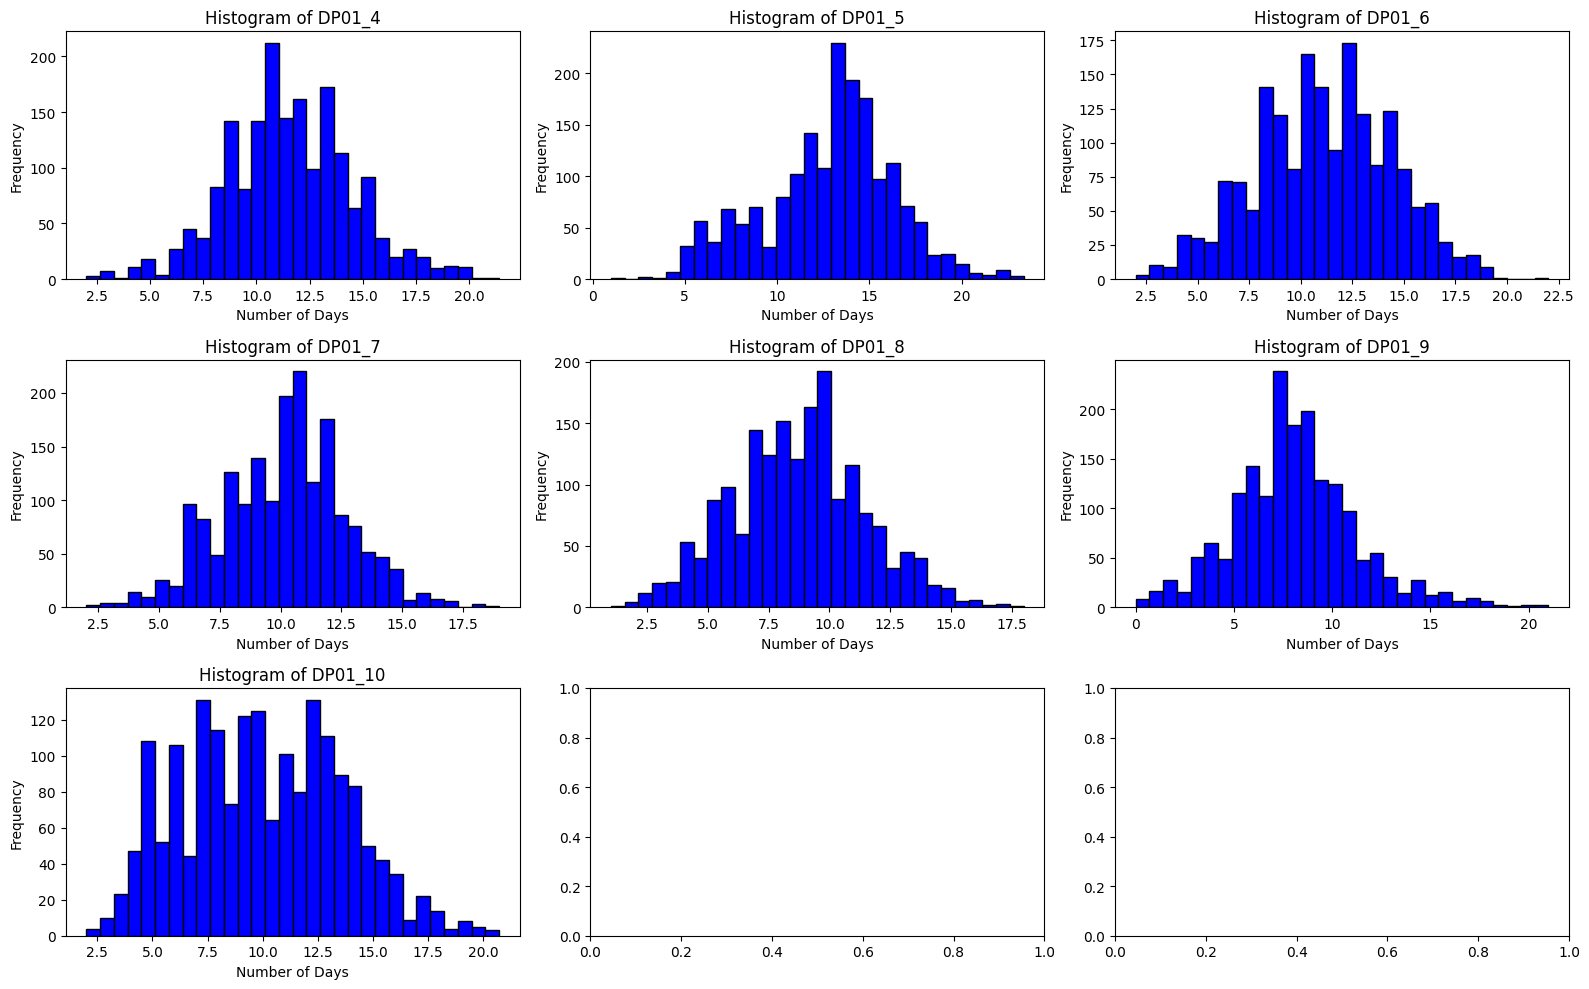

In [43]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DP01_4', 'DP01_5', 'DP01_6', 'DP01_7', 'DP01_8', 
                            'DP01_9', 'DP01_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of Days')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


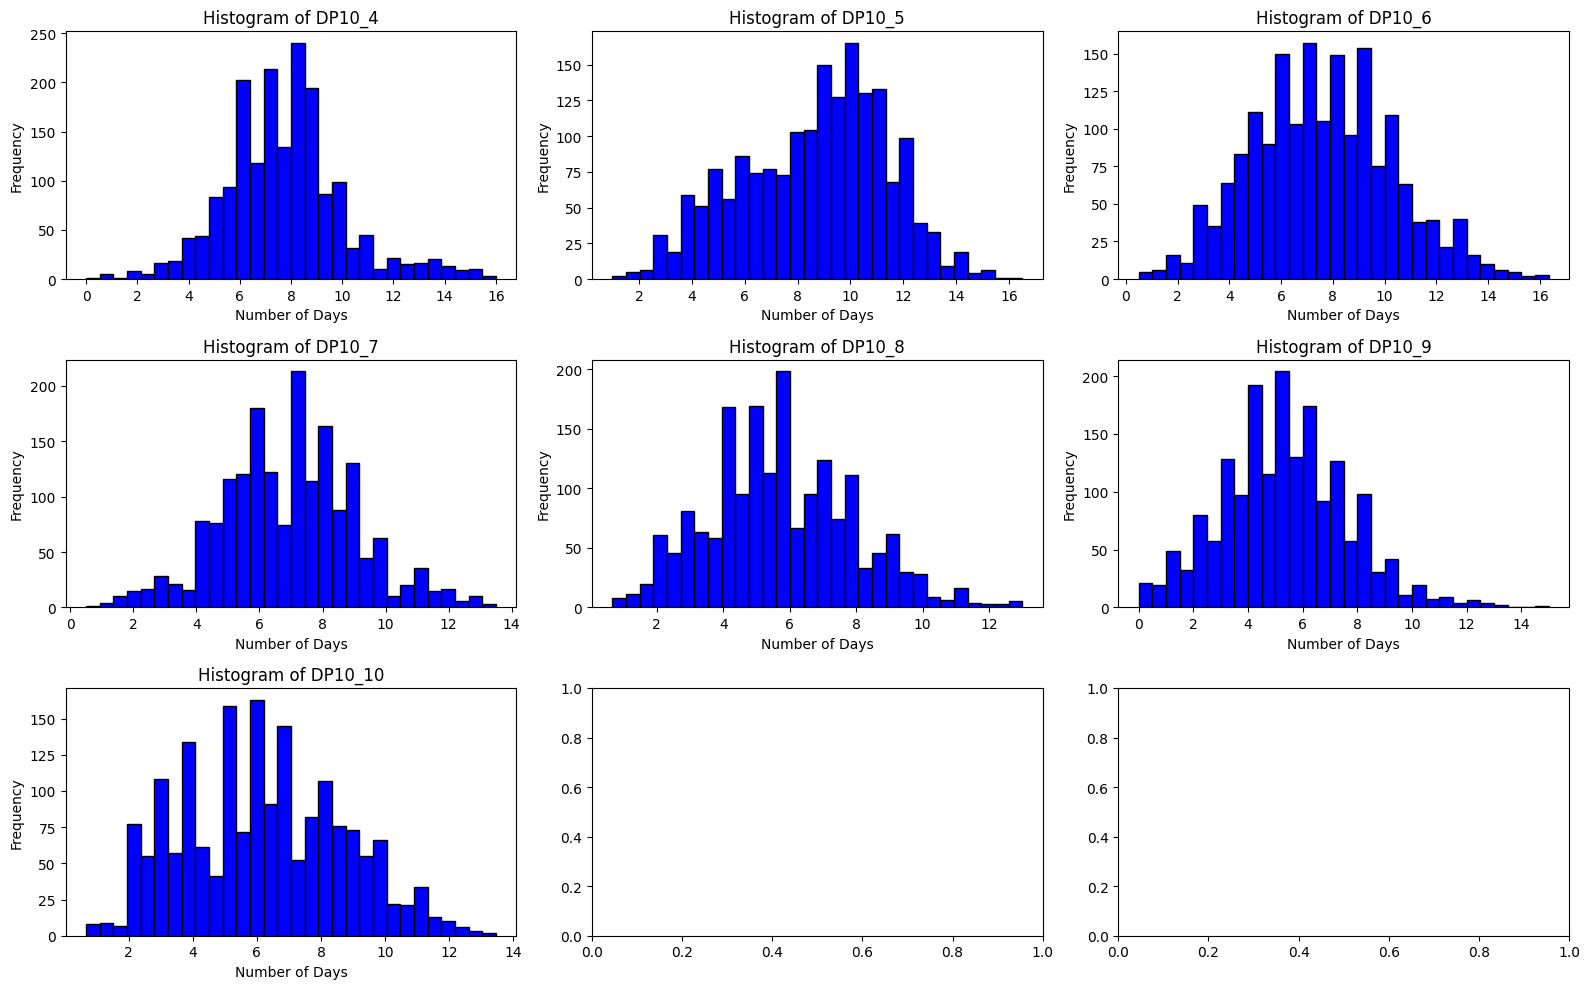

In [44]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DP10_4', 'DP10_5', 'DP10_6', 'DP10_7', 'DP10_8', 
                            'DP10_9', 'DP10_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of Days')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


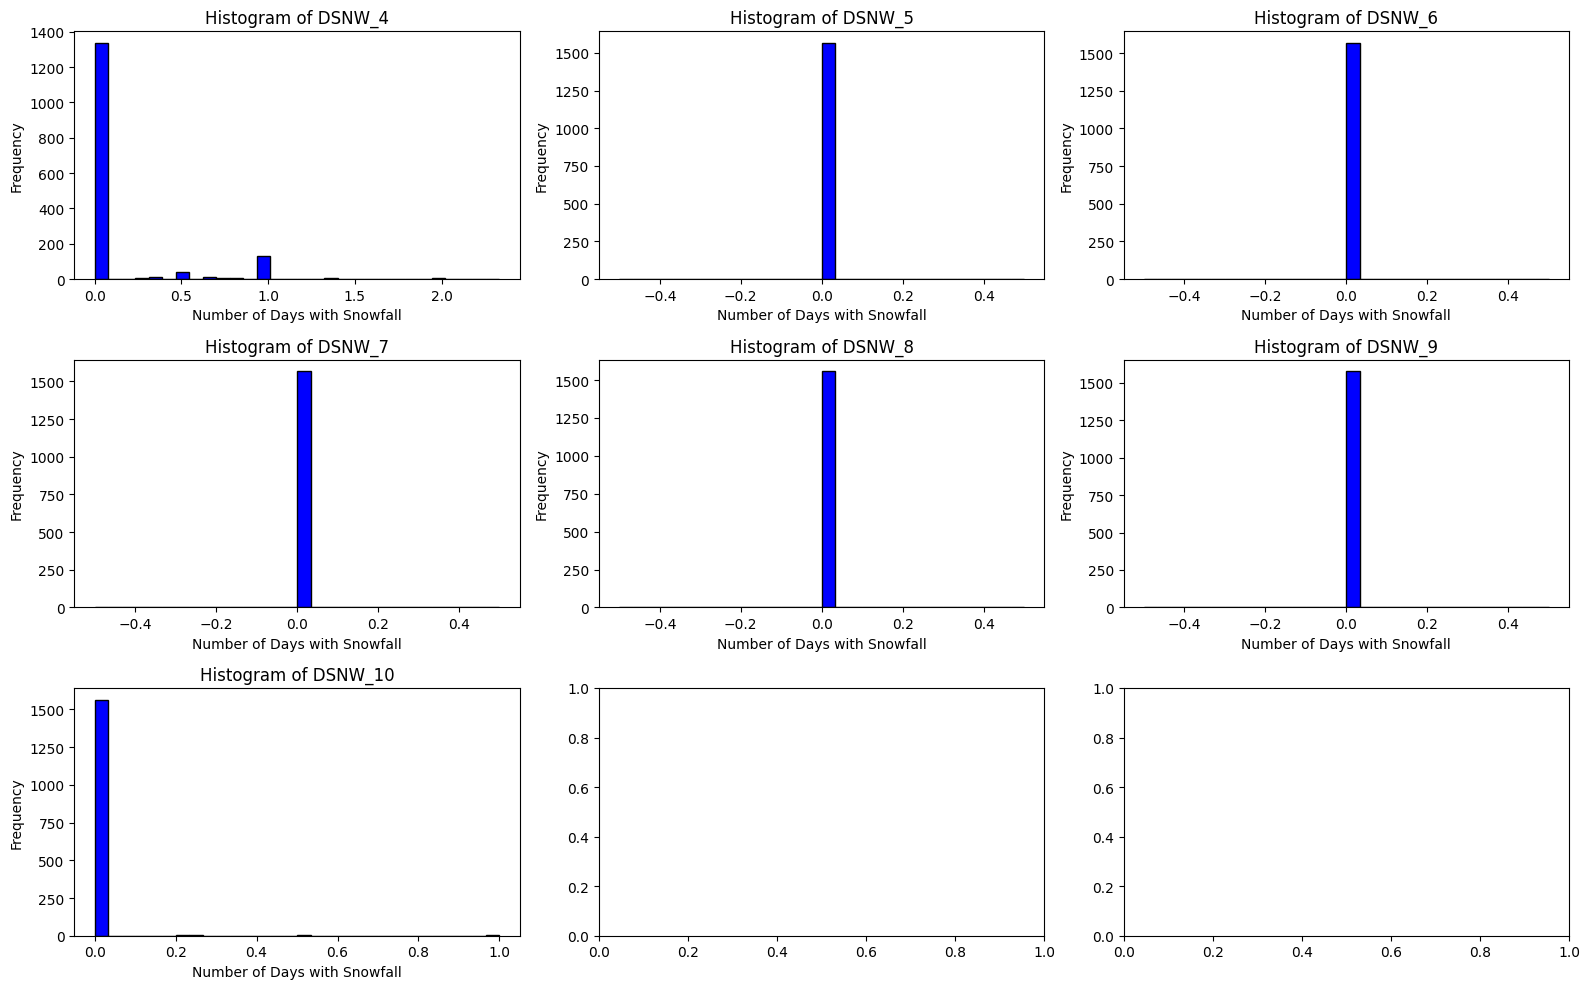

In [45]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DSNW_4', 'DSNW_5', 'DSNW_6', 'DSNW_7', 'DSNW_8', 
                            'DSNW_9', 'DSNW_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of Days with Snowfall')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Use mode

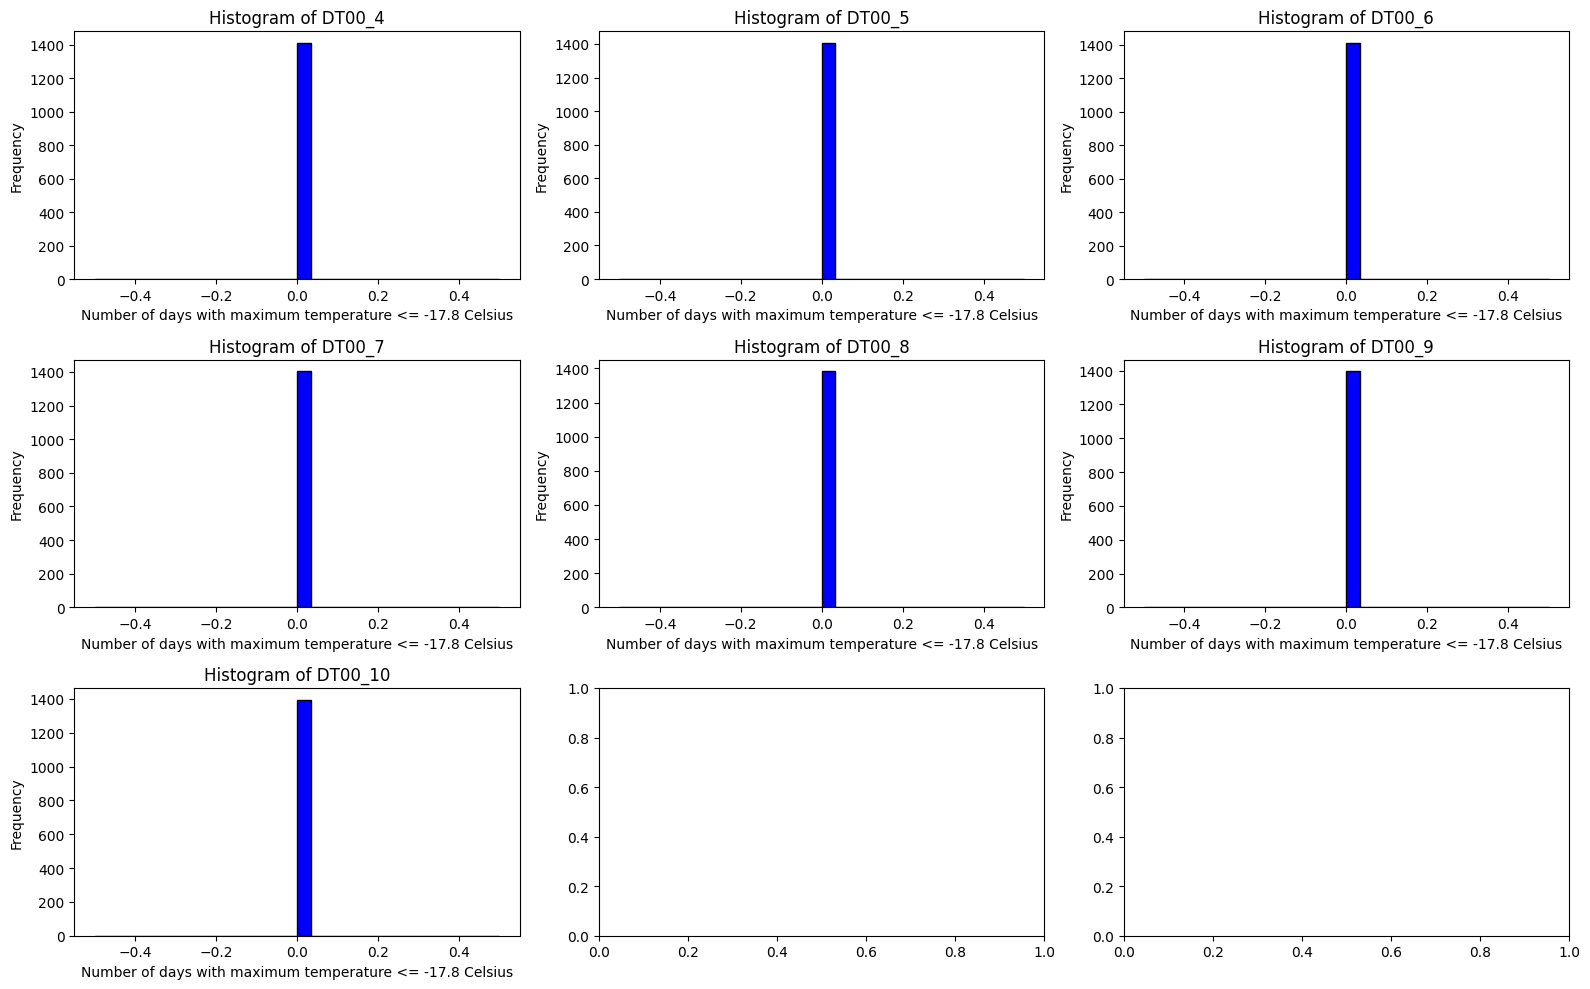

In [46]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 
                            'DT00_9', 'DT00_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of days with maximum temperature <= -17.8 Celsius')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Use mode for DT00

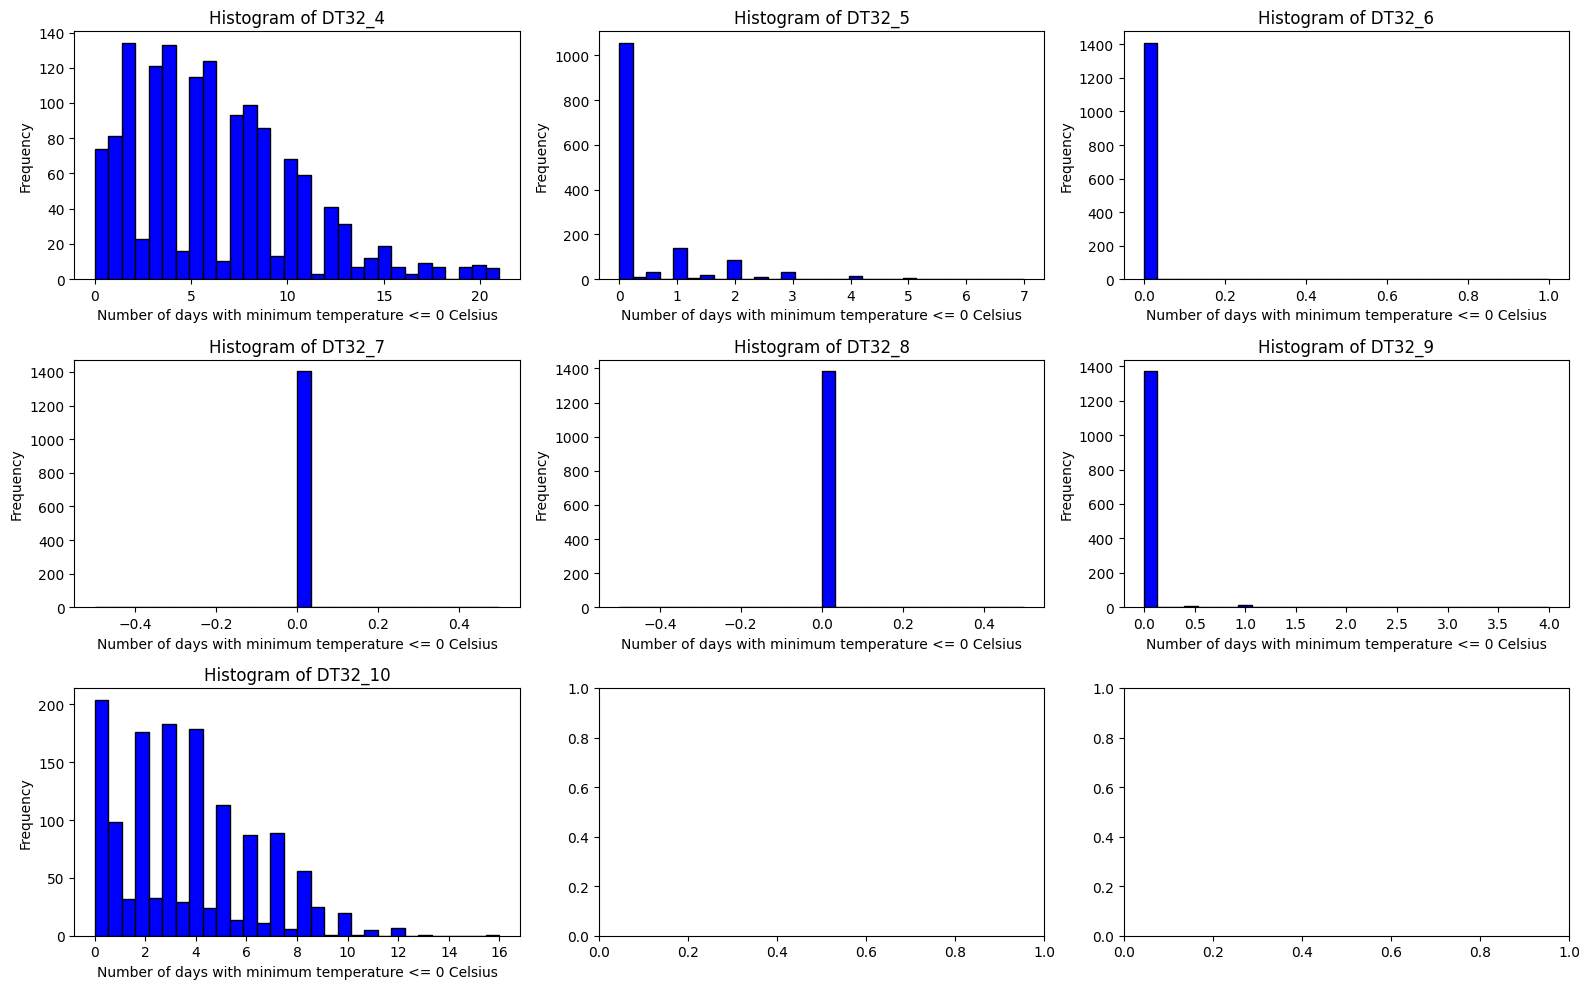

In [47]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DT32_4', 'DT32_5', 'DT32_6', 'DT32_7', 'DT32_8', 
                            'DT32_9', 'DT32_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of days with minimum temperature <= 0 Celsius')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Use mode for DT_32

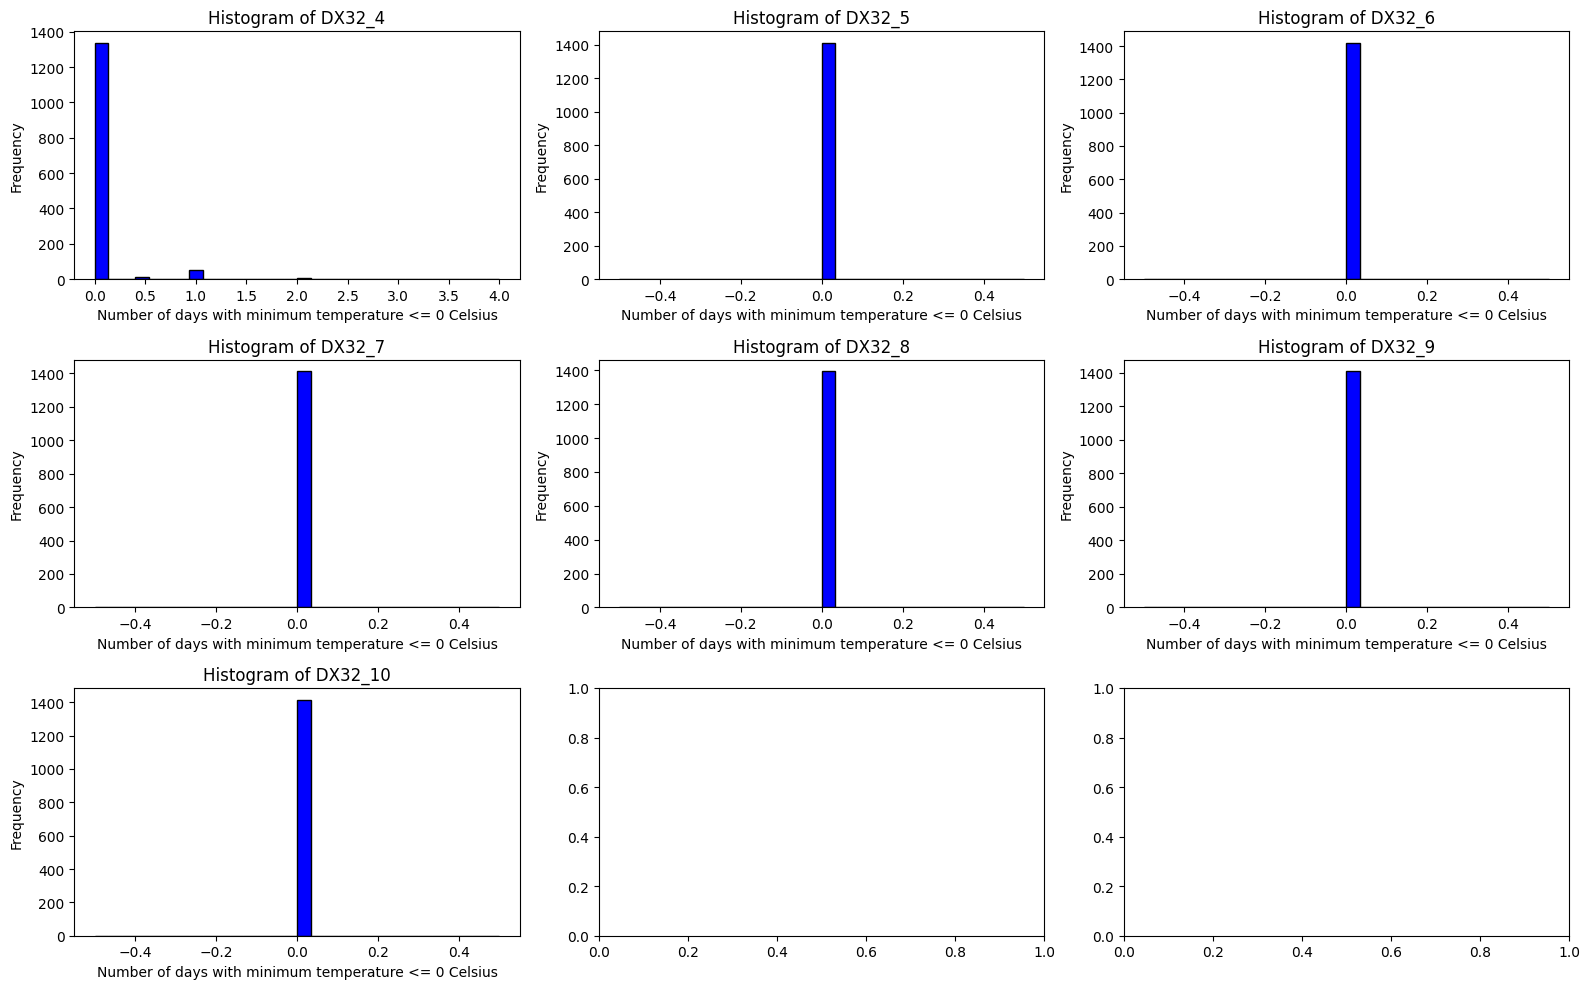

In [48]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DX32_4', 'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 
                            'DX32_9', 'DX32_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of days with minimum temperature <= 0 Celsius')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use mode for DX32

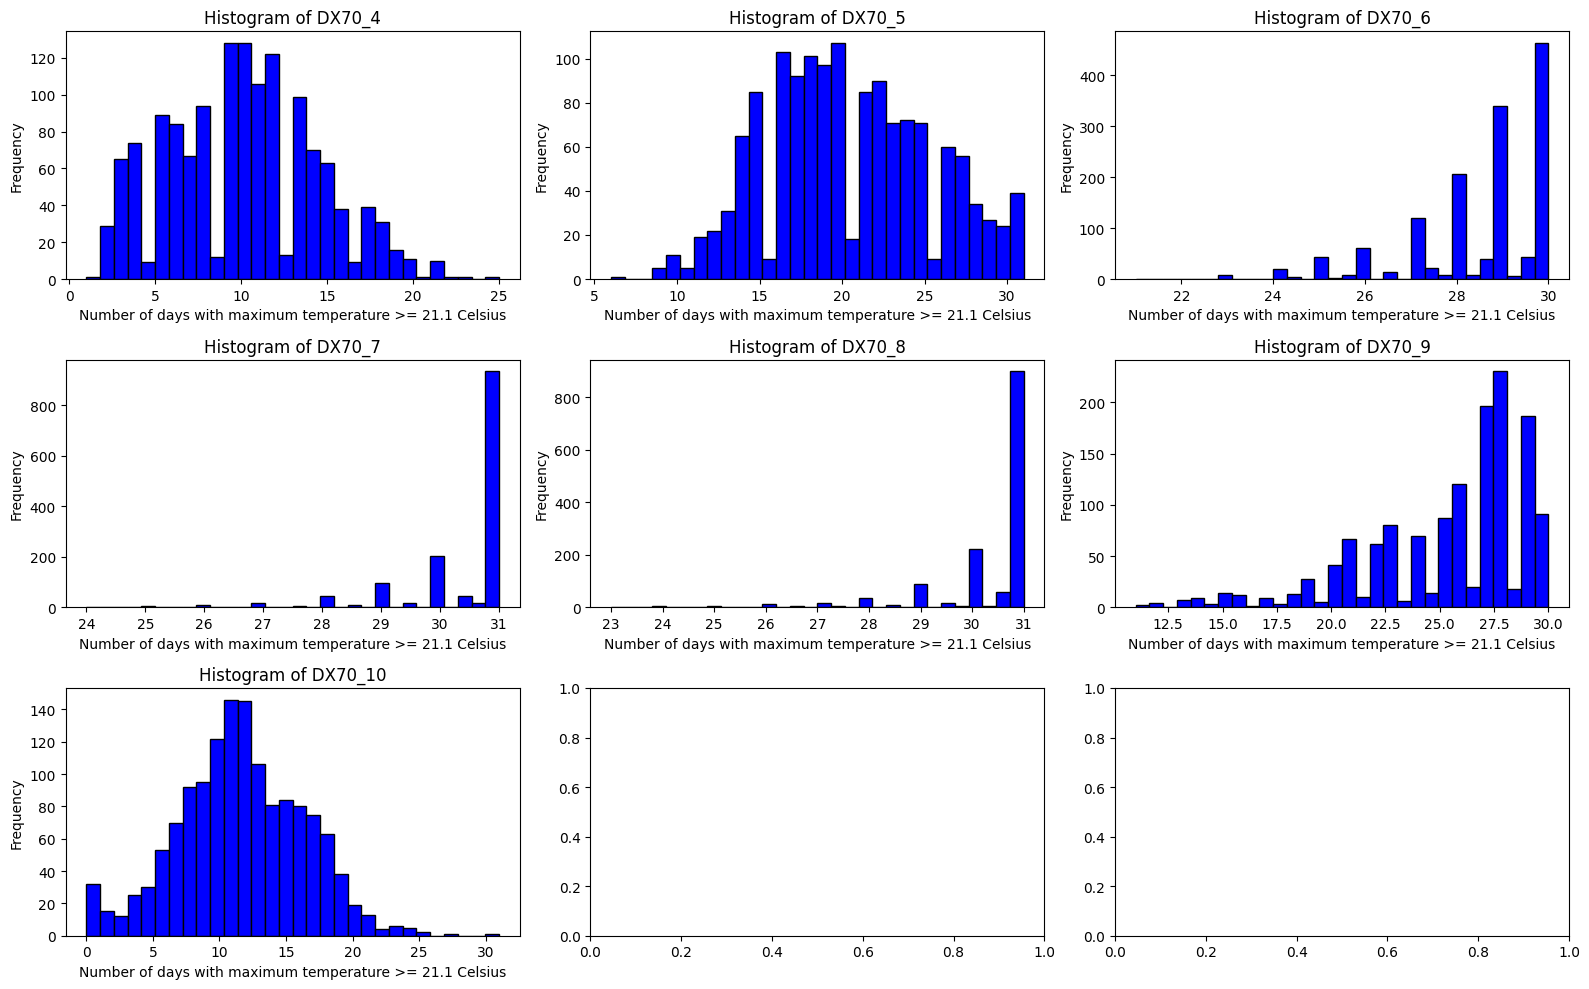

In [49]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DX70_4', 'DX70_5', 'DX70_6', 'DX70_7', 'DX70_8', 
                            'DX70_9', 'DX70_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of days with maximum temperature >= 21.1 Celsius')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use mode for DX70

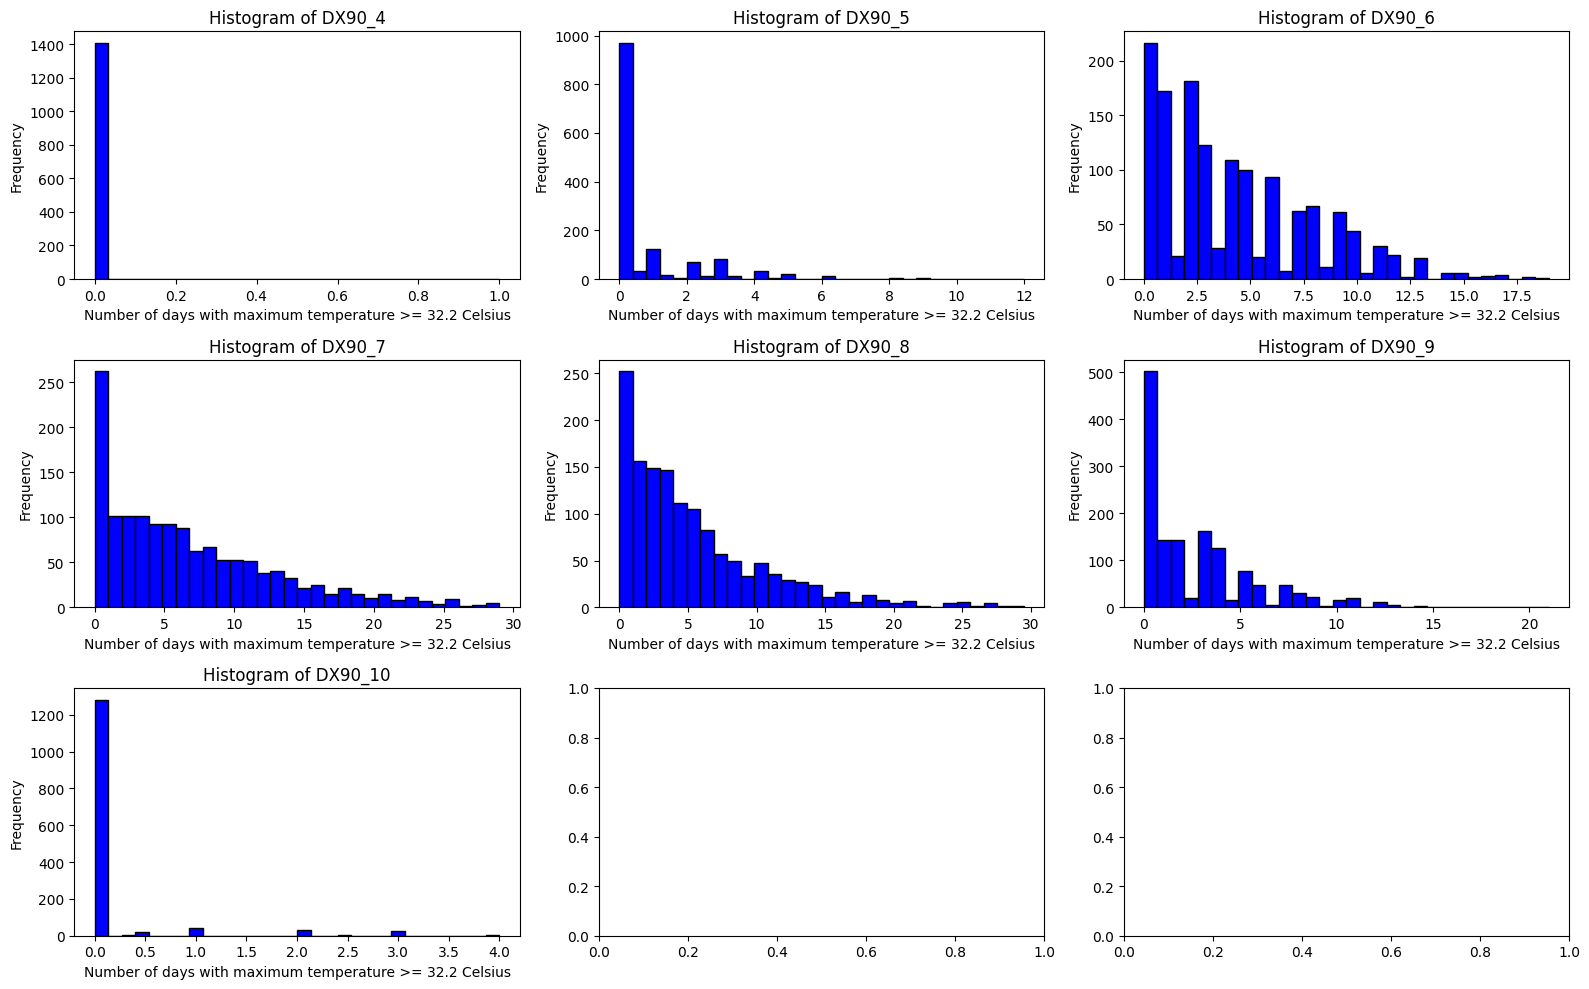

In [50]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DX90_4', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 
                            'DX90_9', 'DX90_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of days with maximum temperature >= 32.2 Celsius')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use mode for DX90

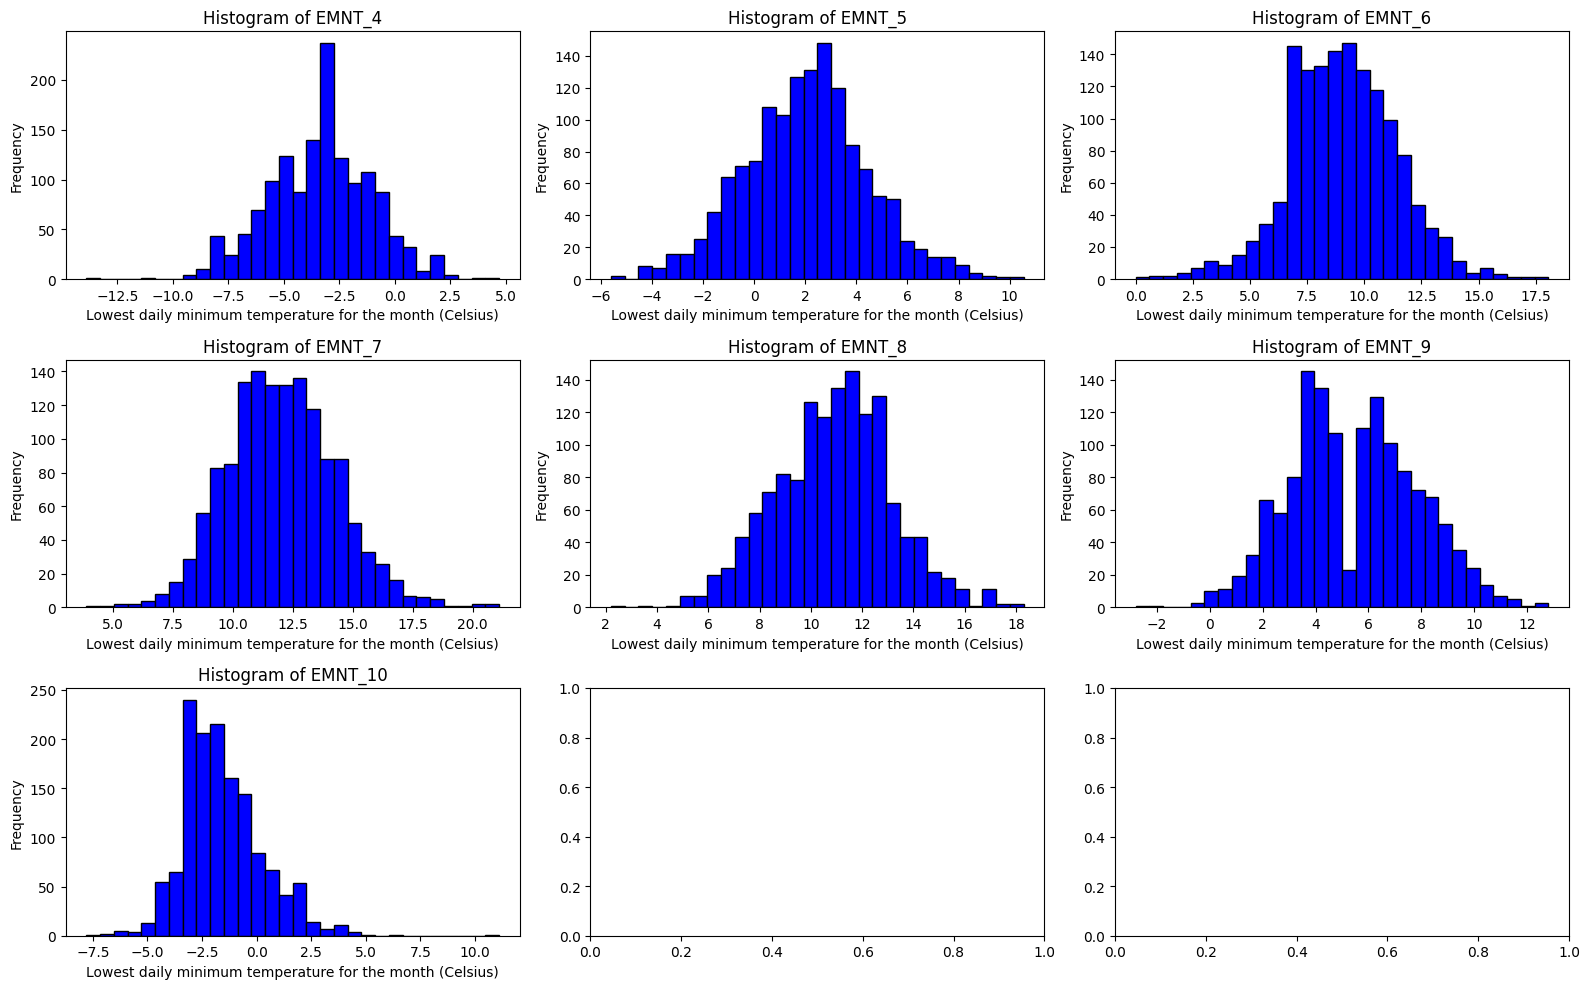

In [51]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['EMNT_4', 'EMNT_5', 'EMNT_6', 'EMNT_7', 'EMNT_8', 
                            'EMNT_9', 'EMNT_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Lowest daily minimum temperature for the month (Celsius)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use mean for EMNT

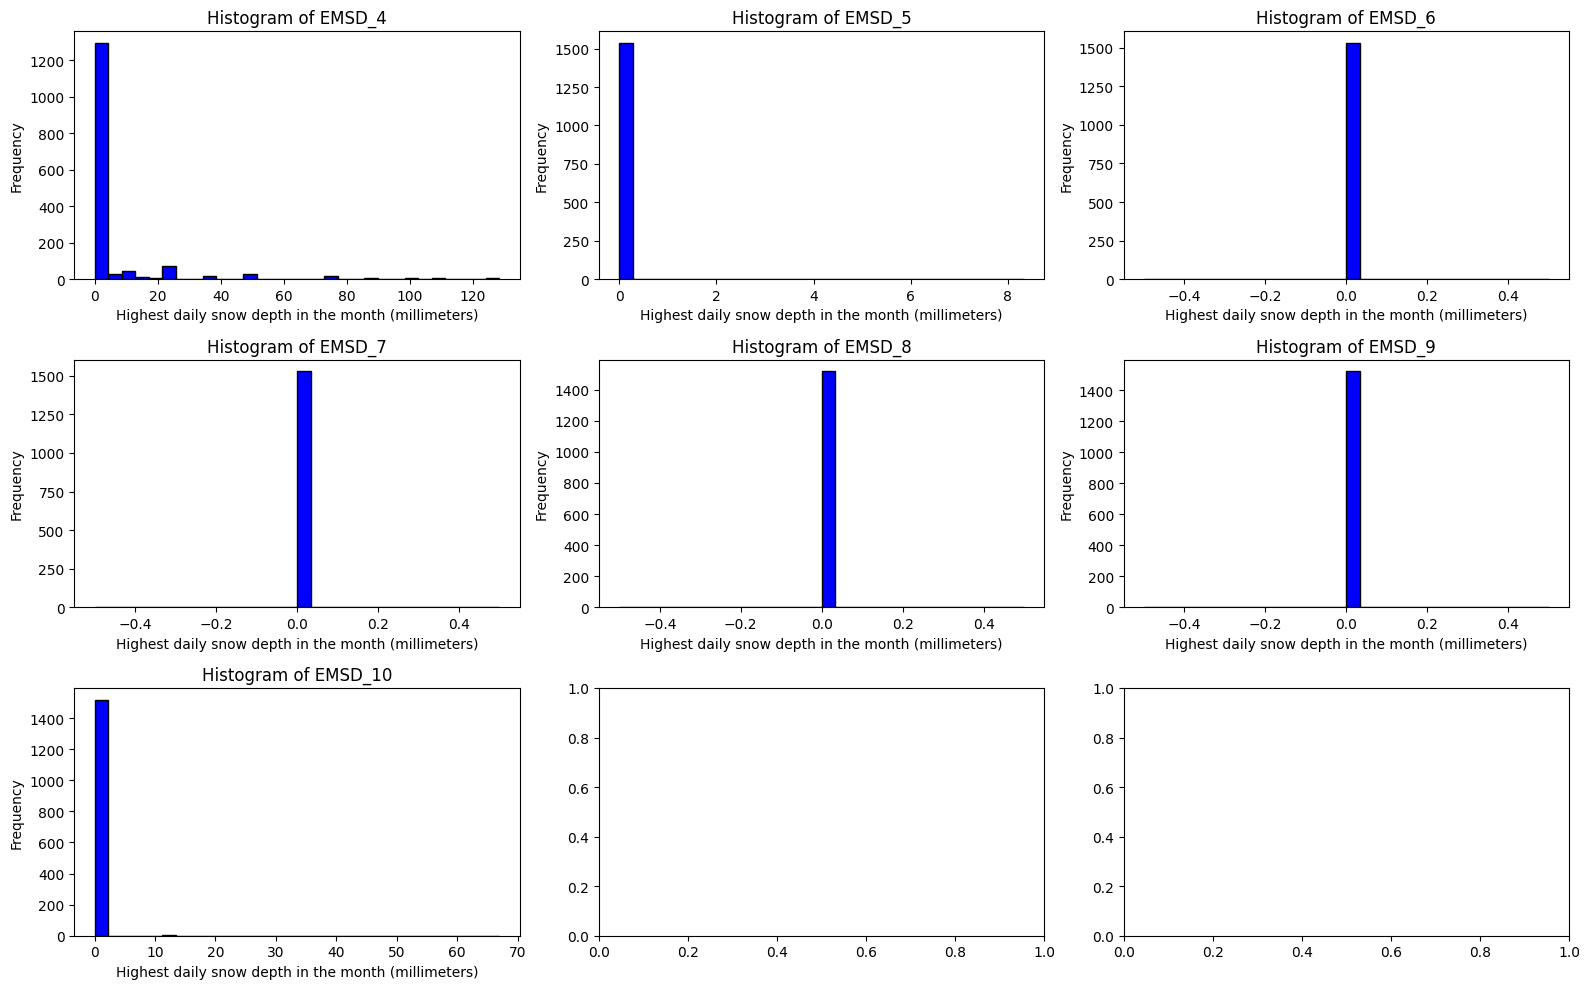

In [52]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['EMSD_4', 'EMSD_5', 'EMSD_6', 'EMSD_7', 'EMSD_8', 
                            'EMSD_9', 'EMSD_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Highest daily snow depth in the month (millimeters)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use mode for EMSD

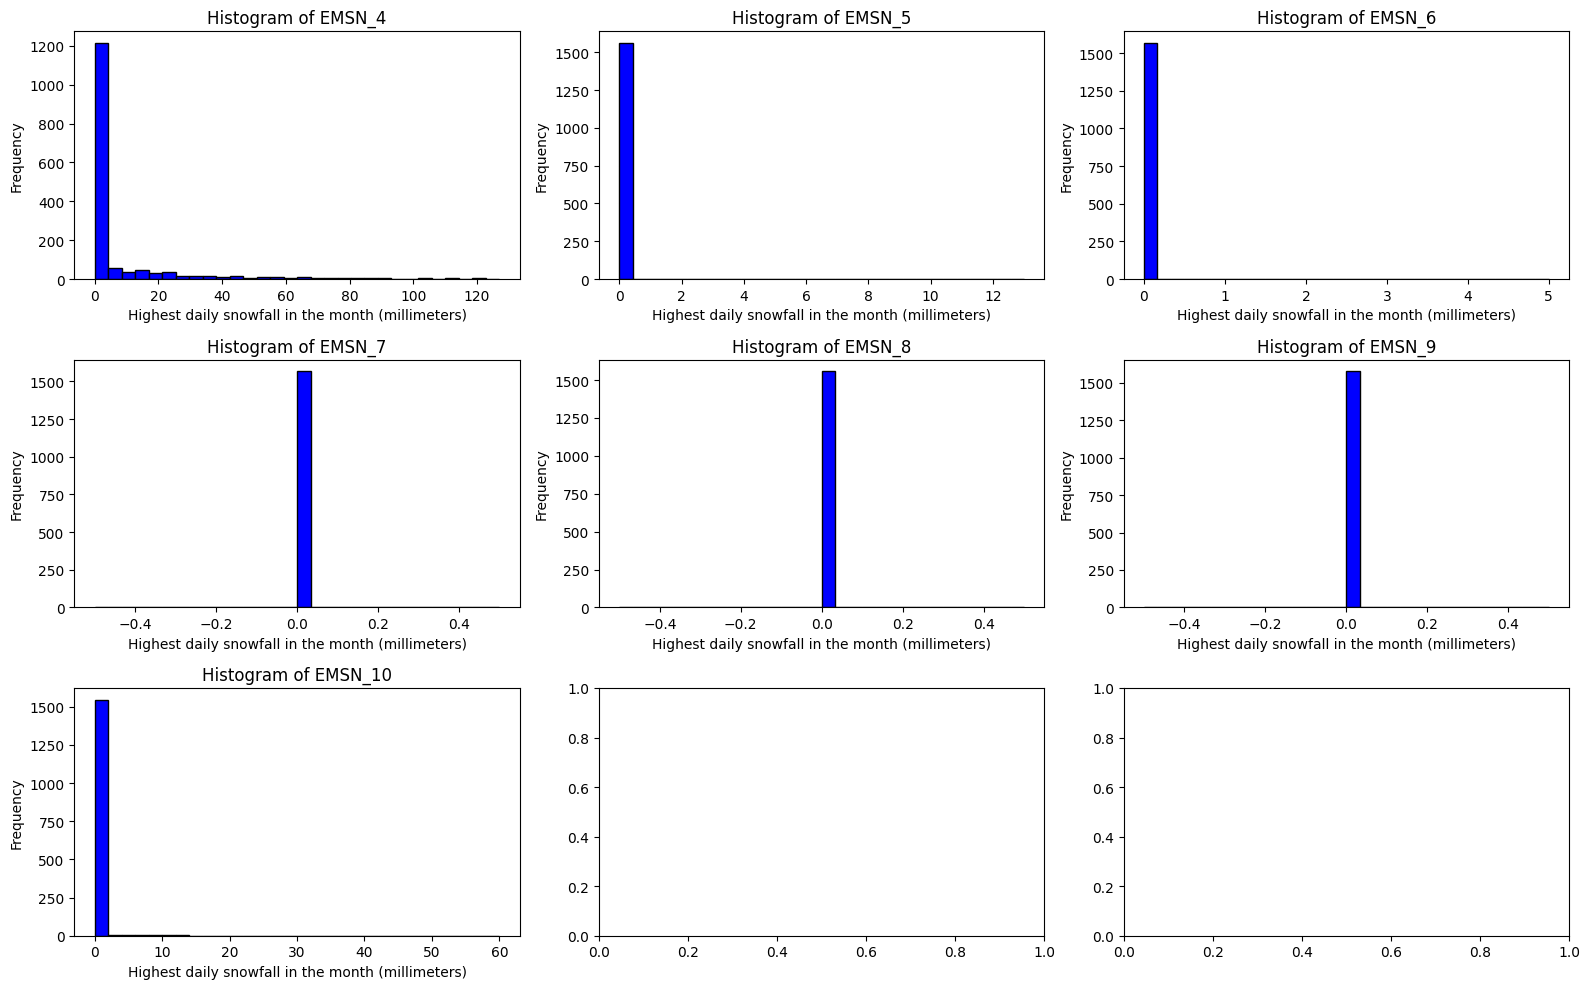

In [53]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['EMSN_4', 'EMSN_5', 'EMSN_6', 'EMSN_7', 'EMSN_8', 
                            'EMSN_9', 'EMSN_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Highest daily snowfall in the month (millimeters)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use mode for EMSN

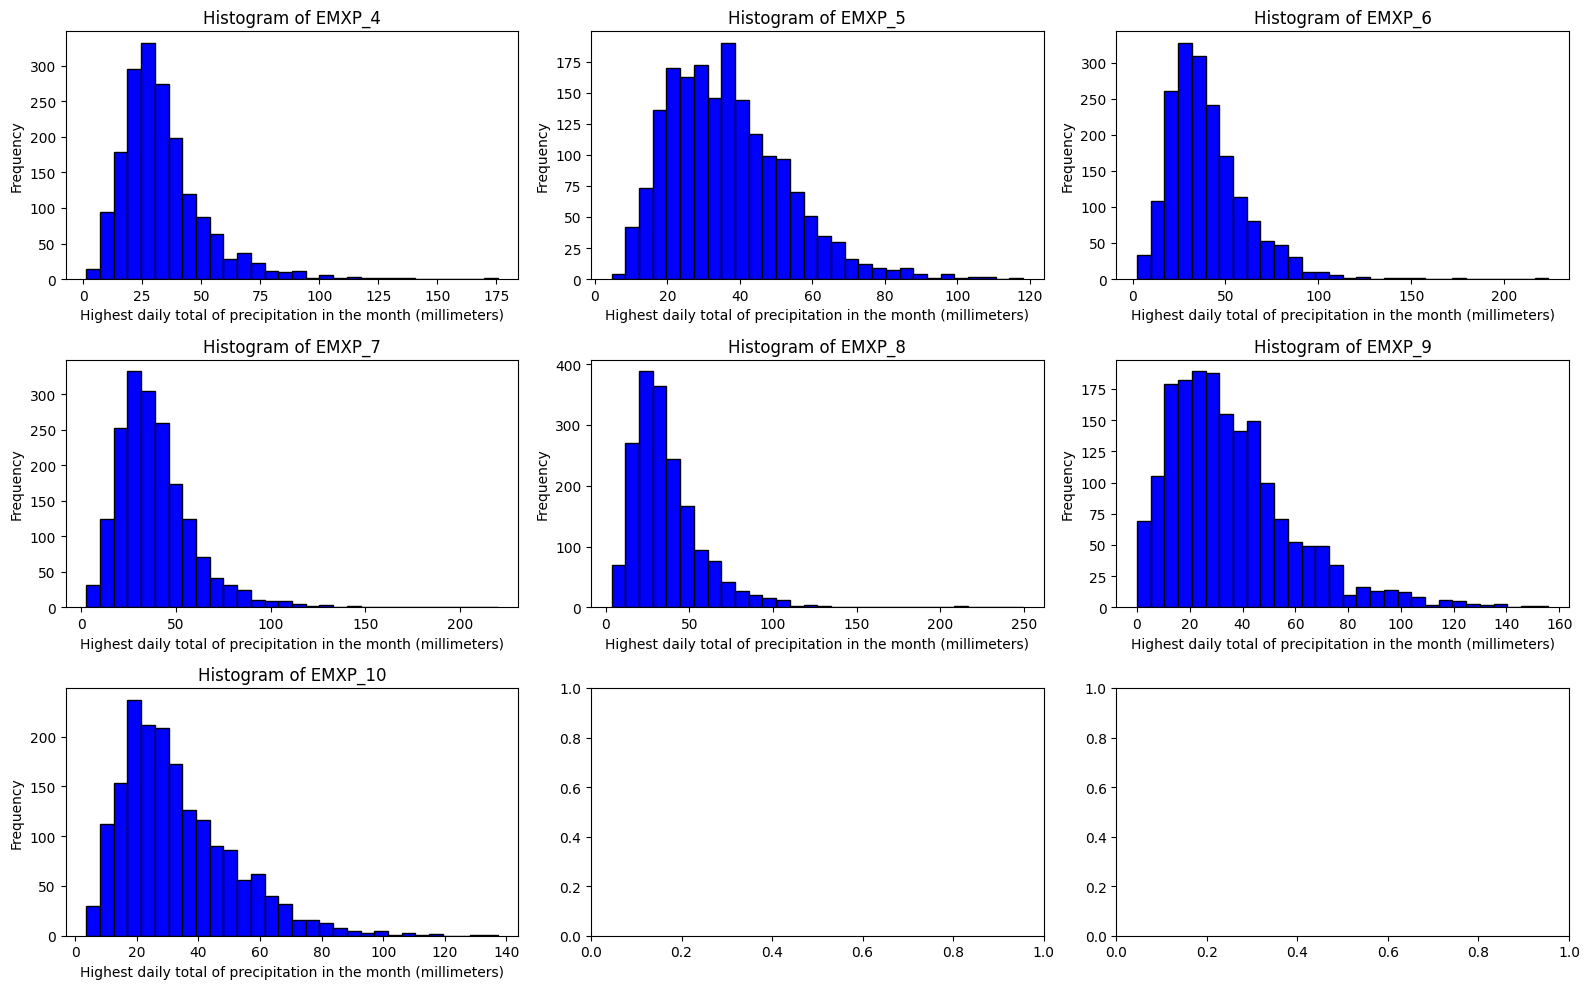

In [54]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 
                            'EMXP_9', 'EMXP_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Highest daily total of precipitation in the month (millimeters)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use mode for EMXP

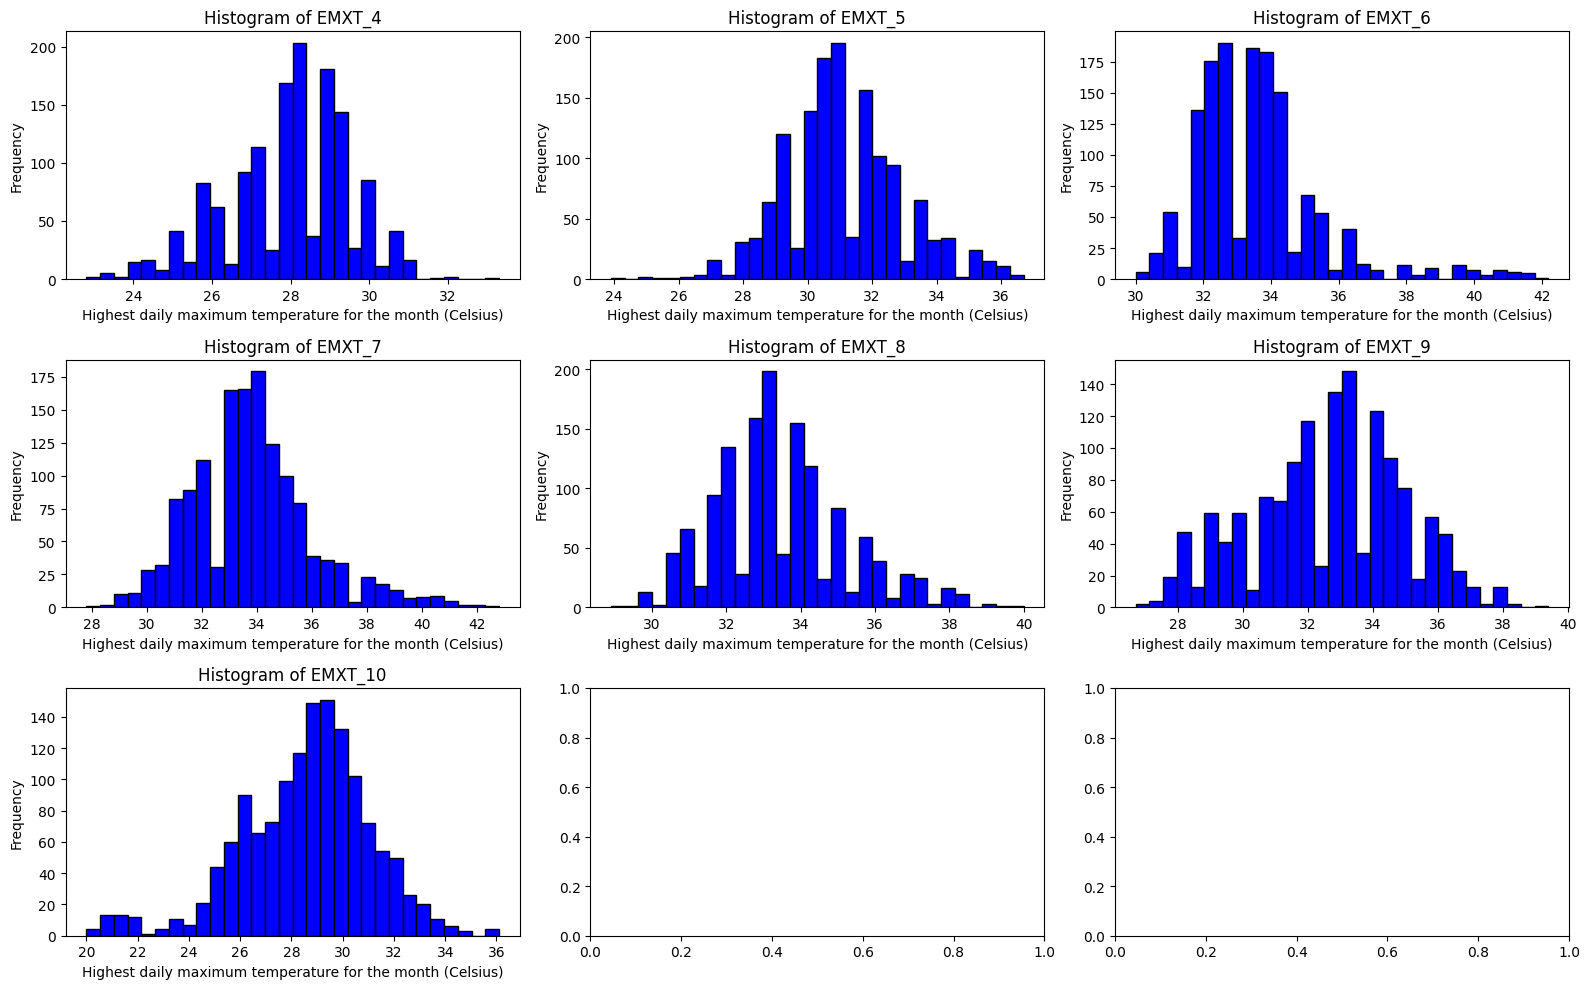

In [55]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7', 'EMXT_8', 
                            'EMXT_9', 'EMXT_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Highest daily maximum temperature for the month (Celsius)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use mean for EMXT

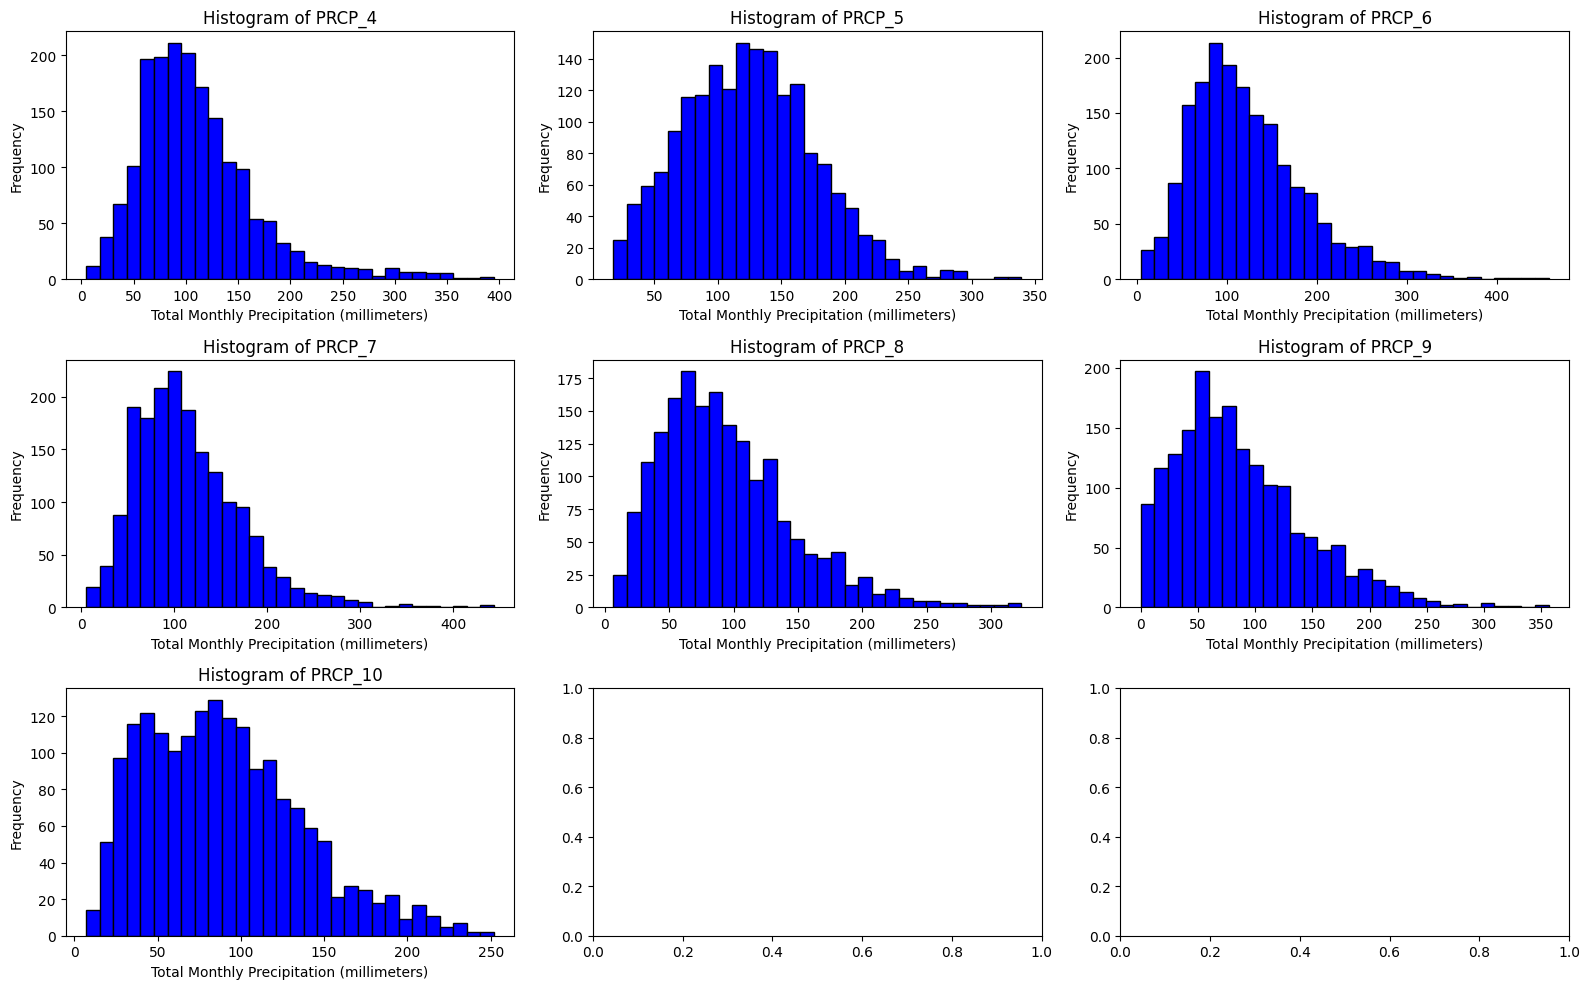

In [56]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7', 'PRCP_8', 
                            'PRCP_9', 'PRCP_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Total Monthly Precipitation (millimeters)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

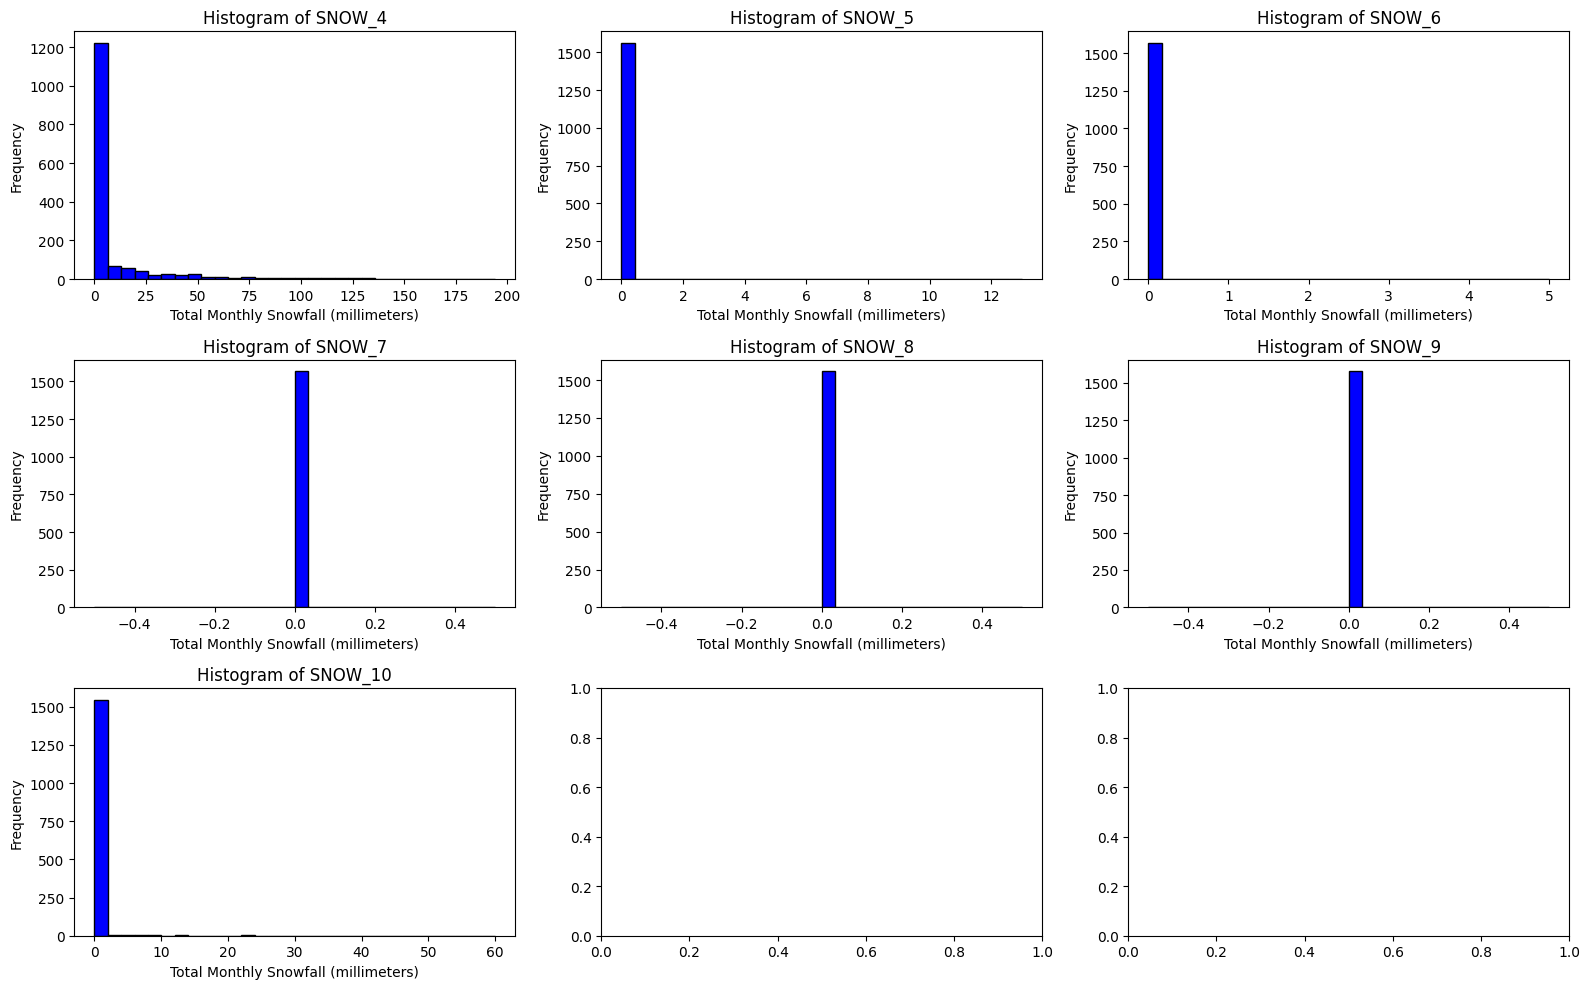

In [57]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['SNOW_4', 'SNOW_5', 'SNOW_6', 'SNOW_7', 'SNOW_8', 
                            'SNOW_9', 'SNOW_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Total Monthly Snowfall (millimeters)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

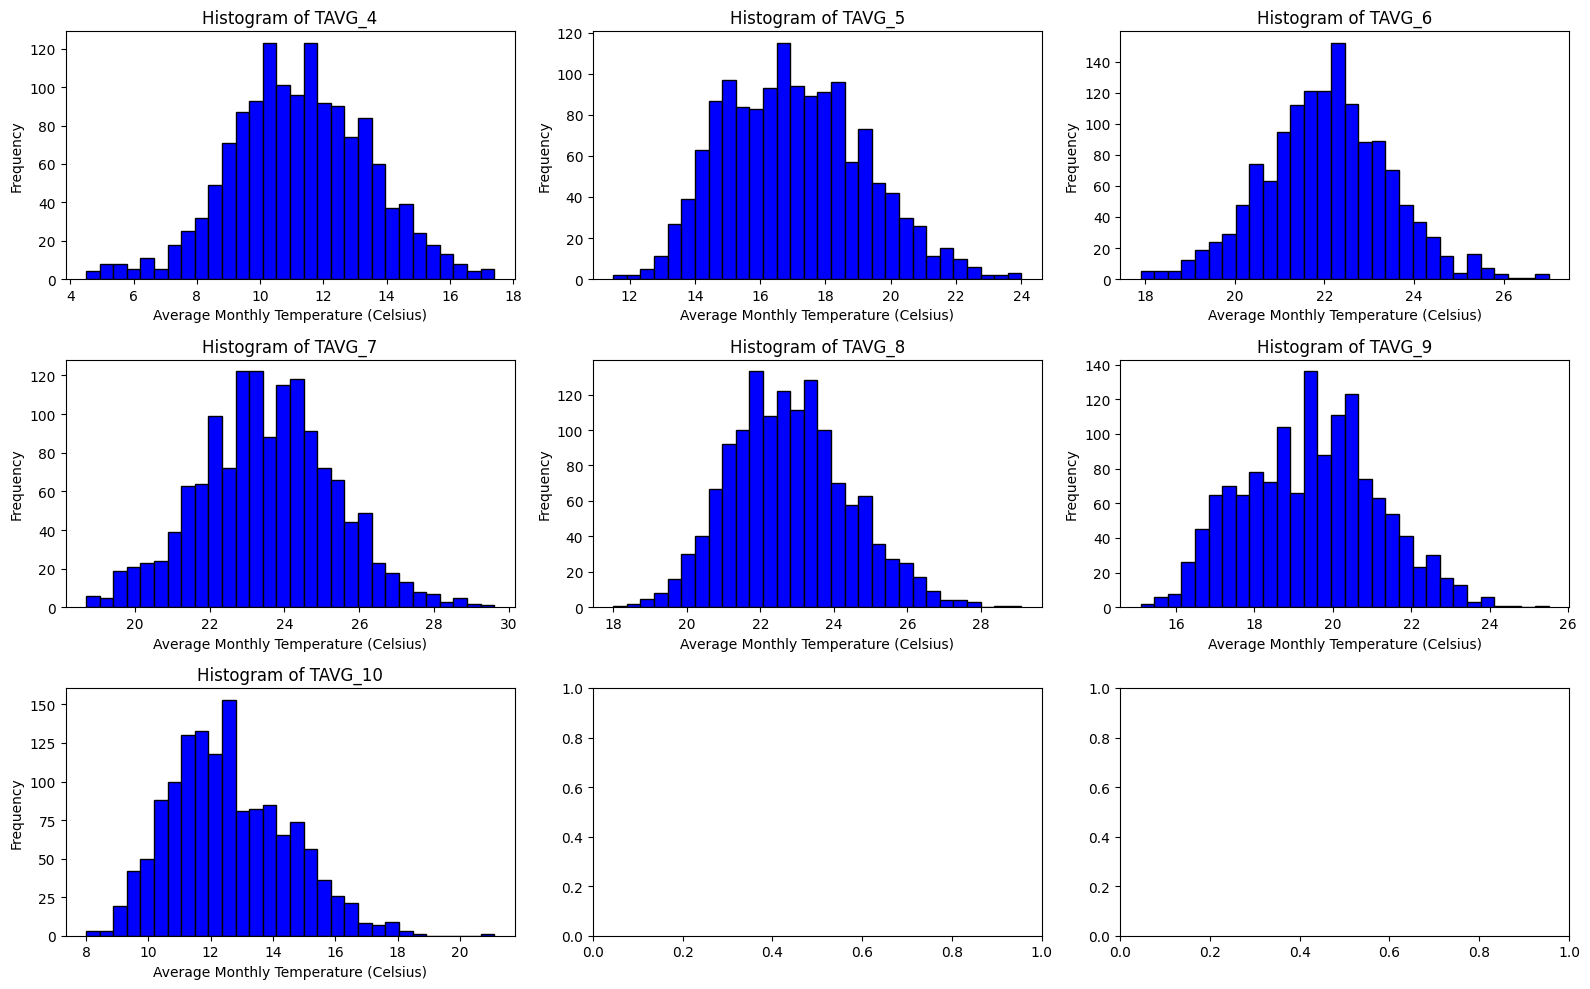

In [58]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['TAVG_4', 'TAVG_5', 'TAVG_6', 'TAVG_7', 'TAVG_8', 
                            'TAVG_9', 'TAVG_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Average Monthly Temperature (Celsius)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use Mean for TAVG

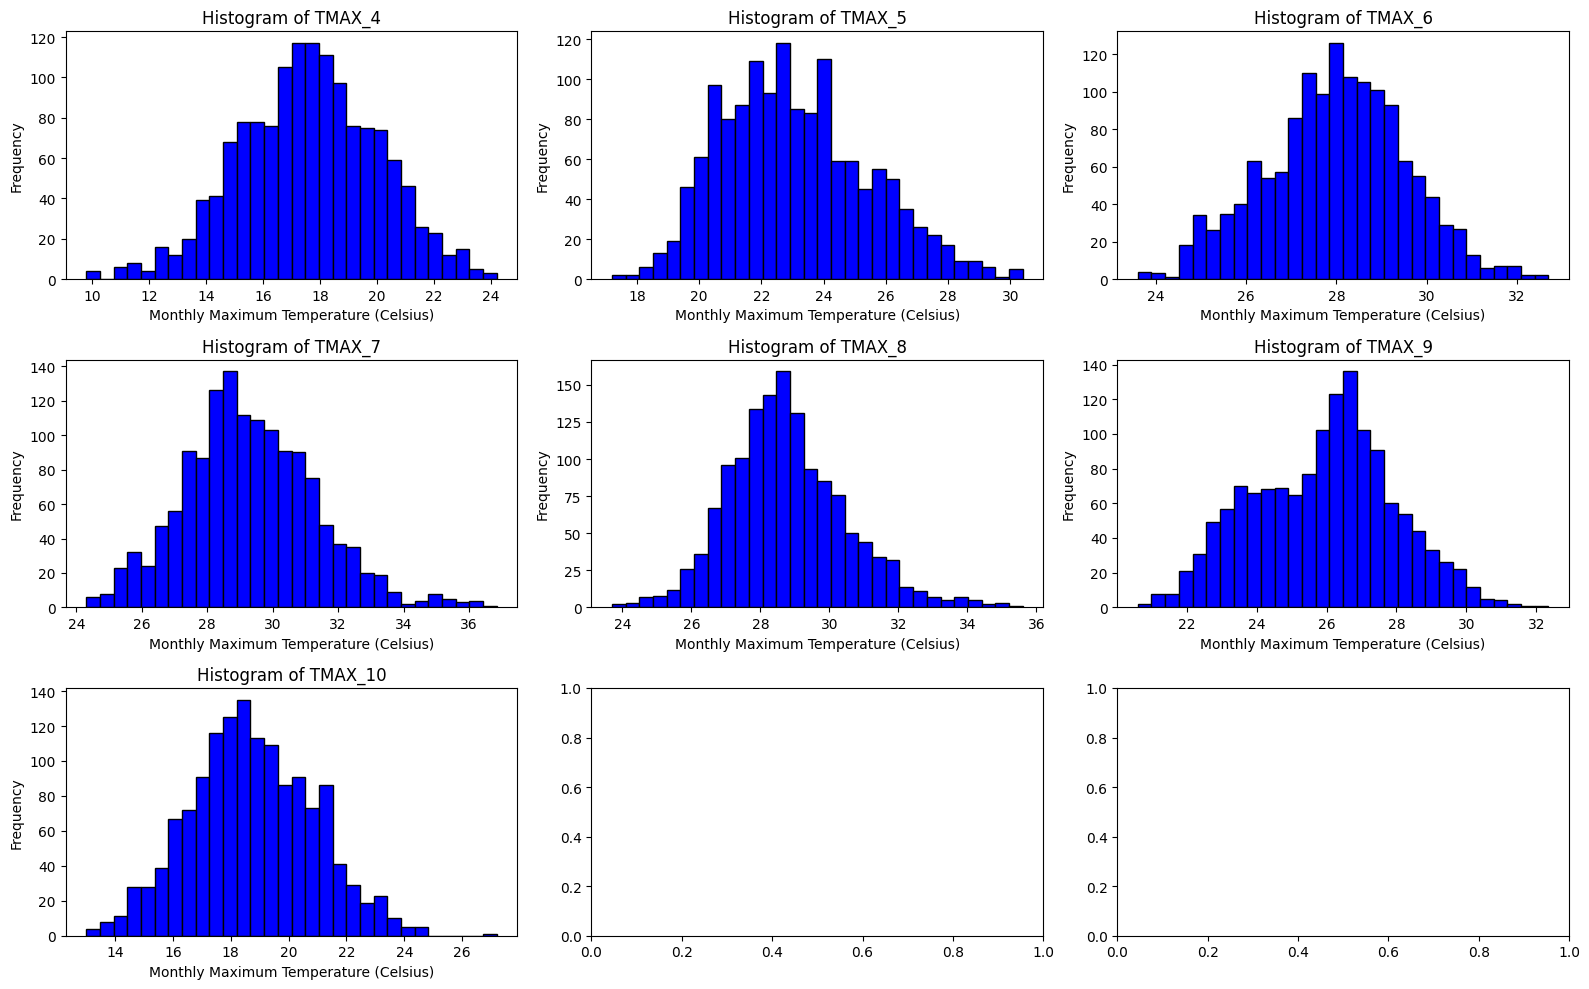

In [59]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['TMAX_4', 'TMAX_5', 'TMAX_6', 'TMAX_7', 'TMAX_8', 
                            'TMAX_9', 'TMAX_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Monthly Maximum Temperature (Celsius)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use Mean for TMAX

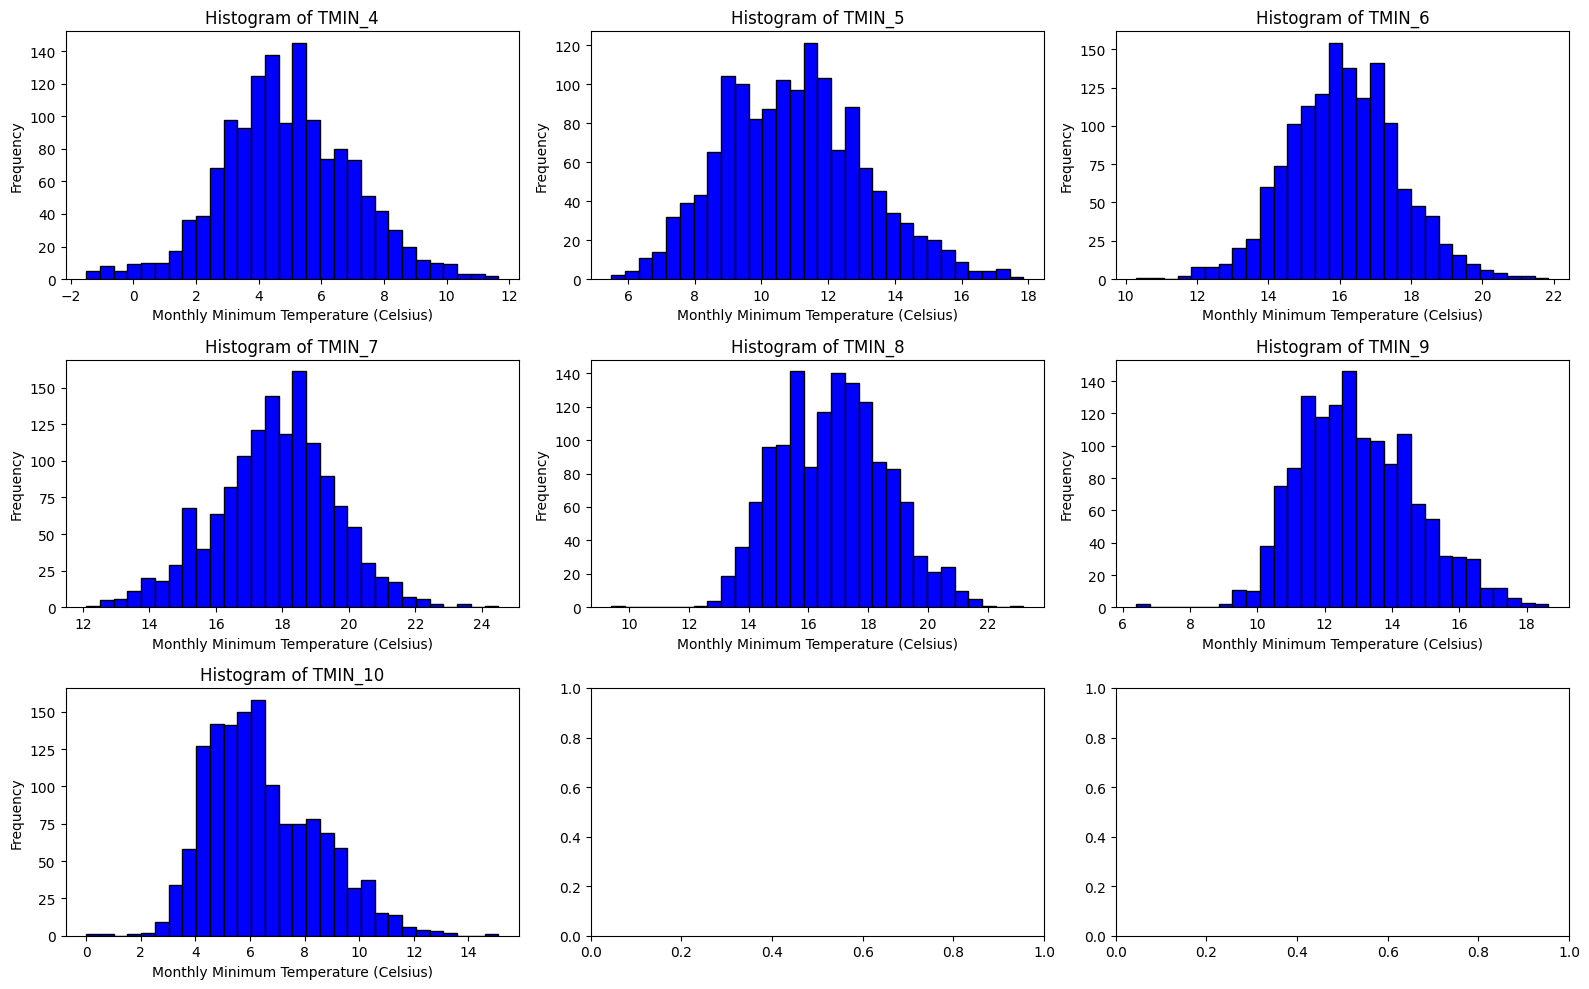

In [60]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['TMIN_4', 'TMIN_5', 'TMIN_6', 'TMIN_7', 'TMIN_8', 
                            'TMIN_9', 'TMIN_10']):
    ax = axes[i]
    ax.hist(result_df[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Monthly Minimum Temperature (Celsius)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Use Mean for TMIN

In [103]:
'''
columns_mean = ['DP01_4', 'DP01_5', 'DP01_6', 'DP01_7', 'DP01_8', 
                'DP01_9', 'DP01_10', 'DP10_4', 'DP10_5', 
                'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9', 'DP10_10',
                'EMNT_4', 'EMNT_5', 'EMNT_6', 'EMNT_7', 'EMNT_8', 
                'EMNT_9', 'EMNT_10', 'EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7', 'EMXT_8', 
                'EMXT_9', 'EMXT_10',  'TAVG_4', 'TAVG_5', 'TAVG_6', 'TAVG_7', 'TAVG_8', 
                'TAVG_9', 'TAVG_10', 'TMAX_4', 'TMAX_5', 'TMAX_6', 'TMAX_7', 'TMAX_8', 
                'TMAX_9', 'TMAX_10', 'TMIN_4', 'TMIN_5', 'TMIN_6', 'TMIN_7', 'TMIN_8', 
                'TMIN_9', 'TMIN_10'   ]
                
                
                
columns_mode = ['DSNW_4', 'DSNW_5', 'DSNW_6', 'DSNW_7', 'DSNW_8', 'DSNW_9', 'DSNW_10',
'DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 'DT00_9', 'DT00_10', 'DT32_4', 'DT32_5', 'DT32_6', 'DT32_7', 'DT32_8', 
'DT32_9', 'DT32_10', DX32_4', 'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 'DX32_9', 'DX32_10',
'DX70_4', 'DX70_5', 'DX70_6', 'DX70_7', 'DX70_8', 'DX70_9', 'DX70_10', 'DX90_4', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 
                            'DX90_9', 'DX90_10', 'EMSN_4', 'EMSN_5', 'EMSN_6', 'EMSN_7', 'EMSN_8', 
                            'EMSN_9', 'EMSN_10',  'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 
                            'EMXP_9', 'EMXP_10', 'PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7', 'PRCP_8', 
                'PRCP_9', 'PRCP_10', 'SNOW_4', 'SNOW_5', 'SNOW_6', 'SNOW_7', 'SNOW_8', 
                            'SNOW_9', 'SNOW_10']


'''

columns_mode = ['DSNW_4', 'DSNW_5', 'DSNW_6', 'DSNW_7', 'DSNW_8', 'DSNW_9', 'DSNW_10',
'DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 'DT00_9', 'DT00_10', 'DT32_4', 'DT32_5', 'DT32_6', 'DT32_7', 'DT32_8', 
'DT32_9', 'DT32_10', 'DX32_4', 'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 'DX32_9', 'DX32_10',
'DX70_4', 'DX70_5', 'DX70_6', 'DX70_7', 'DX70_8', 'DX70_9', 'DX70_10', 'DX90_4', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 
                            'DX90_9', 'DX90_10', 'EMSN_4', 'EMSN_5', 'EMSN_6', 'EMSN_7', 'EMSN_8', 
                            'EMSN_9', 'EMSN_10',  'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 
                            
                            'EMSD_4', 'EMSD_5', 'EMSD_6', 'EMSD_7', 'EMSD_8', 
                            'EMSD_9', 'EMSD_10',
                            
                            'EMXP_9', 'EMXP_10', 'PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7', 'PRCP_8', 
                'PRCP_9', 'PRCP_10', 'SNOW_4', 'SNOW_5', 'SNOW_6', 'SNOW_7', 'SNOW_8', 
                            'SNOW_9', 'SNOW_10']


columns_mean = ['DP01_4', 'DP01_5', 'DP01_6', 'DP01_7', 'DP01_8', 
                'DP01_9', 'DP01_10', 'DP10_4', 'DP10_5', 
                'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9', 'DP10_10',
                'EMNT_4', 'EMNT_5', 'EMNT_6', 'EMNT_7', 'EMNT_8', 
                'EMNT_9', 'EMNT_10', 'EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7', 'EMXT_8', 
                'EMXT_9', 'EMXT_10',  'TAVG_4', 'TAVG_5', 'TAVG_6', 'TAVG_7', 'TAVG_8', 
                'TAVG_9', 'TAVG_10', 'TMAX_4', 'TMAX_5', 'TMAX_6', 'TMAX_7', 'TMAX_8', 
                'TMAX_9', 'TMAX_10', 'TMIN_4', 'TMIN_5', 'TMIN_6', 'TMIN_7', 'TMIN_8', 
                'TMIN_9', 'TMIN_10'   ]

## Imputation of missing values

In [104]:
result_df_copy = result_df.copy()

In [105]:
for col in columns_mean:
    mean_value = result_df_copy[column].mean()
    result_df_copy[col] = result_df_copy[column].fillna(mean_value)

In [106]:
for col in columns_mode:
    mode_value = result_df_copy[column].mode().iloc[0]
    result_df_copy[col] = result_df_copy[column].fillna(mode_value)
    

In [107]:
calculate_null_percentage(result_df_copy)

Total Null Values  Percentage Null
Year                     0              0.0
County                   0              0.0
DP01_4                   0              0.0
DP01_5                   0              0.0
DP01_6                   0              0.0
...                    ...              ...
TMIN_6                   0              0.0
TMIN_7                   0              0.0
TMIN_8                   0              0.0
TMIN_9                   0              0.0
TMIN_10                  0              0.0

[128 rows x 2 columns]

## Normalization

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [109]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the specified columns with Z-score normalization
result_df_copy[columns_mean] = scaler.fit_transform(result_df_copy[columns_mean])

In [110]:
# Create a RobustScaler object
scaler = RobustScaler()

# Fit and transform the specified columns with robust scaling normalization
result_df_copy[columns_mode] = scaler.fit_transform(result_df_copy[columns_mode])

## Distribution after normalization and imputation

In [111]:
result_df_v2 = result_df_copy.copy()

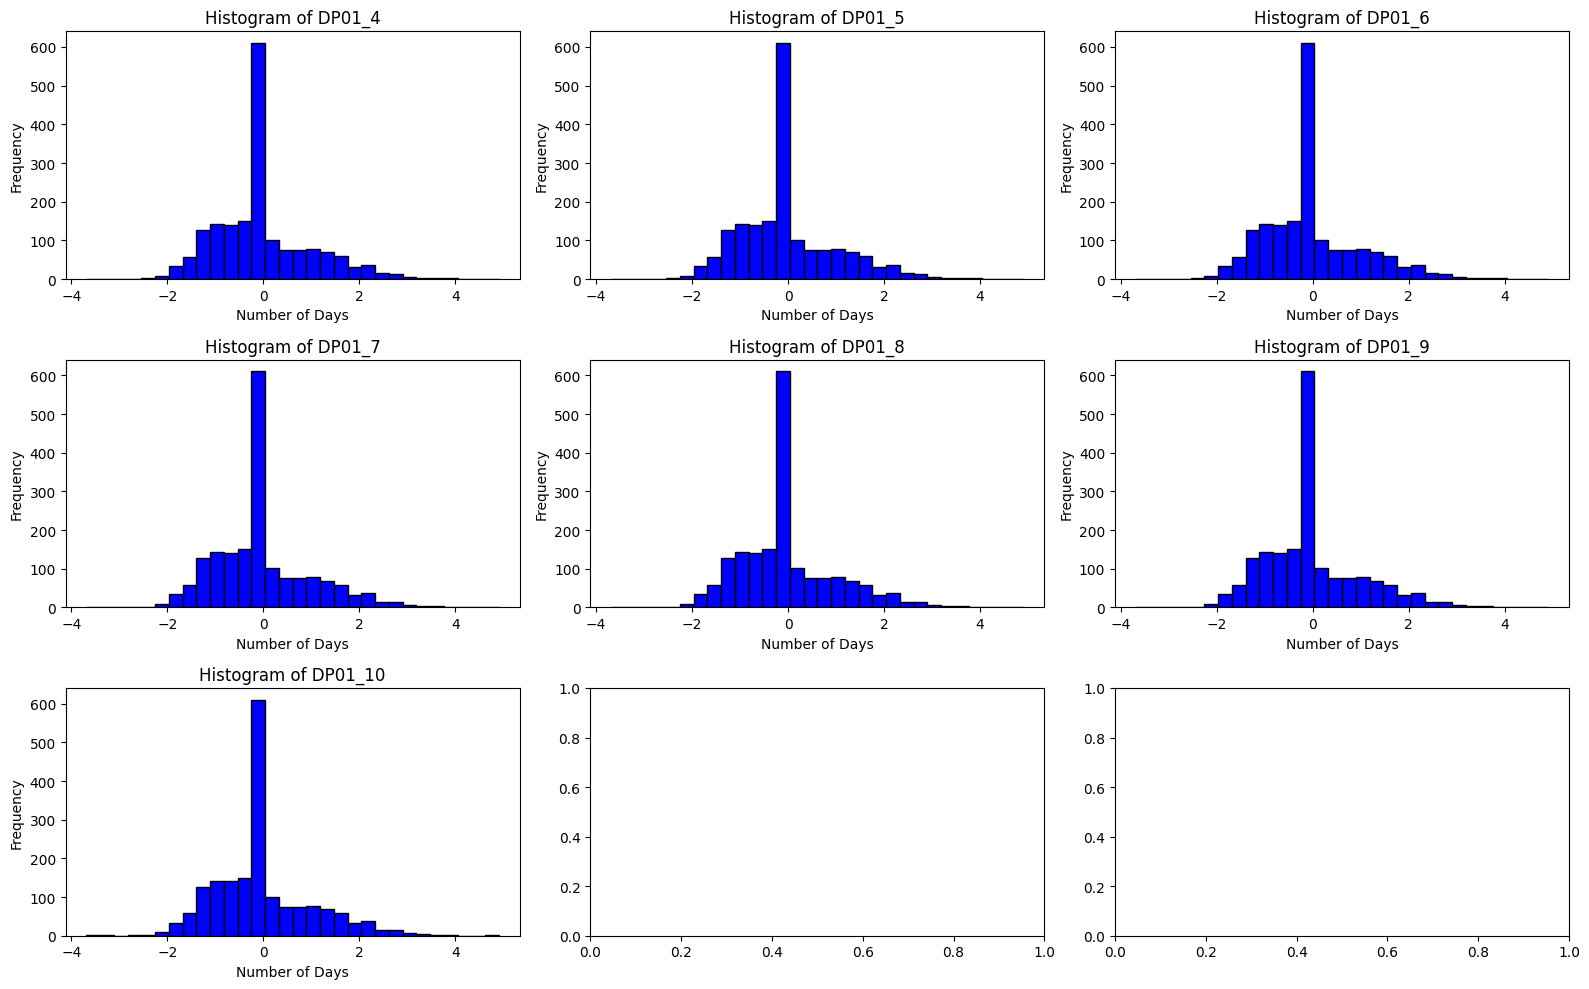

In [112]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DP01_4', 'DP01_5', 'DP01_6', 'DP01_7', 'DP01_8', 
                            'DP01_9', 'DP01_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of Days')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


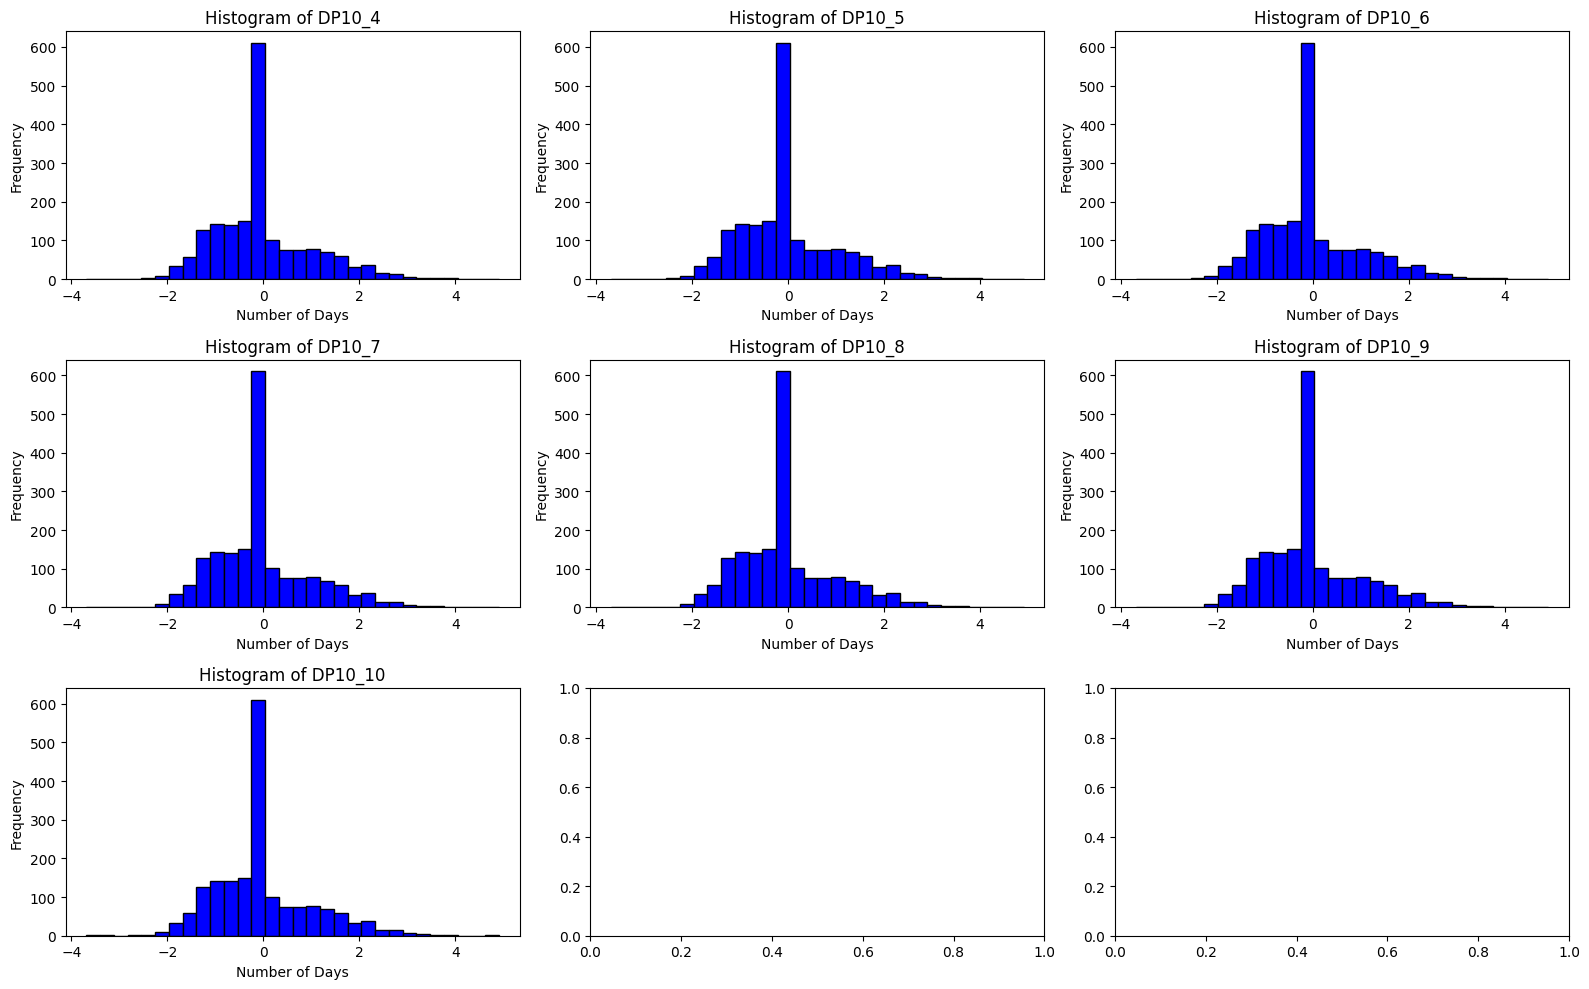

In [113]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DP10_4', 'DP10_5', 'DP10_6', 'DP10_7', 'DP10_8', 
                            'DP10_9', 'DP10_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of Days')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

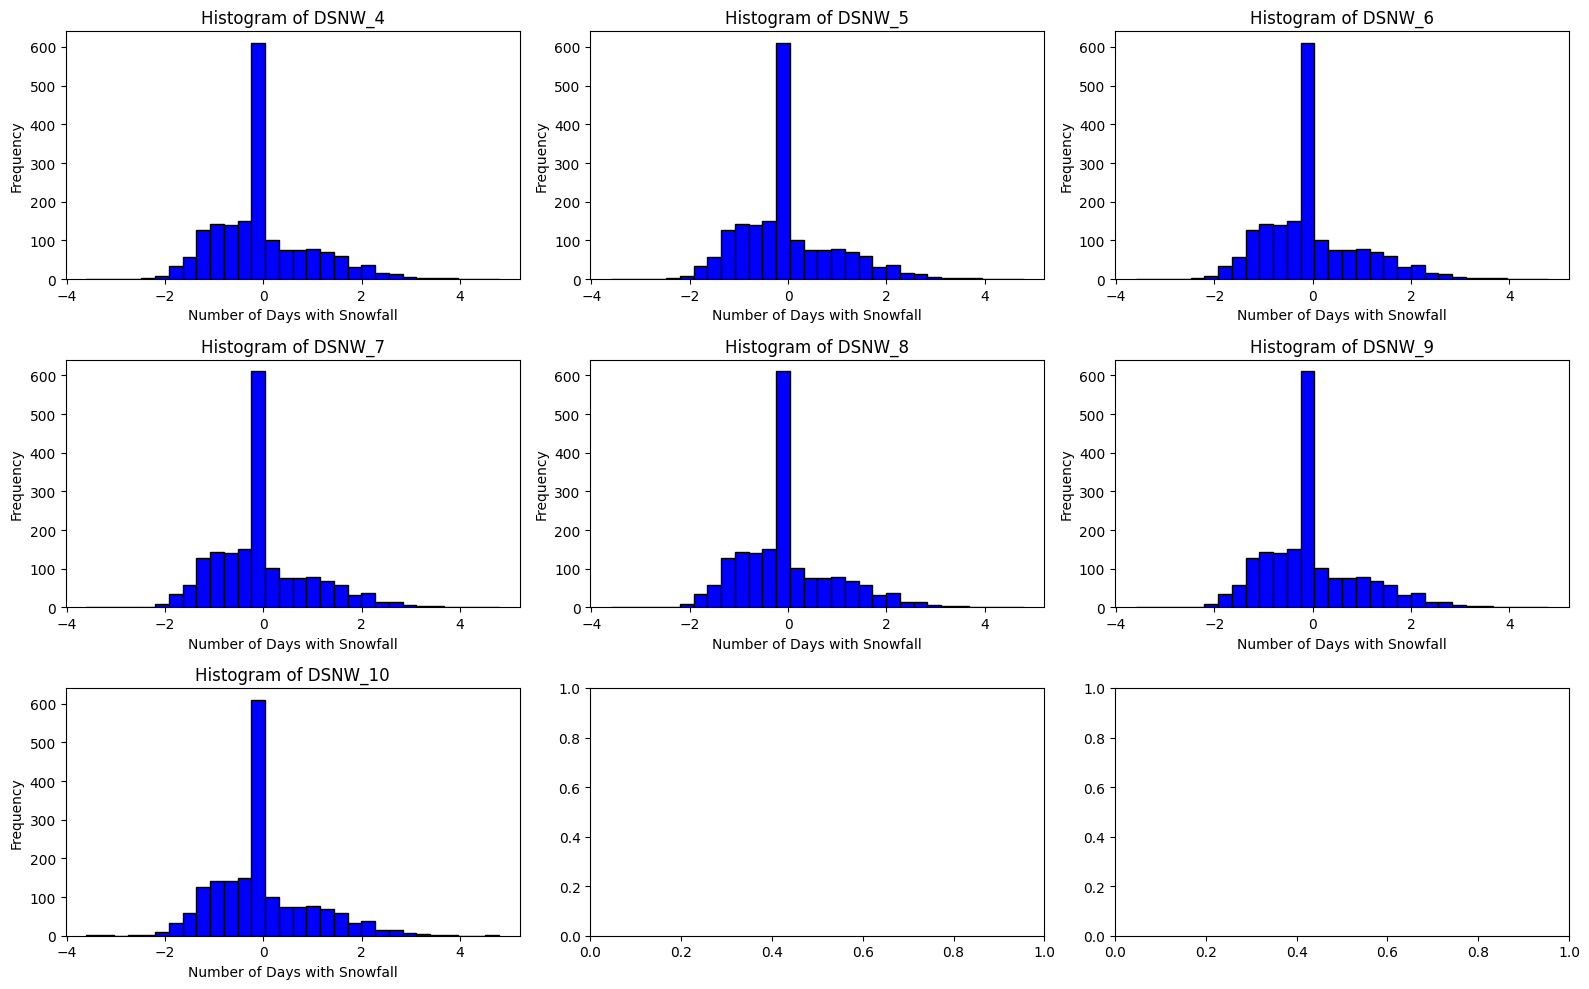

In [114]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DSNW_4', 'DSNW_5', 'DSNW_6', 'DSNW_7', 'DSNW_8', 
                            'DSNW_9', 'DSNW_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of Days with Snowfall')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


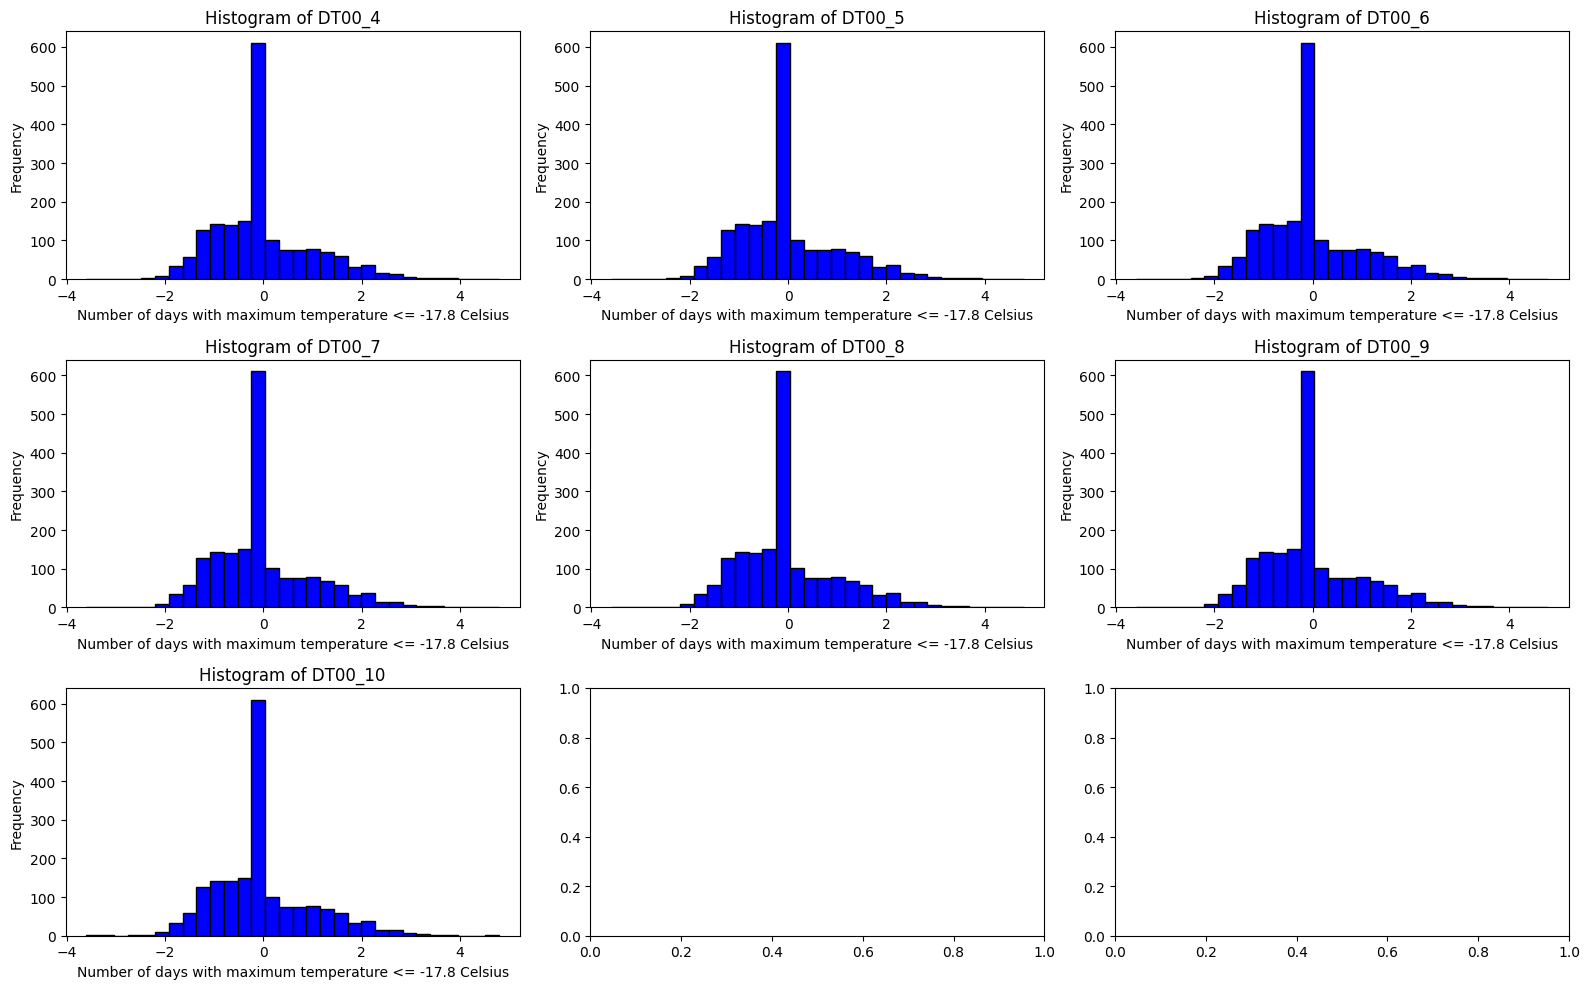

In [115]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 
                            'DT00_9', 'DT00_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of days with maximum temperature <= -17.8 Celsius')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

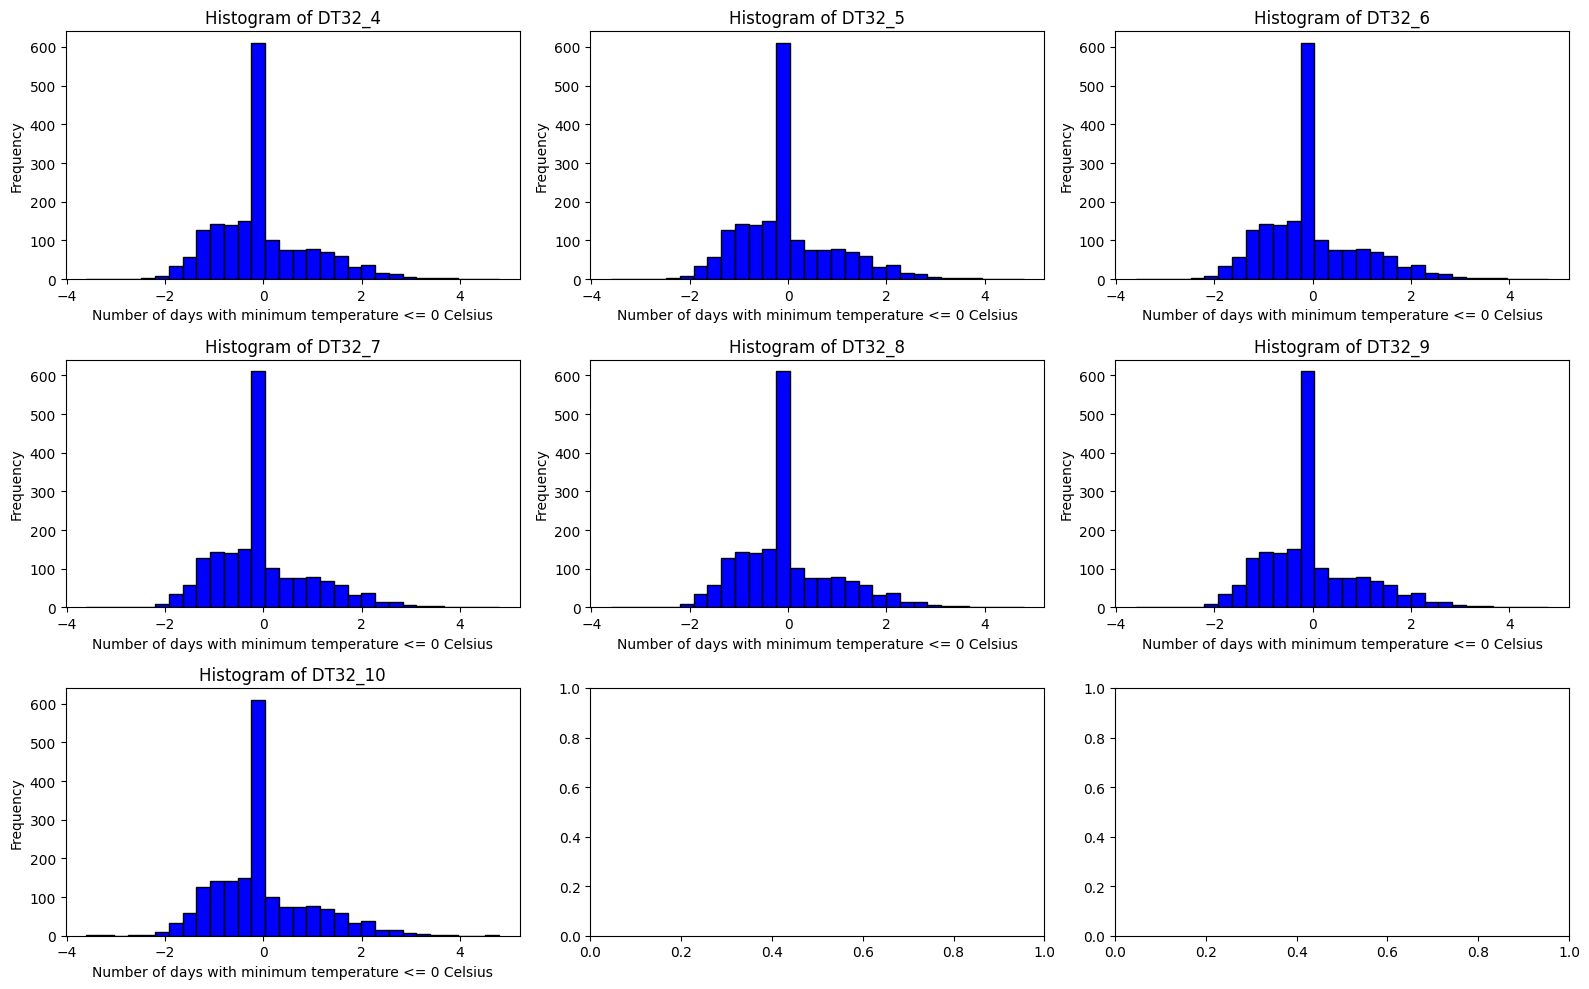

In [116]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DT32_4', 'DT32_5', 'DT32_6', 'DT32_7', 'DT32_8', 
                            'DT32_9', 'DT32_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of days with minimum temperature <= 0 Celsius')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

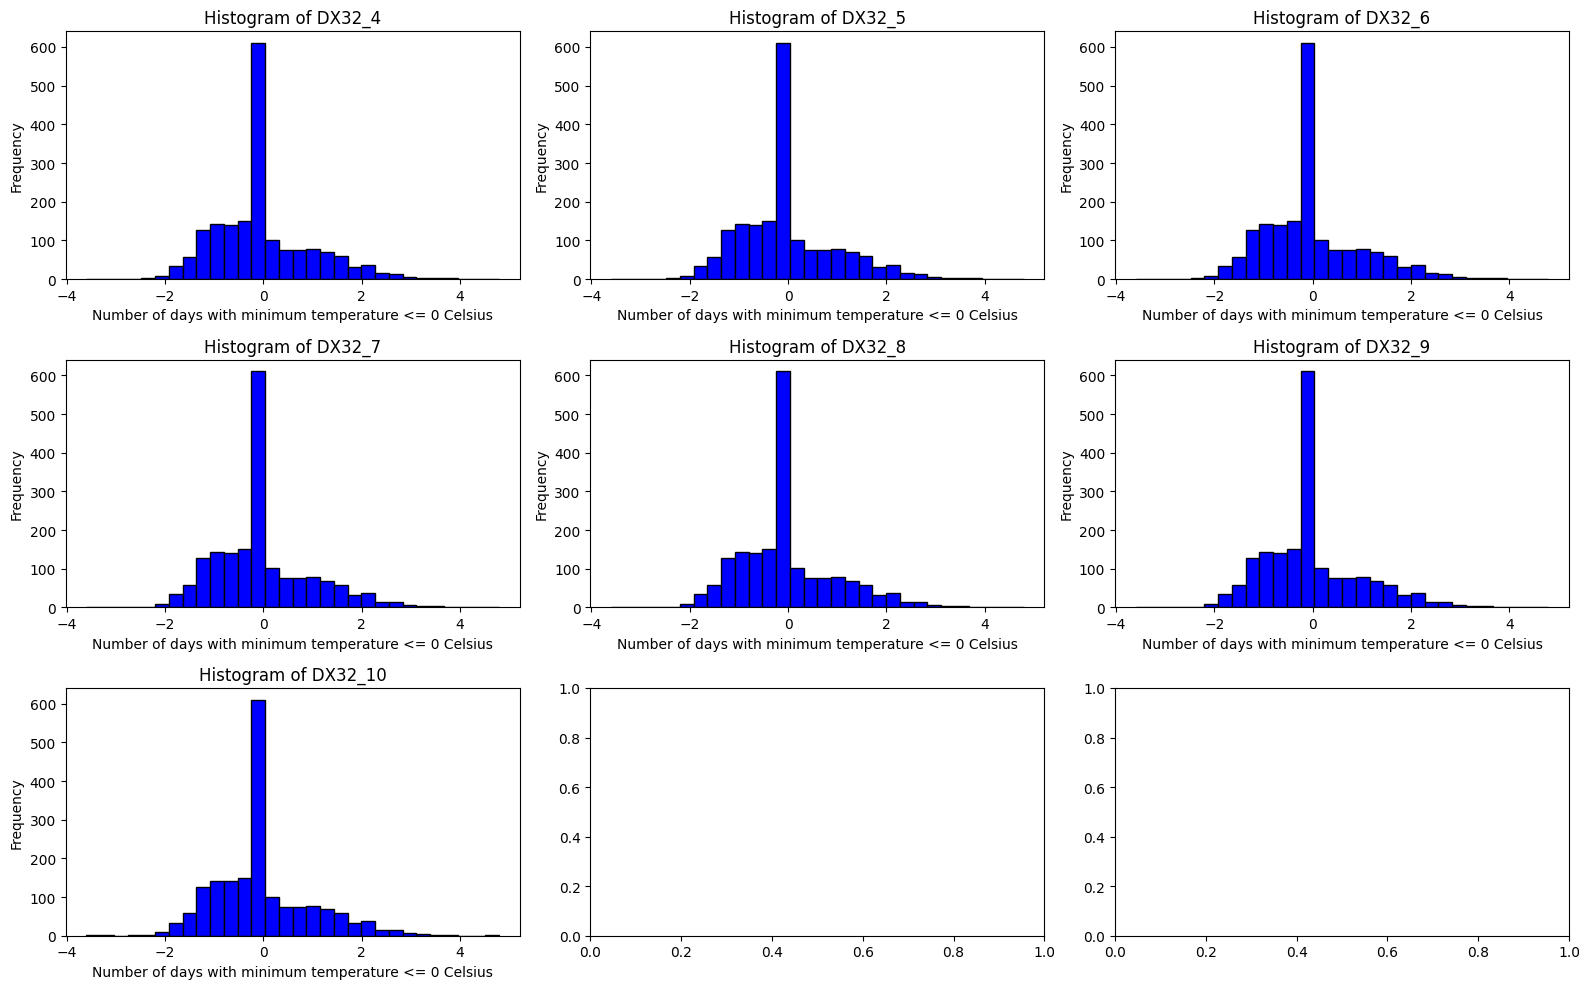

In [117]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DX32_4', 'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 
                            'DX32_9', 'DX32_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of days with minimum temperature <= 0 Celsius')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

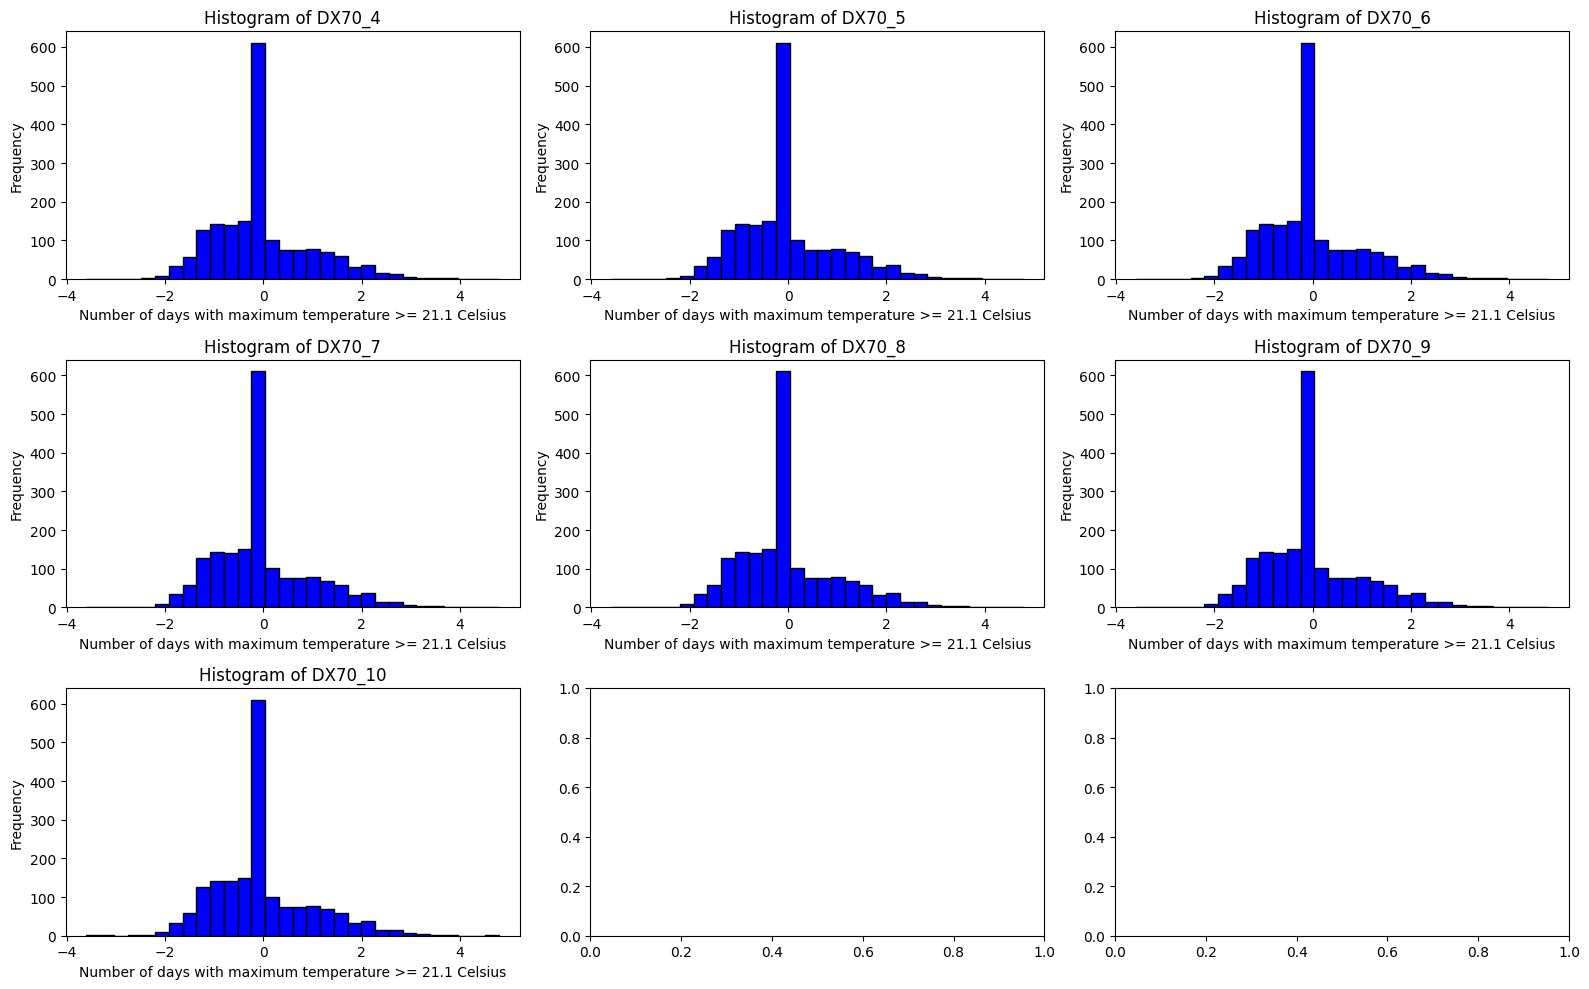

In [118]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DX70_4', 'DX70_5', 'DX70_6', 'DX70_7', 'DX70_8', 
                            'DX70_9', 'DX70_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of days with maximum temperature >= 21.1 Celsius')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

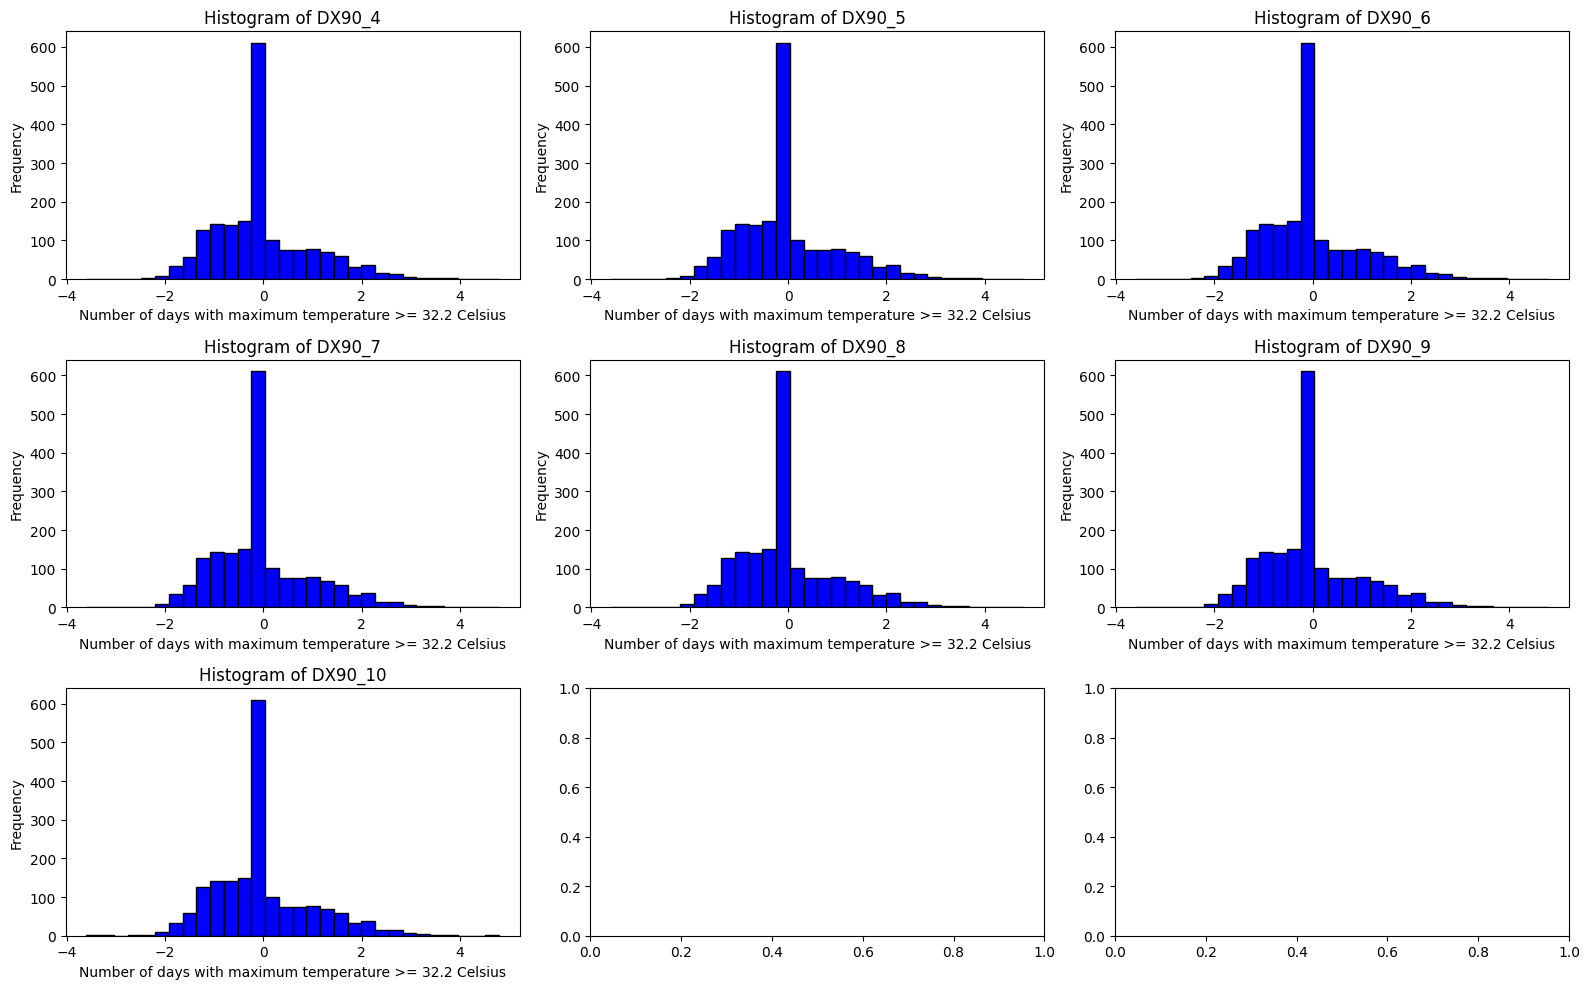

In [119]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['DX90_4', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 
                            'DX90_9', 'DX90_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Number of days with maximum temperature >= 32.2 Celsius')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

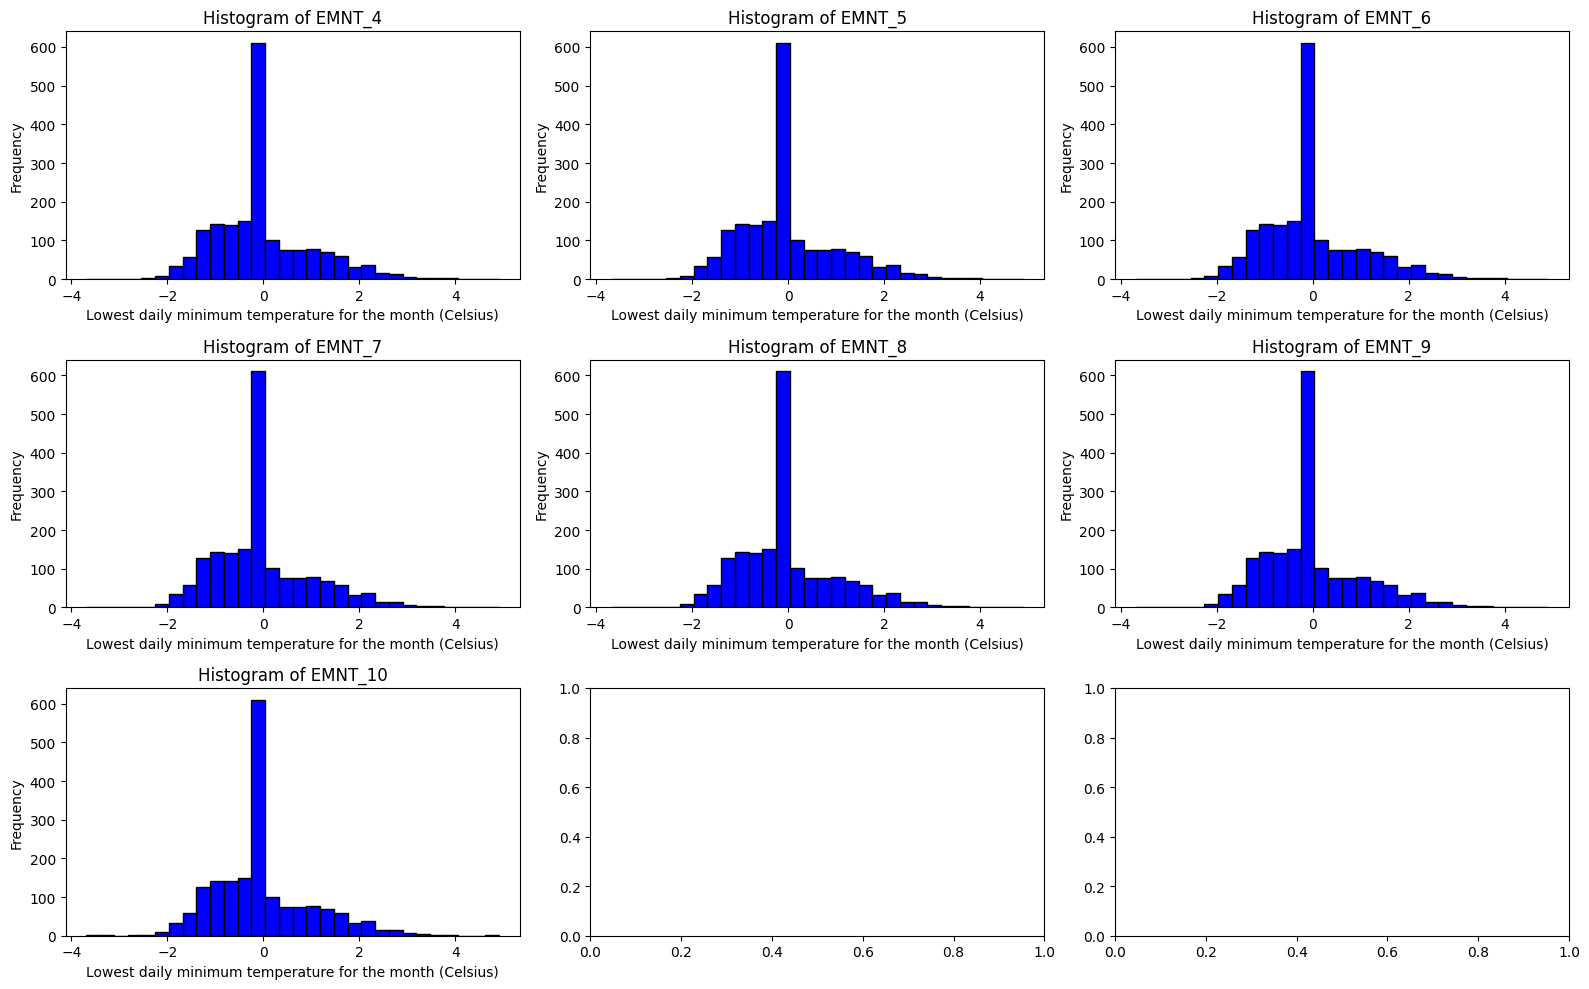

In [120]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['EMNT_4', 'EMNT_5', 'EMNT_6', 'EMNT_7', 'EMNT_8', 
                            'EMNT_9', 'EMNT_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Lowest daily minimum temperature for the month (Celsius)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

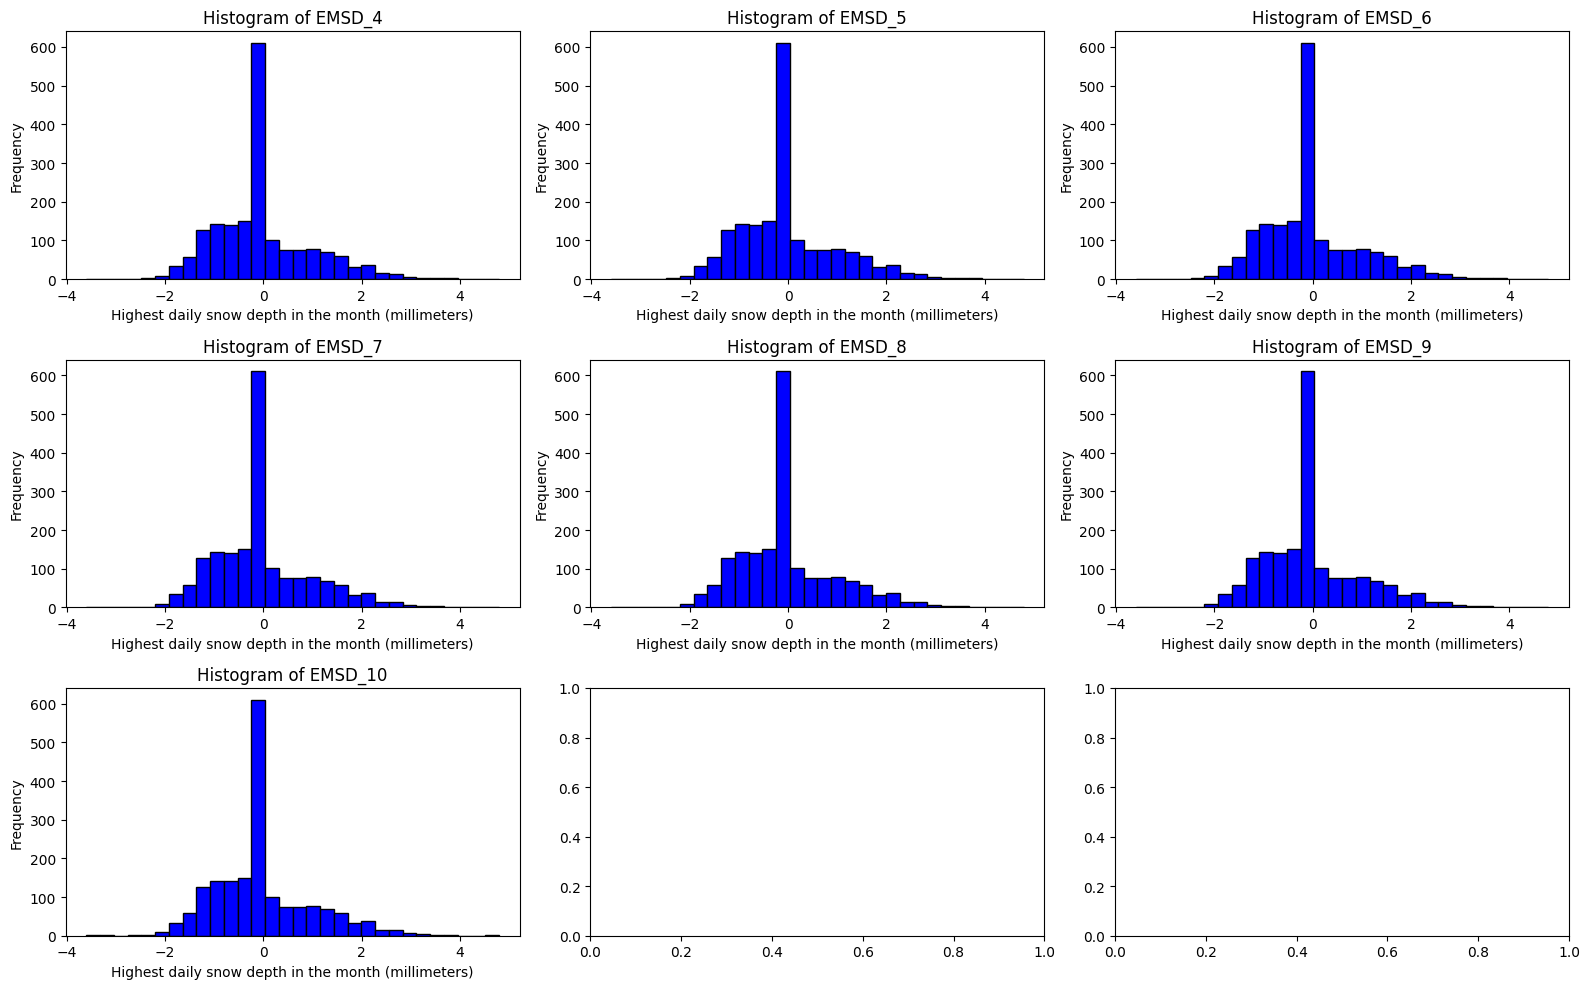

In [121]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['EMSD_4', 'EMSD_5', 'EMSD_6', 'EMSD_7', 'EMSD_8', 
                            'EMSD_9', 'EMSD_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Highest daily snow depth in the month (millimeters)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

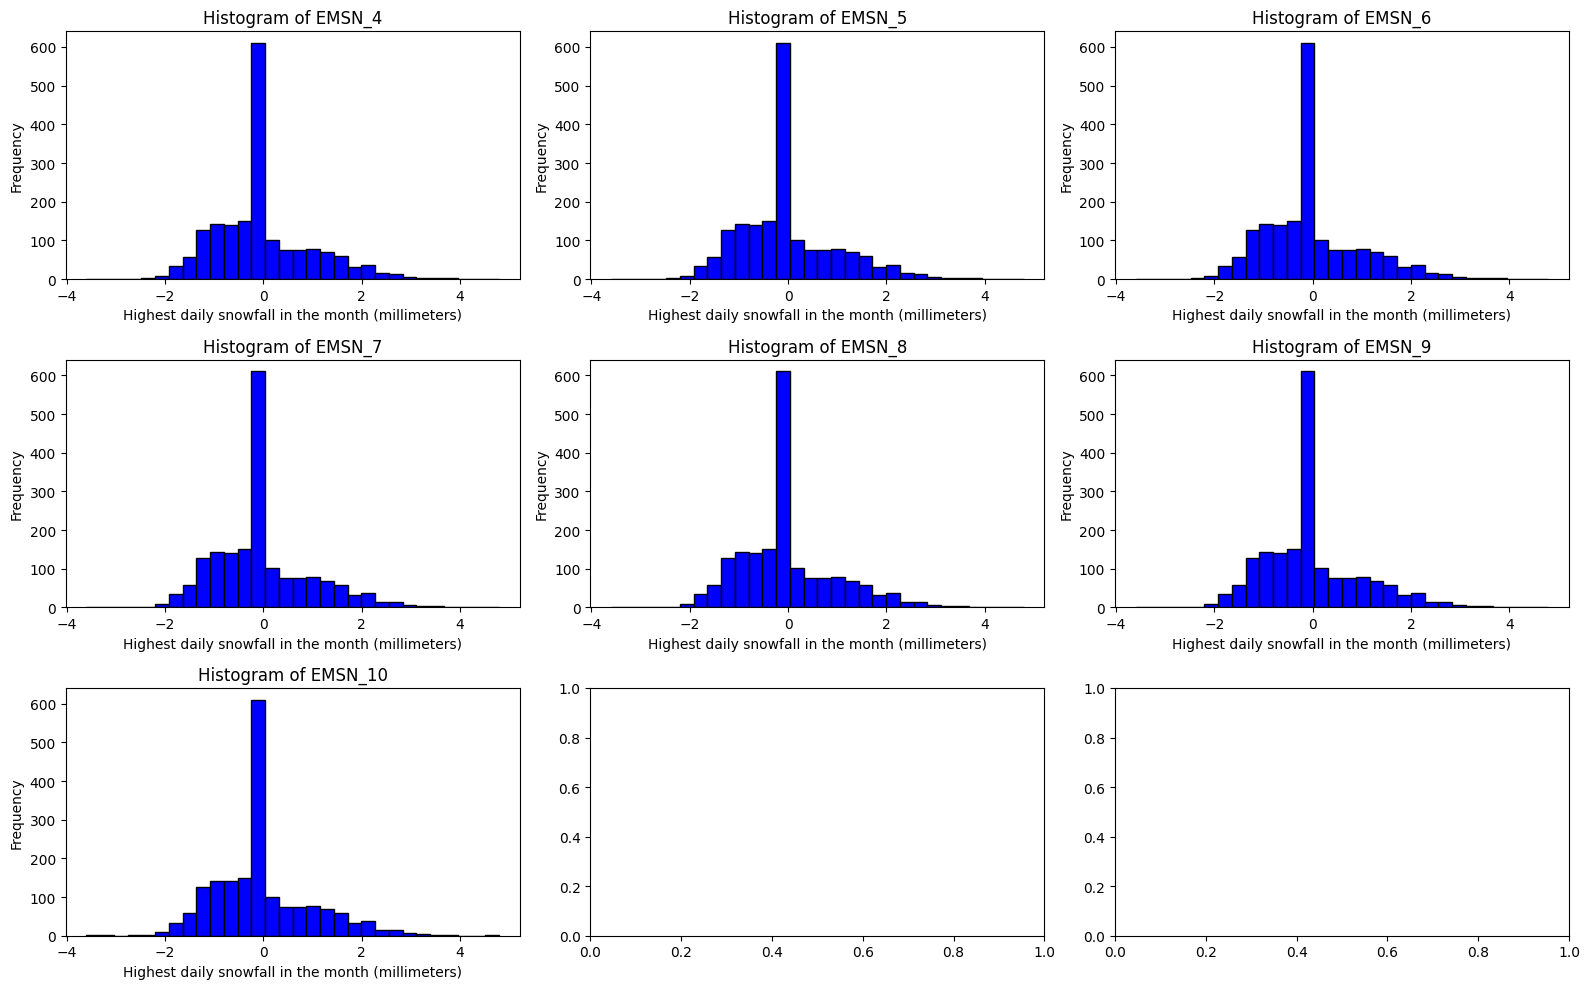

In [122]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['EMSN_4', 'EMSN_5', 'EMSN_6', 'EMSN_7', 'EMSN_8', 
                            'EMSN_9', 'EMSN_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Highest daily snowfall in the month (millimeters)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

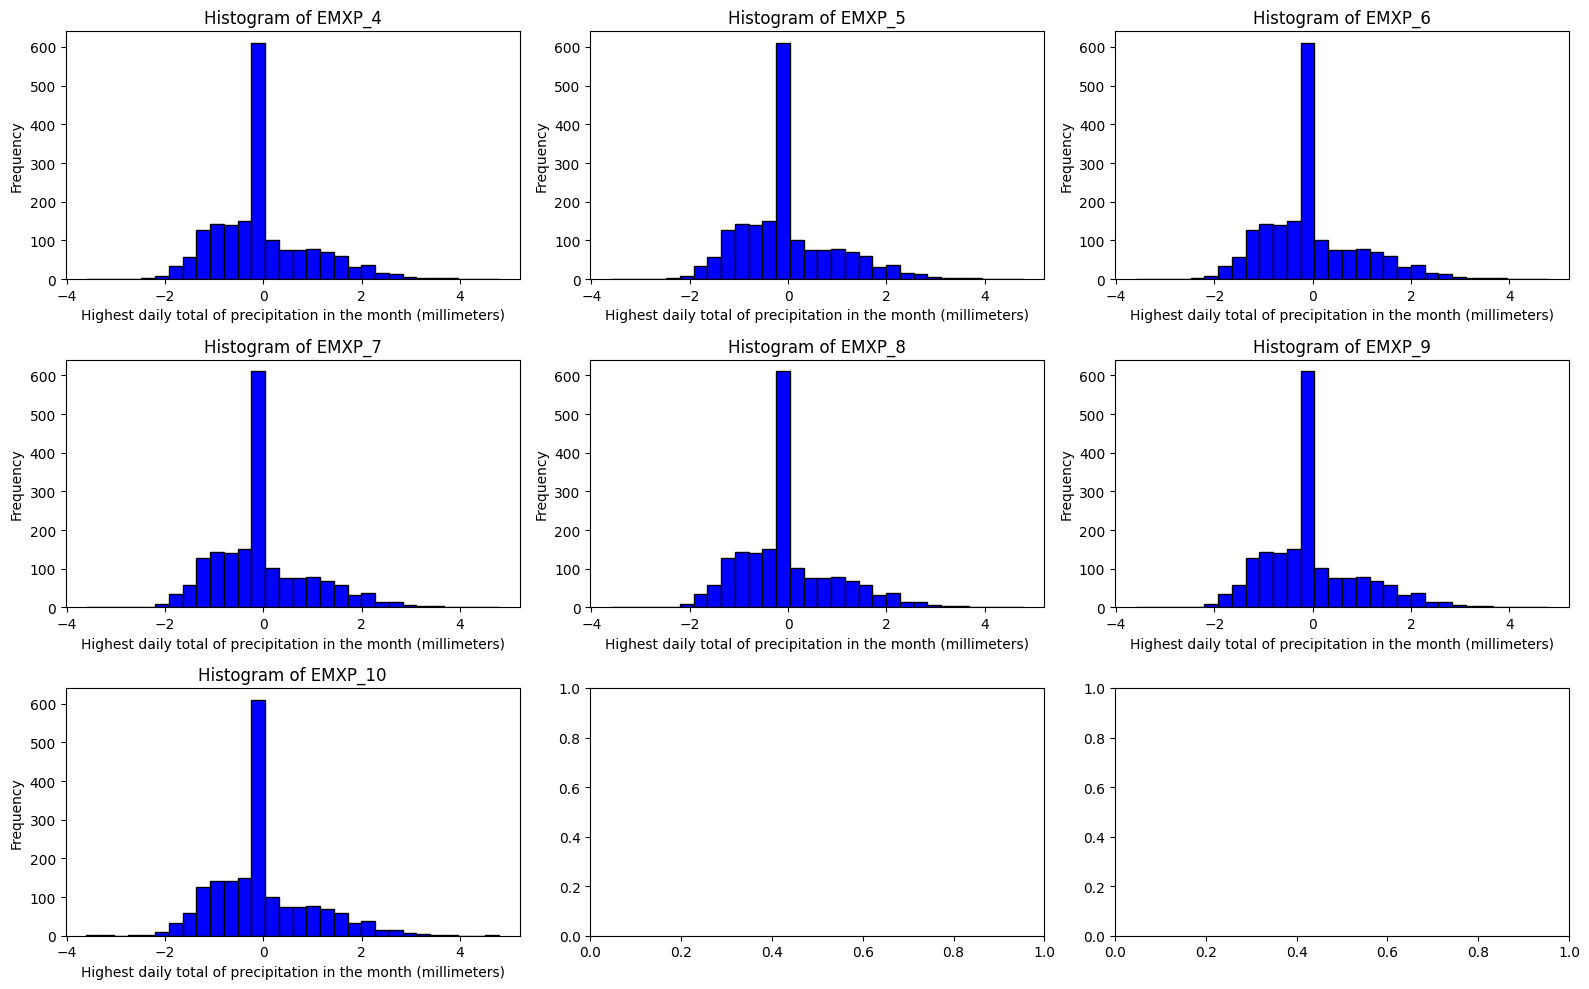

In [123]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 
                            'EMXP_9', 'EMXP_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Highest daily total of precipitation in the month (millimeters)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

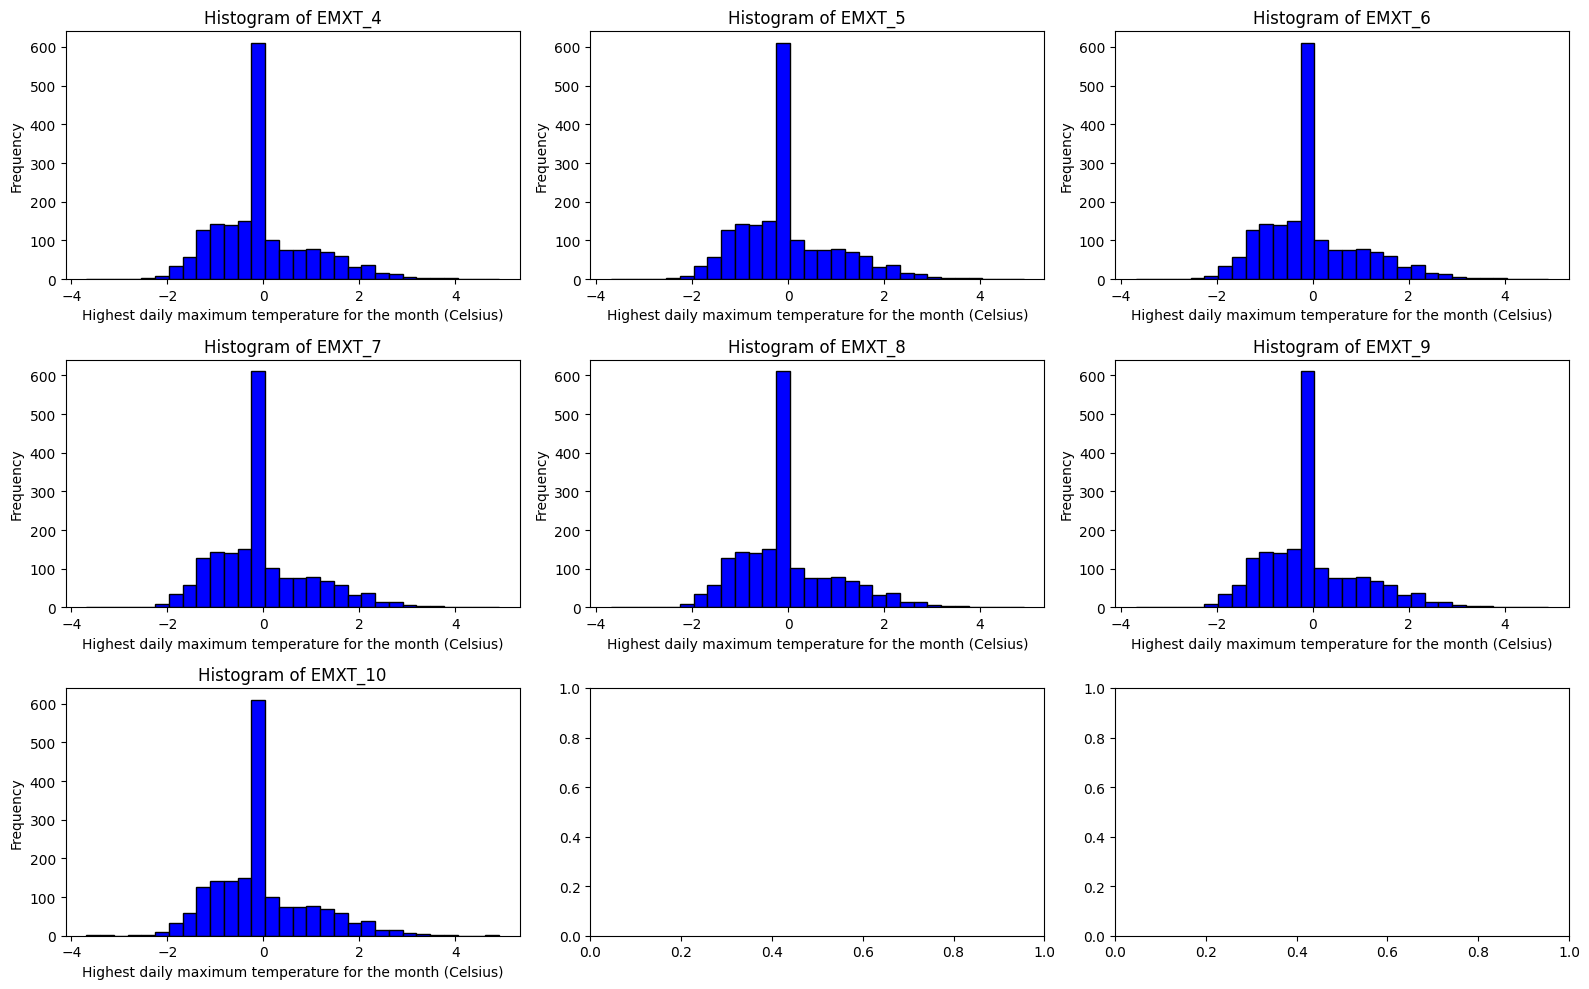

In [124]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7', 'EMXT_8', 
                            'EMXT_9', 'EMXT_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Highest daily maximum temperature for the month (Celsius)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

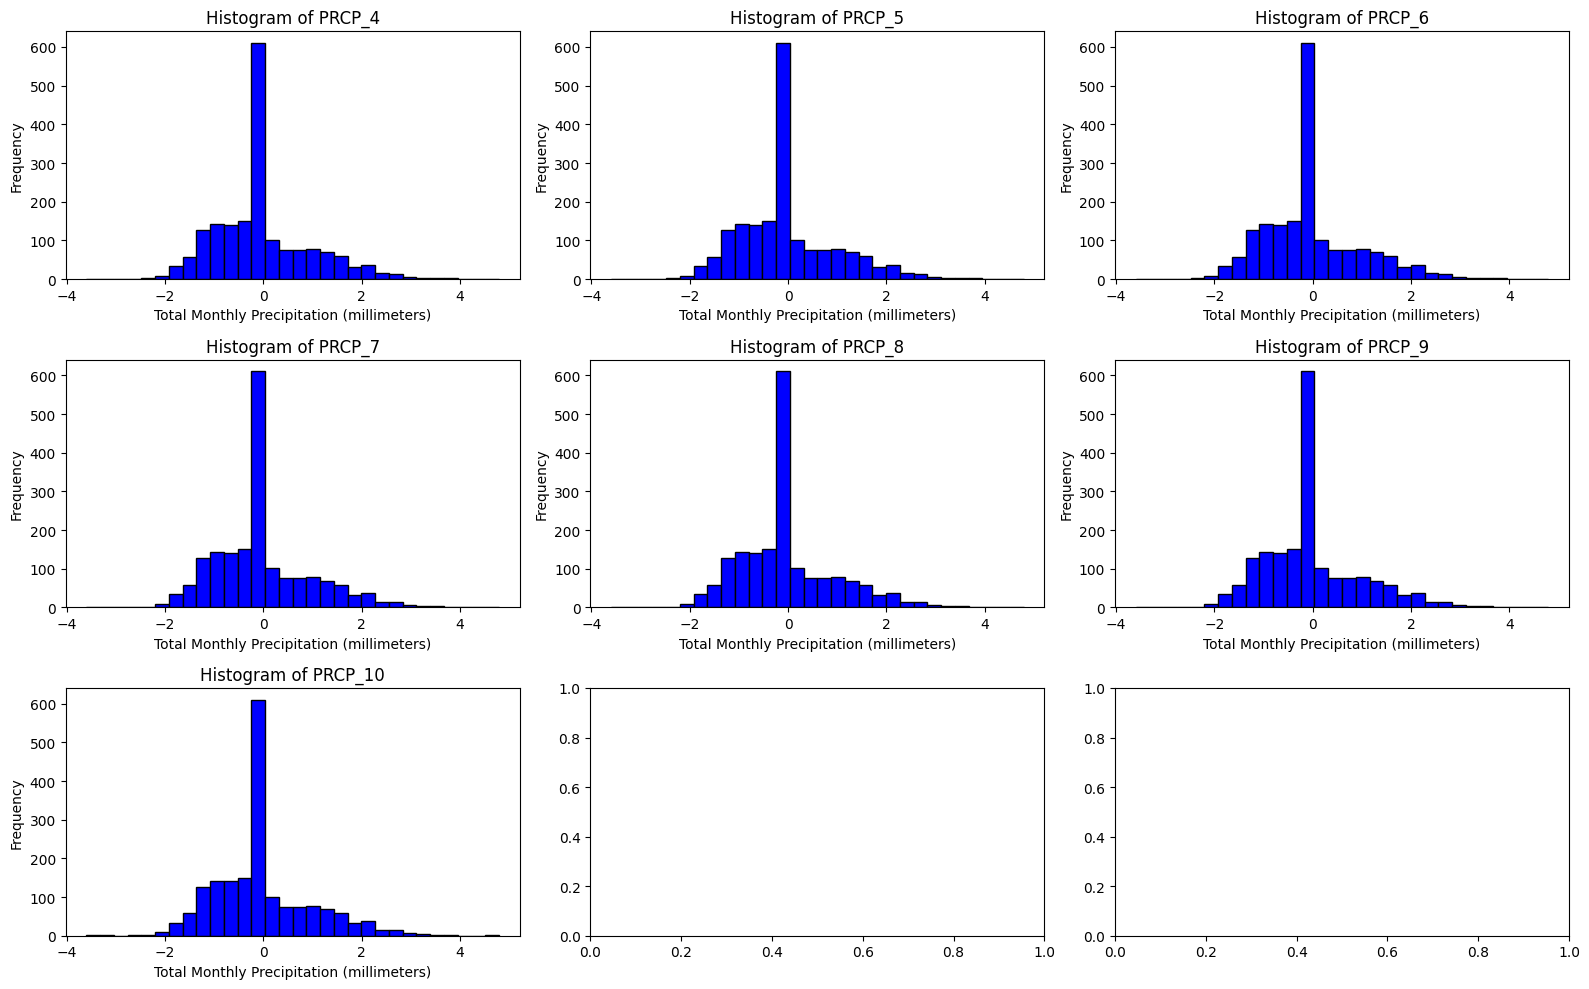

In [125]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7', 'PRCP_8', 
                            'PRCP_9', 'PRCP_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Total Monthly Precipitation (millimeters)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

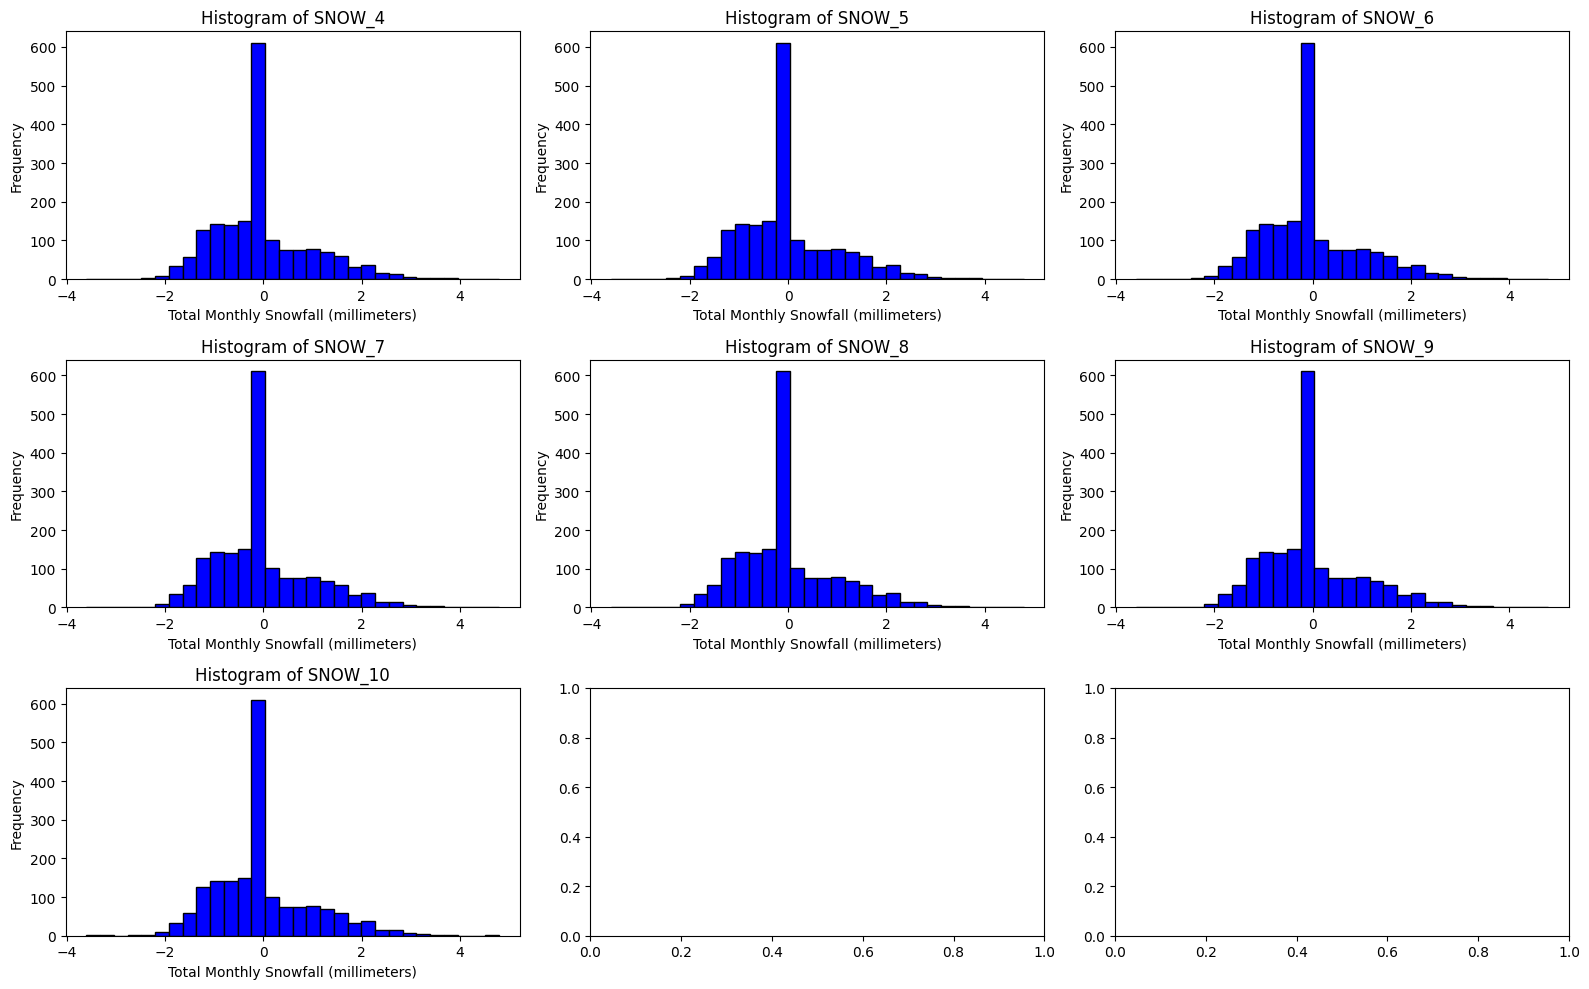

In [126]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['SNOW_4', 'SNOW_5', 'SNOW_6', 'SNOW_7', 'SNOW_8', 
                            'SNOW_9', 'SNOW_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Total Monthly Snowfall (millimeters)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

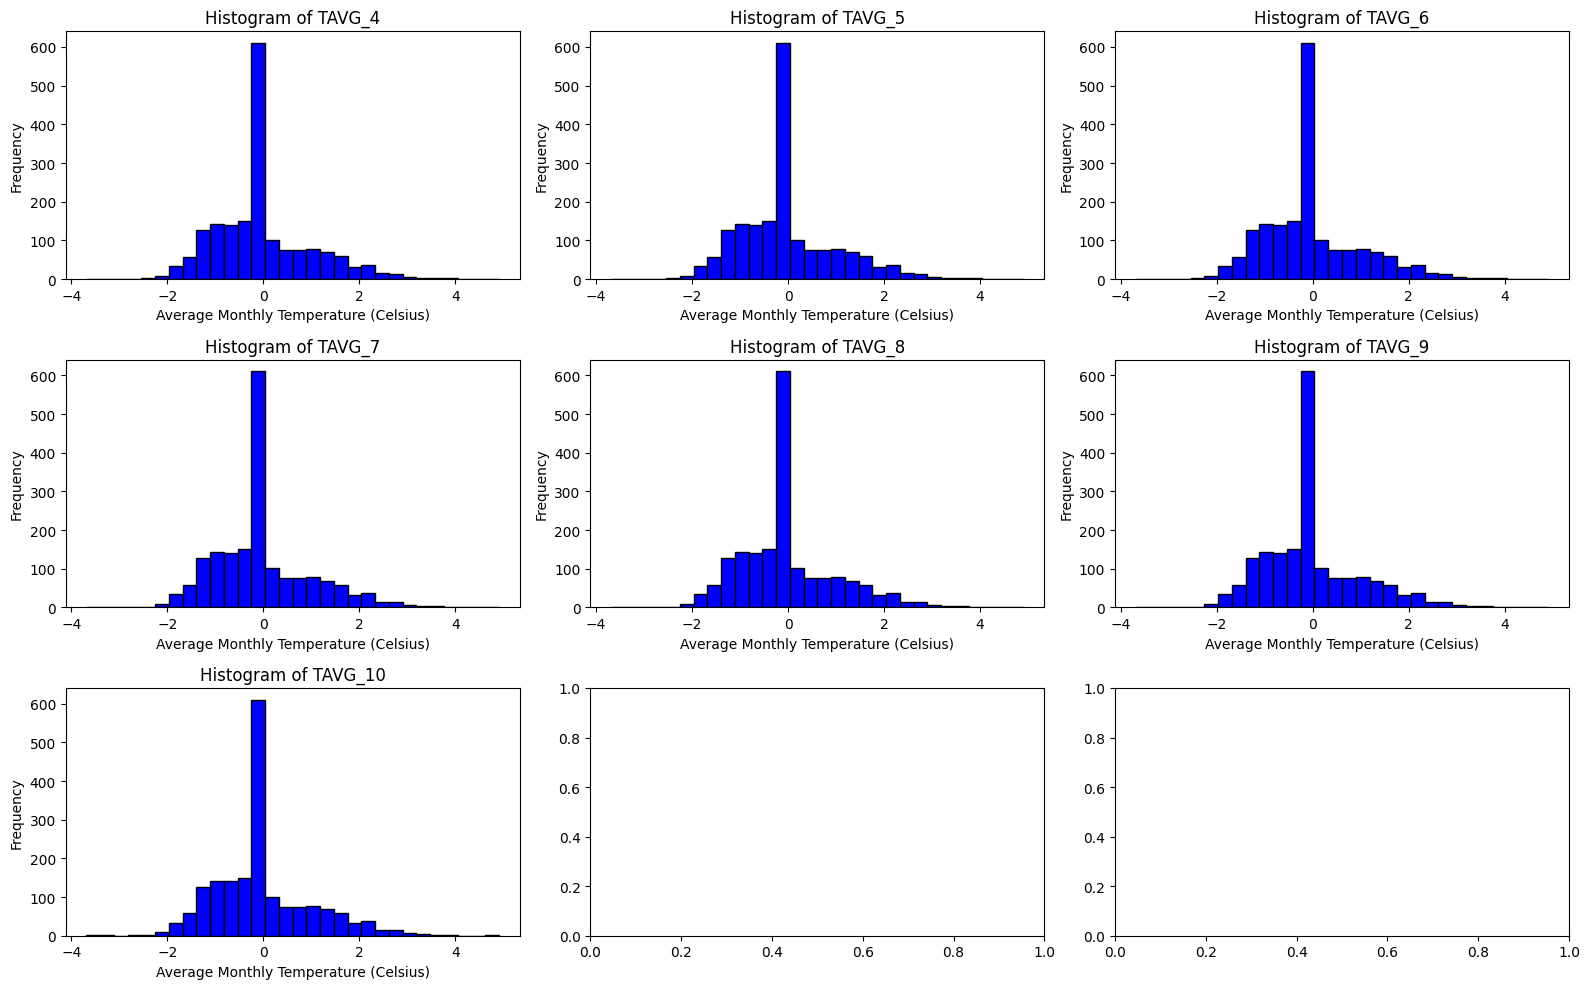

In [127]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['TAVG_4', 'TAVG_5', 'TAVG_6', 'TAVG_7', 'TAVG_8', 
                            'TAVG_9', 'TAVG_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Average Monthly Temperature (Celsius)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

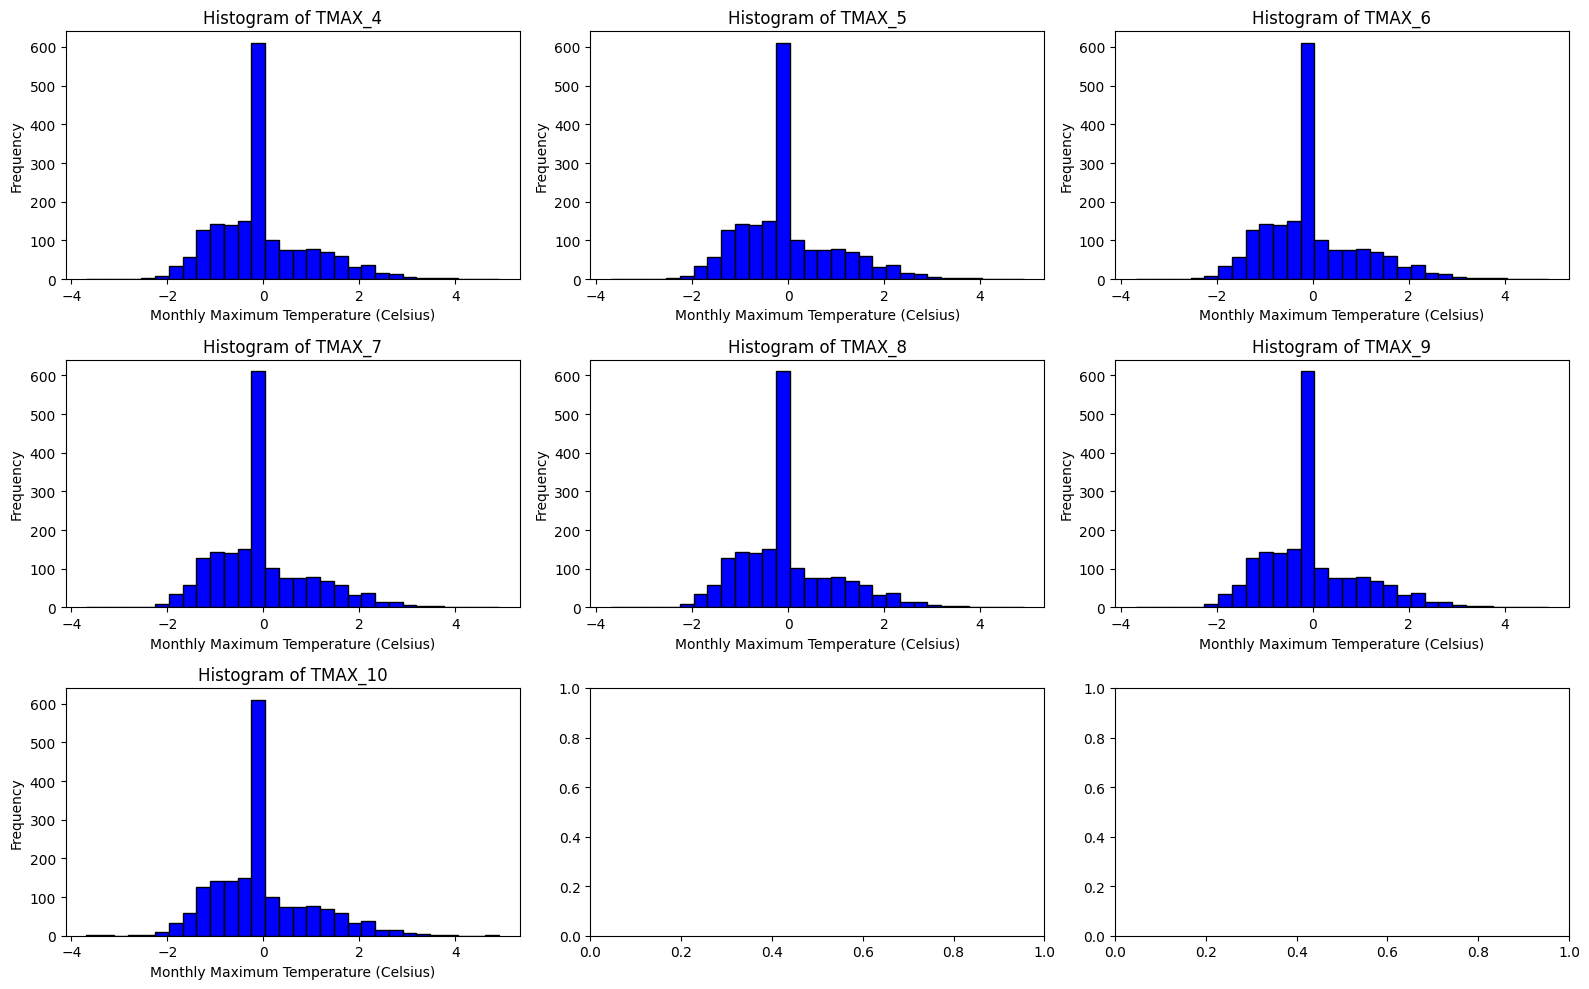

In [128]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['TMAX_4', 'TMAX_5', 'TMAX_6', 'TMAX_7', 'TMAX_8', 
                            'TMAX_9', 'TMAX_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Monthly Maximum Temperature (Celsius)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

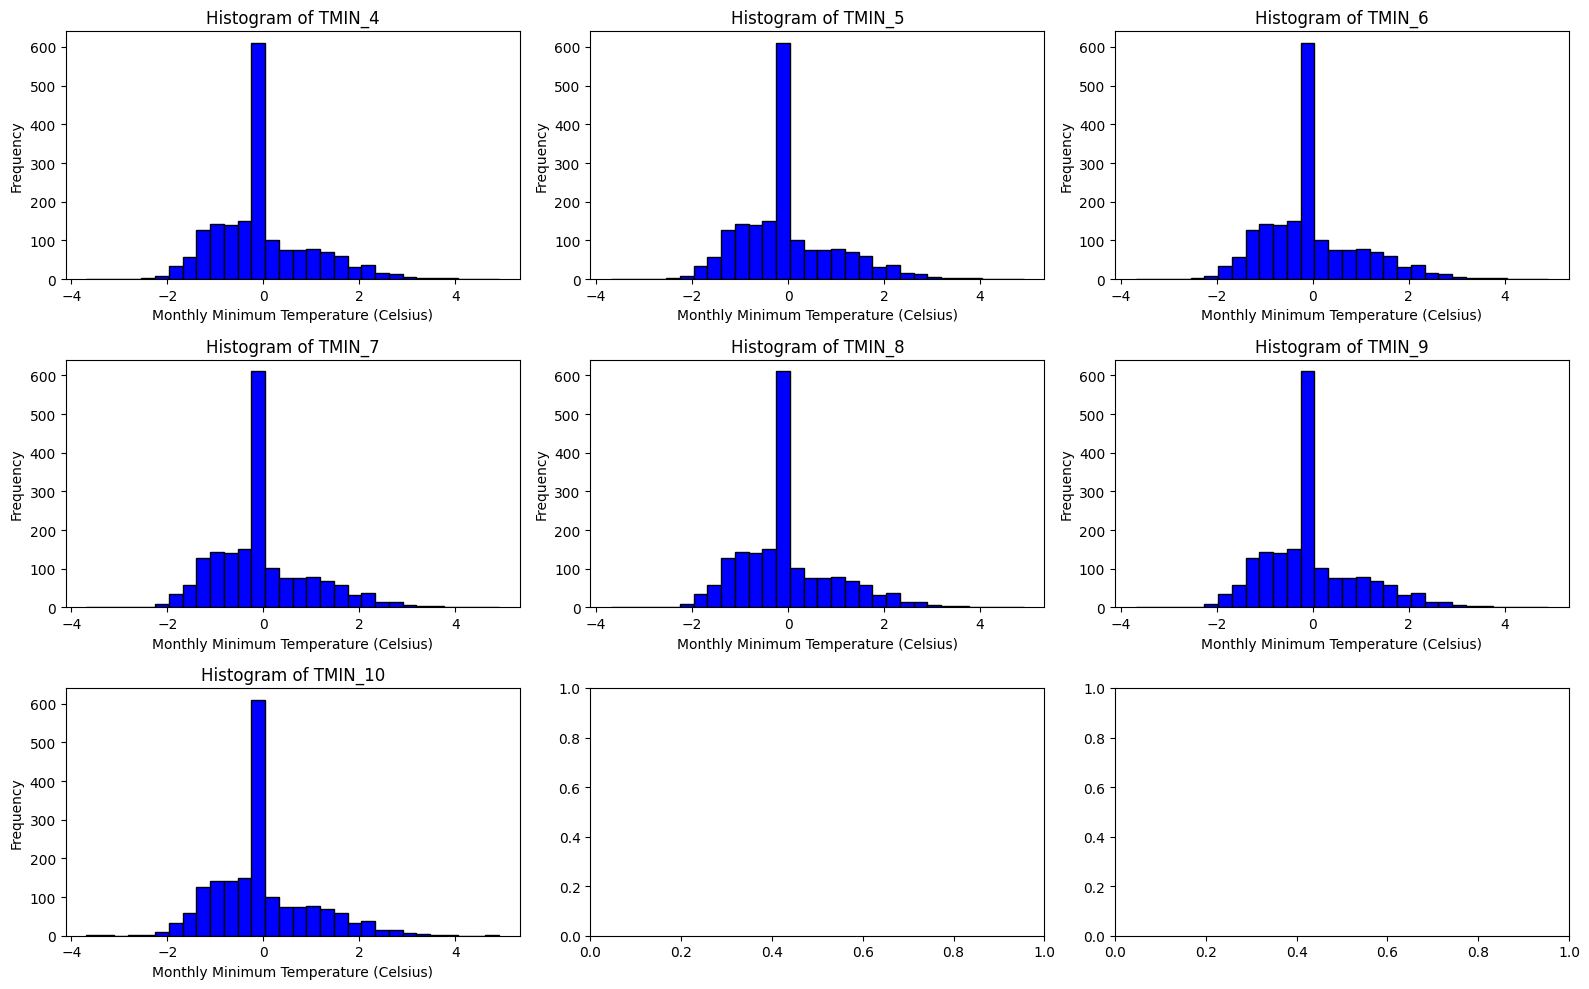

In [129]:
# Create a figure and an array of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(['TMIN_4', 'TMIN_5', 'TMIN_6', 'TMIN_7', 'TMIN_8', 
                            'TMIN_9', 'TMIN_10']):
    ax = axes[i]
    ax.hist(result_df_v2[column], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Monthly Minimum Temperature (Celsius)')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()